In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Josue_1 = "Now after the death of Moses the servant of the LORD it came to pass, that the LORD spoke to Joshua the son of Nun, Moses'minister, saying,Moses my servant is dead; now therefore arise, go over this Jordan, you, and all this people, to the land which I do give to them, even to the children of Israel.Every place that the sole of your foot shall tread on, that have I given to you, as I said to Moses.From the wilderness and this Lebanon even to the great river, the river Euphrates, all the land of the Hittites, and to the great sea toward the going down of the sun, shall be your coast.There shall not any man be able to stand before you all the days of your life: as I was with Moses, so I will be with you: I will not fail you, nor forsake you.Be strong and of a good courage: for to this people shall you divide for an inheritance the land, which I swore to their fathers to give them.Only be you strong and very courageous, that you may observe to do according to all the law, which Moses my servant commanded you: turn not from it to the right hand or to the left, that you may prosper wherever you go.This book of the law shall not depart out of your mouth; but you shall meditate therein day and night, that you may observe to do according to all that is written therein: for then you shall make your way prosperous, and then you shall have good success.Have not I commanded you? Be strong and of a good courage; be not afraid, neither be you dismayed: for the LORD your God is with you wherever you go.Then Joshua commanded the officers of the people, saying,Pass through the host, and command the people, saying, Prepare you victuals; for within three days you shall pass over this Jordan, to go in to possess the land, which the LORD your God gives you to possess it.And to the Reubenites, and to the Gadites, and to half the tribe of Manasseh, spoke Joshua, saying,Remember the word which Moses the servant of the LORD commanded you, saying, The LORD your God has given you rest, and has given you this land.Your wives, your little ones, and your cattle, shall remain in the land which Moses gave you on this side Jordan; but you shall pass before your brothers armed, all the mighty men of valor, and help them;Until the LORD have given your brothers rest, as he has given you, and they also have possessed the land which the LORD your God gives them: then you shall return to the land of your possession, and enjoy it, which Moses the LORD' servant gave you on this side Jordan toward the sun rise.And they answered Joshua, saying, All that you command us we will do, and wherever you send us, we will go.According as we listened to Moses in all things, so will we listen to you: only the LORD your God be with you, as he was with Moses.Whoever he be that does rebel against your commandment, and will not listen to your words in all that you command him, he shall be put to death: only be strong and of a good courage.".lower()

In [6]:
Josue_2 = "And Joshua the son of Nun sent out of Shittim two men to spy secretly, saying, Go view the land, even Jericho. And they went, and came into an harlot' house, named Rahab, and lodged there.And it was told the king of Jericho, saying, Behold, there came men in here to night of the children of Israel to search out the country.And the king of Jericho sent to Rahab, saying, Bring forth the men that are come to you, which are entered into your house: for they be come to search out all the country.And the woman took the two men, and hid them, and said thus, There came men to me, but I knew not from where they were:And it came to pass about the time of shutting of the gate, when it was dark, that the men went out: where the men went I know not: pursue after them quickly; for you shall overtake them.But she had brought them up to the roof of the house, and hid them with the stalks of flax, which she had laid in order on the roof.And the men pursued after them the way to Jordan to the fords: and as soon as they which pursued after them were gone out, they shut the gate.And before they were laid down, she came up to them on the roof;And she said to the men, I know that the LORD has given you the land, and that your terror is fallen on us, and that all the inhabitants of the land faint because of you.For we have heard how the LORD dried up the water of the Red sea for you, when you came out of Egypt; and what you did to the two kings of the Amorites, that were on the other side Jordan, Sihon and Og, whom you utterly destroyed.And as soon as we had heard these things, our hearts did melt, neither did there remain any more courage in any man, because of you: for the LORD your God, he is God in heaven above, and in earth beneath.Now therefore, I pray you, swear to me by the LORD, since I have showed you kindness, that you will also show kindness to my father' house, and give me a true token:And that you will save alive my father, and my mother, and my brothers, and my sisters, and all that they have, and deliver our lives from death.And the men answered her, Our life for yours, if you utter not this our business. And it shall be, when the LORD has given us the land, that we will deal kindly and truly with you.Then she let them down by a cord through the window: for her house was on the town wall, and she dwelled on the wall.And she said to them, Get you to the mountain, lest the pursuers meet you; and hide yourselves there three days, until the pursuers be returned: and afterward may you go your way.And the men said to her, We will be blameless of this your oath which you have made us swear.Behold, when we come into the land, you shall bind this line of scarlet thread in the window which you did let us down by: and you shall bring your father, and your mother, and your brothers, and all your father' household, home to you.And it shall be, that whoever shall go out of the doors of your house into the street, his blood shall be on his head, and we will be guiltless: and whoever shall be with you in the house, his blood shall be on our head, if any hand be on him.And if you utter this our business, then we will be quit of your oath which you have made us to swear.And she said, According to your words, so be it. And she sent them away, and they departed: and she bound the scarlet line in the window.And they went, and came to the mountain, and stayed there three days, until the pursuers were returned: and the pursuers sought them throughout all the way, but found them not.So the two men returned, and descended from the mountain, and passed over, and came to Joshua the son of Nun, and told him all things that befell them:And they said to Joshua, Truly the LORD has delivered into our hands all the land; for even all the inhabitants of the country do faint because of us.".lower()

In [7]:
Josue_3 = "And Joshua rose early in the morning; and they removed from Shittim, and came to Jordan, he and all the children of Israel, and lodged there before they passed over.And it came to pass after three days, that the officers went through the host;And they commanded the people, saying, When you see the ark of the covenant of the LORD your God, and the priests the Levites bearing it, then you shall remove from your place, and go after it.Yet there shall be a space between you and it, about two thousand cubits by measure: come not near to it, that you may know the way by which you must go: for you have not passed this way heretofore.And Joshua said to the people, Sanctify yourselves: for to morrow the LORD will do wonders among you.And Joshua spoke to the priests, saying, Take up the ark of the covenant, and pass over before the people. And they took up the ark of the covenant, and went before the people.And the LORD said to Joshua, This day will I begin to magnify you in the sight of all Israel, that they may know that, as I was with Moses, so I will be with you.And you shall command the priests that bear the ark of the covenant, saying, When you are come to the brink of the water of Jordan, you shall stand still in Jordan.And Joshua said to the children of Israel, Come here, and hear the words of the LORD your God.And Joshua said, Hereby you shall know that the living God is among you, and that he will without fail drive out from before you the Canaanites, and the Hittites, and the Hivites, and the Perizzites, and the Girgashites, and the Amorites, and the Jebusites.Behold, the ark of the covenant of the LORD of all the earth passes over before you into Jordan.Now therefore take you twelve men out of the tribes of Israel, out of every tribe a man.And it shall come to pass, as soon as the soles of the feet of the priests that bear the ark of the LORD, the LORD of all the earth, shall rest in the waters of Jordan, that the waters of Jordan shall be cut off from the waters that come down from above; and they shall stand on an heap.And it came to pass, when the people removed from their tents, to pass over Jordan, and the priests bearing the ark of the covenant before the people;And as they that bore the ark were come to Jordan, and the feet of the priests that bore the ark were dipped in the brim of the water, (for Jordan overflows all his banks all the time of harvest,)That the waters which came down from above stood and rose up on an heap very far from the city Adam, that is beside Zaretan: and those that came down toward the sea of the plain, even the salt sea, failed, and were cut off: and the people passed over right against Jericho.And the priests that bore the ark of the covenant of the LORD stood firm on dry ground in the middle of Jordan, and all the Israelites passed over on dry ground, until all the people were passed clean over Jordan.".lower()

In [8]:
Josue_4 = "And it came to pass, when all the people were clean passed over Jordan, that the LORD spoke to Joshua, saying,Take you twelve men out of the people, out of every tribe a man,And command you them, saying, Take you hence out of the middle of Jordan, out of the place where the priests'feet stood firm, twelve stones, and you shall carry them over with you, and leave them in the lodging place, where you shall lodge this night.Then Joshua called the twelve men, whom he had prepared of the children of Israel, out of every tribe a man:And Joshua said to them, Pass over before the ark of the LORD your God into the middle of Jordan, and take you up every man of you a stone on his shoulder, according to the number of the tribes of the children of Israel:That this may be a sign among you, that when your children ask their fathers in time to come, saying, What mean you by these stones?Then you shall answer them, That the waters of Jordan were cut off before the ark of the covenant of the LORD; when it passed over Jordan, the waters of Jordan were cut off: and these stones shall be for a memorial to the children of Israel for ever.And the children of Israel did so as Joshua commanded, and took up twelve stones out of the middle of Jordan, as the LORD spoke to Joshua, according to the number of the tribes of the children of Israel, and carried them over with them to the place where they lodged, and laid them down there.And Joshua set up twelve stones in the middle of Jordan, in the place where the feet of the priests which bore the ark of the covenant stood: and they are there to this day.For the priests which bore the ark stood in the middle of Jordan, until everything was finished that the LORD commanded Joshua to speak to the people, according to all that Moses commanded Joshua: and the people hurried and passed over.And it came to pass, when all the people were clean passed over, that the ark of the LORD passed over, and the priests, in the presence of the people.And the children of Reuben, and the children of Gad, and half the tribe of Manasseh, passed over armed before the children of Israel, as Moses spoke to them:About forty thousand prepared for war passed over before the LORD to battle, to the plains of Jericho.On that day the LORD magnified Joshua in the sight of all Israel; and they feared him, as they feared Moses, all the days of his life.And the LORD spoke to Joshua, saying,Command the priests that bear the ark of the testimony, that they come up out of Jordan.Joshua therefore commanded the priests, saying, Come you up out of Jordan.And it came to pass, when the priests that bore the ark of the covenant of the LORD were come up out of the middle of Jordan, and the soles of the priests'feet were lifted up to the dry land, that the waters of Jordan returned to their place, and flowed over all his banks, as they did before.And the people came up out of Jordan on the tenth day of the first month, and encamped in Gilgal, in the east border of Jericho.And those twelve stones, which they took out of Jordan, did Joshua pitch in Gilgal.And he spoke to the children of Israel, saying, When your children shall ask their fathers in time to come, saying, What mean these stones?Then you shall let your children know, saying, Israel came over this Jordan on dry land.For the LORD your God dried up the waters of Jordan from before you, until you were passed over, as the LORD your God did to the Red sea, which he dried up from before us, until we were gone over:That all the people of the earth might know the hand of the LORD, that it is mighty: that you might fear the LORD your God for ever.".lower()

In [9]:
Josue_5 = "And it came to pass, when all the kings of the Amorites, which were on the side of Jordan westward, and all the kings of the Canaanites, which were by the sea, heard that the LORD had dried up the waters of Jordan from before the children of Israel, until we were passed over, that their heart melted, neither was there spirit in them any more, because of the children of Israel.At that time the LORD said to Joshua, Make you sharp knives, and circumcise again the children of Israel the second time.And Joshua made him sharp knives, and circumcised the children of Israel at the hill of the foreskins.And this is the cause why Joshua did circumcise: All the people that came out of Egypt, that were males, even all the men of war, died in the wilderness by the way, after they came out of Egypt.Now all the people that came out were circumcised: but all the people that were born in the wilderness by the way as they came forth out of Egypt, them they had not circumcised.For the children of Israel walked forty years in the wilderness, till all the people that were men of war, which came out of Egypt, were consumed, because they obeyed not the voice of the LORD: to whom the LORD swore that he would not show them the land, which the LORD swore to their fathers that he would give us, a land that flows with milk and honey.And their children, whom he raised up in their stead, them Joshua circumcised: for they were uncircumcised, because they had not circumcised them by the way.And it came to pass, when they had done circumcising all the people, that they stayed in their places in the camp, till they were whole.And the LORD said to Joshua, This day have I rolled away the reproach of Egypt from off you. Why the name of the place is called Gilgal to this day.And the children of Israel encamped in Gilgal, and kept the passover on the fourteenth day of the month at even in the plains of Jericho.And they did eat of the old corn of the land on the morrow after the passover, unleavened cakes, and parched corn in the selfsame day.And the manna ceased on the morrow after they had eaten of the old corn of the land; neither had the children of Israel manna any more; but they did eat of the fruit of the land of Canaan that year.And it came to pass, when Joshua was by Jericho, that he lifted up his eyes and looked, and, behold, there stood a man over against him with his sword drawn in his hand: and Joshua went to him, and said to him, Are you for us, or for our adversaries?And he said, No; but as captain of the host of the LORD am I now come. And Joshua fell on his face to the earth, and did worship, and said to him, What said my Lord to his servant?And the captain of the LORD' host said to Joshua, Loose your shoe from off your foot; for the place where on you stand is holy. And Joshua did so.".lower()

In [10]:
Josue_6 = "Now Jericho was straightly shut up because of the children of Israel: none went out, and none came in.And the LORD said to Joshua, See, I have given into your hand Jericho, and the king thereof, and the mighty men of valor.And you shall compass the city, all you men of war, and go round about the city once. Thus shall you do six days.And seven priests shall bear before the ark seven trumpets of rams'horns: and the seventh day you shall compass the city seven times, and the priests shall blow with the trumpets.And it shall come to pass, that when they make a long blast with the ram' horn, and when you hear the sound of the trumpet, all the people shall shout with a great shout; and the wall of the city shall fall down flat, and the people shall ascend up every man straight before him.And Joshua the son of Nun called the priests, and said to them, Take up the ark of the covenant, and let seven priests bear seven trumpets of rams'horns before the ark of the LORD.And he said to the people, Pass on, and compass the city, and let him that is armed pass on before the ark of the LORD.And it came to pass, when Joshua had spoken to the people, that the seven priests bearing the seven trumpets of rams'horns passed on before the LORD, and blew with the trumpets: and the ark of the covenant of the LORD followed them.And the armed men went before the priests that blew with the trumpets, and the rear guard came after the ark, the priests going on, and blowing with the trumpets.And Joshua had commanded the people, saying, You shall not shout, nor make any noise with your voice, neither shall any word proceed out of your mouth, until the day I bid you shout; then shall you shout.So the ark of the LORD compassed the city, going about it once: and they came into the camp, and lodged in the camp.And Joshua rose early in the morning, and the priests took up the ark of the LORD.And seven priests bearing seven trumpets of rams'horns before the ark of the LORD went on continually, and blew with the trumpets: and the armed men went before them; but the rear guard came after the ark of the LORD, the priests going on, and blowing with the trumpets.And the second day they compassed the city once, and returned into the camp: so they did six days.And it came to pass on the seventh day, that they rose early about the dawning of the day, and compassed the city after the same manner seven times: only on that day they compassed the city seven times.And it came to pass at the seventh time, when the priests blew with the trumpets, Joshua said to the people, Shout; for the LORD has given you the city.And the city shall be accursed, even it, and all that are therein, to the LORD: only Rahab the harlot shall live, she and all that are with her in the house, because she hid the messengers that we sent.And you, in any wise keep yourselves from the accursed thing, lest you make yourselves accursed, when you take of the accursed thing, and make the camp of Israel a curse, and trouble it.But all the silver, and gold, and vessels of brass and iron, are consecrated to the LORD: they shall come into the treasury of the LORD.So the people shouted when the priests blew with the trumpets: and it came to pass, when the people heard the sound of the trumpet, and the people shouted with a great shout, that the wall fell down flat, so that the people went up into the city, every man straight before him, and they took the city.And they utterly destroyed all that was in the city, both man and woman, young and old, and ox, and sheep, and ass, with the edge of the sword.But Joshua had said to the two men that had spied out the country, Go into the harlot' house, and bring out there the woman, and all that she has, as you swore to her.And the young men that were spies went in, and brought out Rahab, and her father, and her mother, and her brothers, and all that she had; and they brought out all her kindred, and left them without the camp of Israel.And they burnt the city with fire, and all that was therein: only the silver, and the gold, and the vessels of brass and of iron, they put into the treasury of the house of the LORD.And Joshua saved Rahab the harlot alive, and her father' household, and all that she had; and she dwells in Israel even to this day; because she hid the messengers, which Joshua sent to spy out Jericho.And Joshua adjured them at that time, saying, Cursed be the man before the LORD, that rises up and builds this city Jericho: he shall lay the foundation thereof in his firstborn, and in his youngest son shall he set up the gates of it.So the LORD was with Joshua; and his fame was noised throughout all the country.".lower()

In [11]:
Josue_7 = "But the children of Israel committed a trespass in the accursed thing: for Achan, the son of Carmi, the son of Zabdi, the son of Zerah, of the tribe of Judah, took of the accursed thing: and the anger of the LORD was kindled against the children of Israel.And Joshua sent men from Jericho to Ai, which is beside Bethaven, on the east of Bethel, and spoke to them, saying, Go up and view the country. And the men went up and viewed Ai.And they returned to Joshua, and said to him, Let not all the people go up; but let about two or three thousand men go up and smite Ai; and make not all the people to labor thither; for they are but few.So there went up thither of the people about three thousand men: and they fled before the men of Ai.And the men of Ai smote of them about thirty and six men: for they chased them from before the gate even to Shebarim, and smote them in the going down: why the hearts of the people melted, and became as water.And Joshua rent his clothes, and fell to the earth on his face before the ark of the LORD until the eventide, he and the elders of Israel, and put dust on their heads.And Joshua said, Alas, O LORD God, why have you at all brought this people over Jordan, to deliver us into the hand of the Amorites, to destroy us? would to God we had been content, and dwelled on the other side Jordan!O LORD, what shall I say, when Israel turns their backs before their enemies!For the Canaanites and all the inhabitants of the land shall hear of it, and shall environ us round, and cut off our name from the earth: and what will you do to your great name?And the LORD said to Joshua, Get you up; why lie you thus on your face?Israel has sinned, and they have also transgressed my covenant which I commanded them: for they have even taken of the accursed thing, and have also stolen, and dissembled also, and they have put it even among their own stuff.Therefore the children of Israel could not stand before their enemies, but turned their backs before their enemies, because they were accursed: neither will I be with you any more, except you destroy the accursed from among you.Up, sanctify the people, and say, Sanctify yourselves against to morrow: for thus said the LORD God of Israel, There is an accursed thing in the middle of you, O Israel: you can not stand before your enemies, until you take away the accursed thing from among you.In the morning therefore you shall be brought according to your tribes: and it shall be, that the tribe which the LORD takes shall come according to the families thereof; and the family which the LORD shall take shall come by households; and the household which the LORD shall take shall come man by man.And it shall be, that he that is taken with the accursed thing shall be burnt with fire, he and all that he has: because he has transgressed the covenant of the LORD, and because he has worked folly in Israel.So Joshua rose up early in the morning, and brought Israel by their tribes; and the tribe of Judah was taken:And he brought the family of Judah; and he took the family of the Zarhites: and he brought the family of the Zarhites man by man; and Zabdi was taken:And he brought his household man by man; and Achan, the son of Carmi, the son of Zabdi, the son of Zerah, of the tribe of Judah, was taken.And Joshua said to Achan, My son, give, I pray you, glory to the LORD God of Israel, and make confession to him; and tell me now what you have done; hide it not from me.And Achan answered Joshua, and said, Indeed I have sinned against the LORD God of Israel, and thus and thus have I done:When I saw among the spoils a goodly Babylonish garment, and two hundred shekels of silver, and a wedge of gold of fifty shekels weight, then I coveted them, and took them; and, behold, they are hid in the earth in the middle of my tent, and the silver under it.So Joshua sent messengers, and they ran to the tent; and, behold, it was hid in his tent, and the silver under it.And they took them out of the middle of the tent, and brought them to Joshua, and to all the children of Israel, and laid them out before the LORD.And Joshua, and all Israel with him, took Achan the son of Zerah, and the silver, and the garment, and the wedge of gold, and his sons, and his daughters, and his oxen, and his asses, and his sheep, and his tent, and all that he had: and they brought them to the valley of Achor.And Joshua said, Why have you troubled us? the LORD shall trouble you this day. And all Israel stoned him with stones, and burned them with fire, after they had stoned them with stones.And they raised over him a great heap of stones to this day. So the LORD turned from the fierceness of his anger. Why the name of that place was called, The valley of Achor, to this day.".lower()

In [12]:
Josue_8 = "And the LORD said to Joshua, Fear not, neither be you dismayed: take all the people of war with you, and arise, go up to Ai: see, I have given into your hand the king of Ai, and his people, and his city, and his land:And you shall do to Ai and her king as you did to Jericho and her king: only the spoil thereof, and the cattle thereof, shall you take for a prey to yourselves: lay you an ambush for the city behind it.So Joshua arose, and all the people of war, to go up against Ai: and Joshua chose out thirty thousand mighty men of valor, and sent them away by night.And he commanded them, saying, Behold, you shall lie in wait against the city, even behind the city: go not very far from the city, but be you all ready:And I, and all the people that are with me, will approach to the city: and it shall come to pass, when they come out against us, as at the first, that we will flee before them,(For they will come out after us) till we have drawn them from the city; for they will say, They flee before us, as at the first: therefore we will flee before them.Then you shall rise up from the ambush, and seize on the city: for the LORD your God will deliver it into your hand.And it shall be, when you have taken the city, that you shall set the city on fire: according to the commandment of the LORD shall you do. See, I have commanded you.Joshua therefore sent them forth: and they went to lie in ambush, and stayed between Bethel and Ai, on the west side of Ai: but Joshua lodged that night among the people.And Joshua rose up early in the morning, and numbered the people, and went up, he and the elders of Israel, before the people to Ai.And all the people, even the people of war that were with him, went up, and drew near, and came before the city, and pitched on the north side of Ai: now there was a valley between them and Ai.And he took about five thousand men, and set them to lie in ambush between Bethel and Ai, on the west side of the city.And when they had set the people, even all the host that was on the north of the city, and their liers in wait on the west of the city, Joshua went that night into the middle of the valley.And it came to pass, when the king of Ai saw it, that they hurried and rose up early, and the men of the city went out against Israel to battle, he and all his people, at a time appointed, before the plain; but he knew not that there were liers in ambush against him behind the city.And Joshua and all Israel made as if they were beaten before them, and fled by the way of the wilderness.And all the people that were in Ai were called together to pursue after them: and they pursued after Joshua, and were drawn away from the city.And there was not a man left in Ai or Bethel, that went not out after Israel: and they left the city open, and pursued after Israel.And the LORD said to Joshua, Stretch out the spear that is in your hand toward Ai; for I will give it into your hand. And Joshua stretched out the spear that he had in his hand toward the city.And the ambush arose quickly out of their place, and they ran as soon as he had stretched out his hand: and they entered into the city, and took it, and hurried and set the city on fire.And when the men of Ai looked behind them, they saw, and, behold, the smoke of the city ascended up to heaven, and they had no power to flee this way or that way: and the people that fled to the wilderness turned back on the pursuers.And when Joshua and all Israel saw that the ambush had taken the city, and that the smoke of the city ascended, then they turned again, and slew the men of Ai.And the other issued out of the city against them; so they were in the middle of Israel, some on this side, and some on that side: and they smote them, so that they let none of them remain or escape.And the king of Ai they took alive, and brought him to Joshua.And it came to pass, when Israel had made an end of slaying all the inhabitants of Ai in the field, in the wilderness wherein they chased them, and when they were all fallen on the edge of the sword, until they were consumed, that all the Israelites returned to Ai, and smote it with the edge of the sword.And so it was, that all that fell that day, both of men and women, were twelve thousand, even all the men of Ai.For Joshua drew not his hand back, with which he stretched out the spear, until he had utterly destroyed all the inhabitants of Ai.Only the cattle and the spoil of that city Israel took for a prey to themselves, according to the word of the LORD which he commanded Joshua.And Joshua burnt Ai, and made it an heap for ever, even a desolation to this day.And the king of Ai he hanged on a tree until eventide: and as soon as the sun was down, Joshua commanded that they should take his carcass down from the tree, and cast it at the entering of the gate of the city, and raise thereon a great heap of stones, that remains to this day.Then Joshua built an altar to the LORD God of Israel in mount Ebal,As Moses the servant of the LORD commanded the children of Israel, as it is written in the book of the law of Moses, an altar of whole stones, over which no man has lift up any iron: and they offered thereon burnt offerings to the LORD, and sacrificed peace offerings.And he wrote there on the stones a copy of the law of Moses, which he wrote in the presence of the children of Israel.And all Israel, and their elders, and officers, and their judges, stood on this side the ark and on that side before the priests the Levites, which bore the ark of the covenant of the LORD, as well the stranger, as he that was born among them; half of them over against mount Gerizim, and half of them over against mount Ebal; as Moses the servant of the LORD had commanded before, that they should bless the people of Israel.And afterward he read all the words of the law, the blessings and cursings, according to all that is written in the book of the law.There was not a word of all that Moses commanded, which Joshua read not before all the congregation of Israel, with the women, and the little ones, and the strangers that were conversant among them.".lower()

In [13]:
Josue_9 = "And it came to pass, when all the kings which were on this side Jordan, in the hills, and in the valleys, and in all the coasts of the great sea over against Lebanon, the Hittite, and the Amorite, the Canaanite, the Perizzite, the Hivite, and the Jebusite, heard thereof;That they gathered themselves together, to fight with Joshua and with Israel, with one accord.And when the inhabitants of Gibeon heard what Joshua had done to Jericho and to Ai,They did work wilily, and went and made as if they had been ambassadors, and took old sacks on their asses, and wine bottles, old, and rent, and bound up;And old shoes and clouted on their feet, and old garments on them; and all the bread of their provision was dry and moldy.And they went to Joshua to the camp at Gilgal, and said to him, and to the men of Israel, We be come from a far country: now therefore make you a league with us.And the men of Israel said to the Hivites, Peradventure you dwell among us; and how shall we make a league with you?And they said to Joshua, We are your servants. And Joshua said to them, Who are you? and from from where come you?And they said to him, From a very far country your servants are come because of the name of the LORD your God: for we have heard the fame of him, and all that he did in Egypt,And all that he did to the two kings of the Amorites, that were beyond Jordan, to Sihon king of Heshbon, and to Og king of Bashan, which was at Ashtaroth.Why our elders and all the inhabitants of our country spoke to us, saying, Take victuals with you for the journey, and go to meet them, and say to them, We are your servants: therefore now make you a league with us.This our bread we took hot for our provision out of our houses on the day we came forth to go to you; but now, behold, it is dry, and it is moldy:And these bottles of wine, which we filled, were new; and, behold, they be rent: and these our garments and our shoes are become old by reason of the very long journey.And the men took of their victuals, and asked not counsel at the mouth of the LORD.And Joshua made peace with them, and made a league with them, to let them live: and the princes of the congregation swore to them.And it came to pass at the end of three days after they had made a league with them, that they heard that they were their neighbors, and that they dwelled among them.And the children of Israel journeyed, and came to their cities on the third day. Now their cities were Gibeon, and Chephirah, and Beeroth, and Kirjathjearim.And the children of Israel smote them not, because the princes of the congregation had sworn to them by the LORD God of Israel. And all the congregation murmured against the princes.But all the princes said to all the congregation, We have sworn to them by the LORD God of Israel: now therefore we may not touch them.This we will do to them; we will even let them live, lest wrath be on us, because of the oath which we swore to them.And the princes said to them, Let them live; but let them be hewers of wood and drawers of water to all the congregation; as the princes had promised them.And Joshua called for them, and he spoke to them, saying, Why have you beguiled us, saying, We are very far from you; when you dwell among us?Now therefore you are cursed, and there shall none of you be freed from being slaves, and hewers of wood and drawers of water for the house of my God.And they answered Joshua, and said, Because it was certainly told your servants, how that the LORD your God commanded his servant Moses to give you all the land, and to destroy all the inhabitants of the land from before you, therefore we were sore afraid of our lives because of you, and have done this thing.And now, behold, we are in your hand: as it seems good and right to you to do to us, do.And so did he to them, and delivered them out of the hand of the children of Israel, that they slew them not.And Joshua made them that day hewers of wood and drawers of water for the congregation, and for the altar of the LORD, even to this day, in the place which he should choose.".lower()

In [14]:
Josue_10 = "Now it came to pass, when Adonizedec king of Jerusalem had heard how Joshua had taken Ai, and had utterly destroyed it; as he had done to Jericho and her king, so he had done to Ai and her king; and how the inhabitants of Gibeon had made peace with Israel, and were among them;That they feared greatly, because Gibeon was a great city, as one of the royal cities, and because it was greater than Ai, and all the men thereof were mighty.Why Adonizedec king of Jerusalem, sent to Hoham king of Hebron, and to Piram king of Jarmuth, and to Japhia king of Lachish, and to Debir king of Eglon, saying,Come up to me, and help me, that we may smite Gibeon: for it has made peace with Joshua and with the children of Israel.Therefore the five kings of the Amorites, the king of Jerusalem, the king of Hebron, the king of Jarmuth, the king of Lachish, the king of Eglon, gathered themselves together, and went up, they and all their hosts, and encamped before Gibeon, and made war against it.And the men of Gibeon sent to Joshua to the camp to Gilgal, saying, Slack not your hand from your servants; come up to us quickly, and save us, and help us: for all the kings of the Amorites that dwell in the mountains are gathered together against us.So Joshua ascended from Gilgal, he, and all the people of war with him, and all the mighty men of valor.And the LORD said to Joshua, Fear them not: for I have delivered them into your hand; there shall not a man of them stand before you.Joshua therefore came to them suddenly, and went up from Gilgal all night.And the LORD discomfited them before Israel, and slew them with a great slaughter at Gibeon, and chased them along the way that goes up to Bethhoron, and smote them to Azekah, and to Makkedah.And it came to pass, as they fled from before Israel, and were in the going down to Bethhoron, that the LORD cast down great stones from heaven on them to Azekah, and they died: they were more which died with hailstones than they whom the children of Israel slew with the sword.Then spoke Joshua to the LORD in the day when the LORD delivered up the Amorites before the children of Israel, and he said in the sight of Israel, Sun, stand you still on Gibeon; and you, Moon, in the valley of Ajalon.And the sun stood still, and the moon stayed, until the people had avenged themselves on their enemies. Is not this written in the book of Jasher? So the sun stood still in the middle of heaven, and hurried not to go down about a whole day.And there was no day like that before it or after it, that the LORD listened to the voice of a man: for the LORD fought for Israel.And Joshua returned, and all Israel with him, to the camp to Gilgal.But these five kings fled, and hid themselves in a cave at Makkedah.And it was told Joshua, saying, The five kings are found hid in a cave at Makkedah.And Joshua said, Roll great stones on the mouth of the cave, and set men by it for to keep them:And stay you not, but pursue after your enemies, and smite the hindmost of them; suffer them not to enter into their cities: for the LORD your God has delivered them into your hand.And it came to pass, when Joshua and the children of Israel had made an end of slaying them with a very great slaughter, till they were consumed, that the rest which remained of them entered into fenced cities.And all the people returned to the camp to Joshua at Makkedah in peace: none moved his tongue against any of the children of Israel.Then said Joshua, Open the mouth of the cave, and bring out those five kings to me out of the cave.And they did so, and brought forth those five kings to him out of the cave, the king of Jerusalem, the king of Hebron, the king of Jarmuth, the king of Lachish, and the king of Eglon.And it came to pass, when they brought out those kings to Joshua, that Joshua called for all the men of Israel, and said to the captains of the men of war which went with him, Come near, put your feet on the necks of these kings. And they came near, and put their feet on the necks of them.And Joshua said to them, Fear not, nor be dismayed, be strong and of good courage: for thus shall the LORD do to all your enemies against whom you fight.And afterward Joshua smote them, and slew them, and hanged them on five trees: and they were hanging on the trees until the evening.And it came to pass at the time of the going down of the sun, that Joshua commanded, and they took them down off the trees, and cast them into the cave wherein they had been hid, and laid great stones in the cave' mouth, which remain until this very day.And that day Joshua took Makkedah, and smote it with the edge of the sword, and the king thereof he utterly destroyed, them, and all the souls that were therein; he let none remain: and he did to the king of Makkedah as he did to the king of Jericho.Then Joshua passed from Makkedah, and all Israel with him, to Libnah, and fought against Libnah:And the LORD delivered it also, and the king thereof, into the hand of Israel; and he smote it with the edge of the sword, and all the souls that were therein; he let none remain in it; but did to the king thereof as he did to the king of Jericho.And Joshua passed from Libnah, and all Israel with him, to Lachish, and encamped against it, and fought against it:And the LORD delivered Lachish into the hand of Israel, which took it on the second day, and smote it with the edge of the sword, and all the souls that were therein, according to all that he had done to Libnah.Then Horam king of Gezer came up to help Lachish; and Joshua smote him and his people, until he had left him none remaining.And from Lachish Joshua passed to Eglon, and all Israel with him; and they encamped against it, and fought against it:And they took it on that day, and smote it with the edge of the sword, and all the souls that were therein he utterly destroyed that day, according to all that he had done to Lachish.And Joshua went up from Eglon, and all Israel with him, to Hebron; and they fought against it:And they took it, and smote it with the edge of the sword, and the king thereof, and all the cities thereof, and all the souls that were therein; he left none remaining, according to all that he had done to Eglon; but destroyed it utterly, and all the souls that were therein.And Joshua returned, and all Israel with him, to Debir; and fought against it:And he took it, and the king thereof, and all the cities thereof; and they smote them with the edge of the sword, and utterly destroyed all the souls that were therein; he left none remaining: as he had done to Hebron, so he did to Debir, and to the king thereof; as he had done also to Libnah, and to her king.So Joshua smote all the country of the hills, and of the south, and of the vale, and of the springs, and all their kings: he left none remaining, but utterly destroyed all that breathed, as the LORD God of Israel commanded.And Joshua smote them from Kadeshbarnea even to Gaza, and all the country of Goshen, even to Gibeon.And all these kings and their land did Joshua take at one time, because the LORD God of Israel fought for Israel.And Joshua returned, and all Israel with him, to the camp to Gilgal.".lower()

In [15]:
Josue_11 = "And it came to pass, when Jabin king of Hazor had heard those things, that he sent to Jobab king of Madon, and to the king of Shimron, and to the king of Achshaph,And to the kings that were on the north of the mountains, and of the plains south of Chinneroth, and in the valley, and in the borders of Dor on the west,And to the Canaanite on the east and on the west, and to the Amorite, and the Hittite, and the Perizzite, and the Jebusite in the mountains, and to the Hivite under Hermon in the land of Mizpeh.And they went out, they and all their hosts with them, much people, even as the sand that is on the sea shore in multitude, with horses and chariots very many.And when all these kings were met together, they came and pitched together at the waters of Merom, to fight against Israel.And the LORD said to Joshua, Be not afraid because of them: for to morrow about this time will I deliver them up all slain before Israel: you shall hamstring their horses, and burn their chariots with fire.So Joshua came, and all the people of war with him, against them by the waters of Merom suddenly; and they fell on them.And the LORD delivered them into the hand of Israel, who smote them, and chased them to great Zidon, and to Misrephothmaim, and to the valley of Mizpeh eastward; and they smote them, until they left them none remaining.And Joshua did to them as the LORD bade him: he hamstrung their horses, and burnt their chariots with fire.And Joshua at that time turned back, and took Hazor, and smote the king thereof with the sword: for Hazor beforetime was the head of all those kingdoms.And they smote all the souls that were therein with the edge of the sword, utterly destroying them: there was not any left to breathe: and he burnt Hazor with fire.And all the cities of those kings, and all the kings of them, did Joshua take, and smote them with the edge of the sword, and he utterly destroyed them, as Moses the servant of the LORD commanded.But as for the cities that stood still in their strength, Israel burned none of them, save Hazor only; that did Joshua burn.And all the spoil of these cities, and the cattle, the children of Israel took for a prey to themselves; but every man they smote with the edge of the sword, until they had destroyed them, neither left they any to breathe.As the LORD commanded Moses his servant, so did Moses command Joshua, and so did Joshua; he left nothing undone of all that the LORD commanded Moses.So Joshua took all that land, the hills, and all the south country, and all the land of Goshen, and the valley, and the plain, and the mountain of Israel, and the valley of the same;Even from the mount Halak, that goes up to Seir, even to Baalgad in the valley of Lebanon under mount Hermon: and all their kings he took, and smote them, and slew them.Joshua made war a long time with all those kings.There was not a city that made peace with the children of Israel, save the Hivites the inhabitants of Gibeon: all other they took in battle.For it was of the LORD to harden their hearts, that they should come against Israel in battle, that he might destroy them utterly, and that they might have no favor, but that he might destroy them, as the LORD commanded Moses.And at that time came Joshua, and cut off the Anakims from the mountains, from Hebron, from Debir, from Anab, and from all the mountains of Judah, and from all the mountains of Israel: Joshua destroyed them utterly with their cities.There was none of the Anakims left in the land of the children of Israel: only in Gaza, in Gath, and in Ashdod, there remained.So Joshua took the whole land, according to all that the LORD said to Moses; and Joshua gave it for an inheritance to Israel according to their divisions by their tribes. And the land rested from war.".lower()

In [16]:
Josue_12 = "Now these are the kings of the land, which the children of Israel smote, and possessed their land on the other side Jordan toward the rising of the sun, from the river Arnon to mount Hermon, and all the plain on the east:Sihon king of the Amorites, who dwelled in Heshbon, and ruled from Aroer, which is on the bank of the river Arnon, and from the middle of the river, and from half Gilead, even to the river Jabbok, which is the border of the children of Ammon;And from the plain to the sea of Chinneroth on the east, and to the sea of the plain, even the salt sea on the east, the way to Bethjeshimoth; and from the south, under Ashdothpisgah:And the coast of Og king of Bashan, which was of the remnant of the giants, that dwelled at Ashtaroth and at Edrei,And reigned in mount Hermon, and in Salcah, and in all Bashan, to the border of the Geshurites and the Maachathites, and half Gilead, the border of Sihon king of Heshbon.Them did Moses the servant of the LORD and the children of Israel smite: and Moses the servant of the LORD gave it for a possession to the Reubenites, and the Gadites, and the half tribe of Manasseh.And these are the kings of the country which Joshua and the children of Israel smote on this side Jordan on the west, from Baalgad in the valley of Lebanon even to the mount Halak, that goes up to Seir; which Joshua gave to the tribes of Israel for a possession according to their divisions;In the mountains, and in the valleys, and in the plains, and in the springs, and in the wilderness, and in the south country; the Hittites, the Amorites, and the Canaanites, the Perizzites, the Hivites, and the Jebusites:The king of Jericho, one; the king of Ai, which is beside Bethel, one;The king of Jerusalem, one; the king of Hebron, one;The king of Jarmuth, one; the king of Lachish, one;The king of Eglon, one; the king of Gezer, one;The king of Debir, one; the king of Geder, one;The king of Hormah, one; the king of Arad, one;The king of Libnah, one; the king of Adullam, one;The king of Makkedah, one; the king of Bethel, one;The king of Tappuah, one; the king of Hepher, one;The king of Aphek, one; the king of Lasharon, one;The king of Madon, one; the king of Hazor, one;The king of Shimronmeron, one; the king of Achshaph, one;The king of Taanach, one; the king of Megiddo, one;The king of Kedesh, one; the king of Jokneam of Carmel, one;The king of Dor in the coast of Dor, one; the king of the nations of Gilgal, one;The king of Tirzah, one: all the kings thirty and one.".lower()

In [17]:
Josue_13 = "Now Joshua was old and stricken in years; and the LORD said to him, You are old and stricken in years, and there remains yet very much land to be possessed.This is the land that yet remains: all the borders of the Philistines, and all Geshuri,From Sihor, which is before Egypt, even to the borders of Ekron northward, which is counted to the Canaanite: five lords of the Philistines; the Gazathites, and the Ashdothites, the Eshkalonites, the Gittites, and the Ekronites; also the Avites:From the south, all the land of the Canaanites, and Mearah that is beside the Sidonians to Aphek, to the borders of the Amorites:And the land of the Giblites, and all Lebanon, toward the sun rise, from Baalgad under mount Hermon to the entering into Hamath.All the inhabitants of the hill country from Lebanon to Misrephothmaim, and all the Sidonians, them will I drive out from before the children of Israel: only divide you it by lot to the Israelites for an inheritance, as I have commanded you.Now therefore divide this land for an inheritance to the nine tribes, and the half tribe of Manasseh,With whom the Reubenites and the Gadites have received their inheritance, which Moses gave them, beyond Jordan eastward, even as Moses the servant of the LORD gave them;From Aroer, that is on the bank of the river Arnon, and the city that is in the middle of the river, and all the plain of Medeba to Dibon;And all the cities of Sihon king of the Amorites, which reigned in Heshbon, to the border of the children of Ammon;And Gilead, and the border of the Geshurites and Maachathites, and all mount Hermon, and all Bashan to Salcah;All the kingdom of Og in Bashan, which reigned in Ashtaroth and in Edrei, who remained of the remnant of the giants: for these did Moses smite, and cast them out.Nevertheless the children of Israel expelled not the Geshurites, nor the Maachathites: but the Geshurites and the Maachathites dwell among the Israelites until this day.Only to the tribes of Levi he gave none inheritance; the sacrifices of the LORD God of Israel made by fire are their inheritance, as he said to them.And Moses gave to the tribe of the children of Reuben inheritance according to their families.And their coast was from Aroer, that is on the bank of the river Arnon, and the city that is in the middle of the river, and all the plain by Medeba;Heshbon, and all her cities that are in the plain; Dibon, and Bamothbaal, and Bethbaalmeon,And Jahaza, and Kedemoth, and Mephaath,And Kirjathaim, and Sibmah, and Zarethshahar in the mount of the valley,And Bethpeor, and Ashdothpisgah, and Bethjeshimoth,And all the cities of the plain, and all the kingdom of Sihon king of the Amorites, which reigned in Heshbon, whom Moses smote with the princes of Midian, Evi, and Rekem, and Zur, and Hur, and Reba, which were dukes of Sihon, dwelling in the country.Balaam also the son of Beor, the soothsayer, did the children of Israel slay with the sword among them that were slain by them.And the border of the children of Reuben was Jordan, and the border thereof. This was the inheritance of the children of Reuben after their families, the cities and the villages thereof.And Moses gave inheritance to the tribe of Gad, even to the children of Gad according to their families.And their coast was Jazer, and all the cities of Gilead, and half the land of the children of Ammon, to Aroer that is before Rabbah;And from Heshbon to Ramathmizpeh, and Betonim; and from Mahanaim to the border of Debir;And in the valley, Betharam, and Bethnimrah, and Succoth, and Zaphon, the rest of the kingdom of Sihon king of Heshbon, Jordan and his border, even to the edge of the sea of Chinnereth on the other side Jordan eastward.This is the inheritance of the children of Gad after their families, the cities, and their villages.And Moses gave inheritance to the half tribe of Manasseh: and this was the possession of the half tribe of the children of Manasseh by their families.And their coast was from Mahanaim, all Bashan, all the kingdom of Og king of Bashan, and all the towns of Jair, which are in Bashan, three score cities:And half Gilead, and Ashtaroth, and Edrei, cities of the kingdom of Og in Bashan, were pertaining to the children of Machir the son of Manasseh, even to the one half of the children of Machir by their families.These are the countries which Moses did distribute for inheritance in the plains of Moab, on the other side Jordan, by Jericho, eastward.But to the tribe of Levi Moses gave not any inheritance: the LORD God of Israel was their inheritance, as he said to them.".lower()

In [18]:
Josue_14 = "And these are the countries which the children of Israel inherited in the land of Canaan, which Eleazar the priest, and Joshua the son of Nun, and the heads of the fathers of the tribes of the children of Israel, distributed for inheritance to them.By lot was their inheritance, as the LORD commanded by the hand of Moses, for the nine tribes, and for the half tribe.For Moses had given the inheritance of two tribes and an half tribe on the other side Jordan: but to the Levites he gave none inheritance among them.For the children of Joseph were two tribes, Manasseh and Ephraim: therefore they gave no part to the Levites in the land, save cities to dwell in, with their suburbs for their cattle and for their substance.As the LORD commanded Moses, so the children of Israel did, and they divided the land.Then the children of Judah came to Joshua in Gilgal: and Caleb the son of Jephunneh the Kenezite said to him, You know the thing that the LORD said to Moses the man of God concerning me and you in Kadeshbarnea.Forty years old was I when Moses the servant of the LORD sent me from Kadeshbarnea to espy out the land; and I brought him word again as it was in my heart.Nevertheless my brothers that went up with me made the heart of the people melt: but I wholly followed the LORD my God.And Moses swore on that day, saying, Surely the land where on your feet have trodden shall be your inheritance, and your children' for ever, because you have wholly followed the LORD my God.And now, behold, the LORD has kept me alive, as he said, these forty and five years, even since the LORD spoke this word to Moses, while the children of Israel wandered in the wilderness: and now, see, I am this day fourscore and five years old.As yet I am as strong this day as I was in the day that Moses sent me: as my strength was then, even so is my strength now, for war, both to go out, and to come in.Now therefore give me this mountain, whereof the LORD spoke in that day; for you heard in that day how the Anakims were there, and that the cities were great and fenced: if so be the LORD will be with me, then I shall be able to drive them out, as the LORD said.And Joshua blessed him, and gave to Caleb the son of Jephunneh Hebron for an inheritance.Hebron therefore became the inheritance of Caleb the son of Jephunneh the Kenezite to this day, because that he wholly followed the LORD God of Israel.And the name of Hebron before was Kirjatharba; which Arba was a great man among the Anakims. And the land had rest from war.".lower()

In [19]:
Josue_15 = "This then was the lot of the tribe of the children of Judah by their families; even to the border of Edom the wilderness of Zin southward was the uttermost part of the south coast.And their south border was from the shore of the salt sea, from the bay that looks southward:And it went out to the south side to Maalehacrabbim, and passed along to Zin, and ascended up on the south side to Kadeshbarnea, and passed along to Hezron, and went up to Adar, and fetched a compass to Karkaa:From there it passed toward Azmon, and went out to the river of Egypt; and the goings out of that coast were at the sea: this shall be your south coast.And the east border was the salt sea, even to the end of Jordan. And their border in the north quarter was from the bay of the sea at the uttermost part of Jordan:And the border went up to Bethhogla, and passed along by the north of Betharabah; and the border went up to the stone of Bohan the son of Reuben:And the border went up toward Debir from the valley of Achor, and so northward, looking toward Gilgal, that is before the going up to Adummim, which is on the south side of the river: and the border passed toward the waters of Enshemesh, and the goings out thereof were at Enrogel:And the border went up by the valley of the son of Hinnom to the south side of the Jebusite; the same is Jerusalem: and the border went up to the top of the mountain that lies before the valley of Hinnom westward, which is at the end of the valley of the giants northward:And the border was drawn from the top of the hill to the fountain of the water of Nephtoah, and went out to the cities of mount Ephron; and the border was drawn to Baalah, which is Kirjathjearim:And the border compassed from Baalah westward to mount Seir, and passed along to the side of mount Jearim, which is Chesalon, on the north side, and went down to Bethshemesh, and passed on to Timnah:And the border went out to the side of Ekron northward: and the border was drawn to Shicron, and passed along to mount Baalah, and went out to Jabneel; and the goings out of the border were at the sea.And the west border was to the great sea, and the coast thereof. This is the coast of the children of Judah round about according to their families.And to Caleb the son of Jephunneh he gave a part among the children of Judah, according to the commandment of the LORD to Joshua, even the city of Arba the father of Anak, which city is Hebron.And Caleb drove there the three sons of Anak, Sheshai, and Ahiman, and Talmai, the children of Anak.And he went up there to the inhabitants of Debir: and the name of Debir before was Kirjathsepher.And Caleb said, He that smites Kirjathsepher, and takes it, to him will I give Achsah my daughter to wife.And Othniel the son of Kenaz, the brother of Caleb, took it: and he gave him Achsah his daughter to wife.And it came to pass, as she came to him, that she moved him to ask of her father a field: and she lighted off her ass; and Caleb said to her, What would you?Who answered, Give me a blessing; for you have given me a south land; give me also springs of water. And he gave her the upper springs, and the nether springs.This is the inheritance of the tribe of the children of Judah according to their families.And the uttermost cities of the tribe of the children of Judah toward the coast of Edom southward were Kabzeel, and Eder, and Jagur,And Kinah, and Dimonah, and Adadah,And Kedesh, and Hazor, and Ithnan,Ziph, and Telem, and Bealoth,And Hazor, Hadattah, and Kerioth, and Hezron, which is Hazor,Amam, and Shema, and Moladah,And Hazargaddah, and Heshmon, and Bethpalet,And Hazarshual, and Beersheba, and Bizjothjah,Baalah, and Iim, and Azem,And Eltolad, and Chesil, and Hormah,And Ziklag, and Madmannah, and Sansannah,And Lebaoth, and Shilhim, and Ain, and Rimmon: all the cities are twenty and nine, with their villages:And in the valley, Eshtaol, and Zoreah, and Ashnah,And Zanoah, and Engannim, Tappuah, and Enam,Jarmuth, and Adullam, Socoh, and Azekah,And Sharaim, and Adithaim, and Gederah, and Gederothaim; fourteen cities with their villages:Zenan, and Hadashah, and Migdalgad,And Dilean, and Mizpeh, and Joktheel,Lachish, and Bozkath, and Eglon,And Cabbon, and Lahmam, and Kithlish,And Gederoth, Bethdagon, and Naamah, and Makkedah; sixteen cities with their villages:Libnah, and Ether, and Ashan,And Jiphtah, and Ashnah, and Nezib,And Keilah, and Achzib, and Mareshah; nine cities with their villages:Ekron, with her towns and her villages:From Ekron even to the sea, all that lay near Ashdod, with their villages:Ashdod with her towns and her villages, Gaza with her towns and her villages, to the river of Egypt, and the great sea, and the border thereof:And in the mountains, Shamir, and Jattir, and Socoh,And Dannah, and Kirjathsannah, which is Debir,And Anab, and Eshtemoh, and Anim,And Goshen, and Holon, and Giloh; eleven cities with their villages:Arab, and Dumah, and Eshean,And Janum, and Bethtappuah, and Aphekah,And Humtah, and Kirjatharba, which is Hebron, and Zior; nine cities with their villages:Maon, Carmel, and Ziph, and Juttah,And Jezreel, and Jokdeam, and Zanoah,Cain, Gibeah, and Timnah; ten cities with their villages:Halhul, Bethzur, and Gedor,And Maarath, and Bethanoth, and Eltekon; six cities with their villages:Kirjathbaal, which is Kirjathjearim, and Rabbah; two cities with their villages:In the wilderness, Betharabah, Middin, and Secacah,And Nibshan, and the city of Salt, and Engedi; six cities with their villages.As for the Jebusites the inhabitants of Jerusalem, the children of Judah could not drive them out; but the Jebusites dwell with the children of Judah at Jerusalem to this day.".lower()

In [20]:
Josue_16 = "And the lot of the children of Joseph fell from Jordan by Jericho, to the water of Jericho on the east, to the wilderness that goes up from Jericho throughout mount Bethel,And goes out from Bethel to Luz, and passes along to the borders of Archi to Ataroth,And goes down westward to the coast of Japhleti, to the coast of Bethhoron the nether, and to Gezer; and the goings out thereof are at the sea.So the children of Joseph, Manasseh and Ephraim, took their inheritance.And the border of the children of Ephraim according to their families was thus: even the border of their inheritance on the east side was Atarothaddar, to Bethhoron the upper;And the border went out toward the sea to Michmethah on the north side; and the border went about eastward to Taanathshiloh, and passed by it on the east to Janohah;And it went down from Janohah to Ataroth, and to Naarath, and came to Jericho, and went out at Jordan.The border went out from Tappuah westward to the river Kanah; and the goings out thereof were at the sea. This is the inheritance of the tribe of the children of Ephraim by their families.And the separate cities for the children of Ephraim were among the inheritance of the children of Manasseh, all the cities with their villages.And they drove not out the Canaanites that dwelled in Gezer: but the Canaanites dwell among the Ephraimites to this day, and serve under tribute.".lower()

In [21]:
Josue_17 = "There was also a lot for the tribe of Manasseh; for he was the firstborn of Joseph; to wit, for Machir the firstborn of Manasseh, the father of Gilead: because he was a man of war, therefore he had Gilead and Bashan.There was also a lot for the rest of the children of Manasseh by their families; for the children of Abiezer, and for the children of Helek, and for the children of Asriel, and for the children of Shechem, and for the children of Hepher, and for the children of Shemida: these were the male children of Manasseh the son of Joseph by their families.But Zelophehad, the son of Hepher, the son of Gilead, the son of Machir, the son of Manasseh, had no sons, but daughters: and these are the names of his daughters, Mahlah, and Noah, Hoglah, Milcah, and Tirzah.And they came near before Eleazar the priest, and before Joshua the son of Nun, and before the princes, saying, The LORD commanded Moses to give us an inheritance among our brothers. Therefore according to the commandment of the LORD he gave them an inheritance among the brothers of their father.And there fell ten portions to Manasseh, beside the land of Gilead and Bashan, which were on the other side Jordan;Because the daughters of Manasseh had an inheritance among his sons: and the rest of Manasseh' sons had the land of Gilead.And the coast of Manasseh was from Asher to Michmethah, that lies before Shechem; and the border went along on the right hand to the inhabitants of Entappuah.Now Manasseh had the land of Tappuah: but Tappuah on the border of Manasseh belonged to the children of Ephraim;And the coast descended to the river Kanah, southward of the river: these cities of Ephraim are among the cities of Manasseh: the coast of Manasseh also was on the north side of the river, and the outgoings of it were at the sea:Southward it was Ephraim', and northward it was Manasseh', and the sea is his border; and they met together in Asher on the north, and in Issachar on the east.And Manasseh had in Issachar and in Asher Bethshean and her towns, and Ibleam and her towns, and the inhabitants of Dor and her towns, and the inhabitants of Endor and her towns, and the inhabitants of Taanach and her towns, and the inhabitants of Megiddo and her towns, even three countries.Yet the children of Manasseh could not drive out the inhabitants of those cities; but the Canaanites would dwell in that land.Yet it came to pass, when the children of Israel were waxen strong, that they put the Canaanites to tribute, but did not utterly drive them out.And the children of Joseph spoke to Joshua, saying, Why have you given me but one lot and one portion to inherit, seeing I am a great people, for as much as the LORD has blessed me till now?And Joshua answered them, If you be a great people, then get you up to the wood country, and cut down for yourself there in the land of the Perizzites and of the giants, if mount Ephraim be too narrow for you.And the children of Joseph said, The hill is not enough for us: and all the Canaanites that dwell in the land of the valley have chariots of iron, both they who are of Bethshean and her towns, and they who are of the valley of Jezreel.And Joshua spoke to the house of Joseph, even to Ephraim and to Manasseh, saying, You are a great people, and have great power: you shall not have one lot only:But the mountain shall be yours; for it is a wood, and you shall cut it down: and the outgoings of it shall be yours: for you shall drive out the Canaanites, though they have iron chariots, and though they be strong.".lower()

In [22]:
Josue_18 = "And the whole congregation of the children of Israel assembled together at Shiloh, and set up the tabernacle of the congregation there. And the land was subdued before them.And there remained among the children of Israel seven tribes, which had not yet received their inheritance.And Joshua said to the children of Israel, How long are you slack to go to possess the land, which the LORD God of your fathers has given you?Give out from among you three men for each tribe: and I will send them, and they shall rise, and go through the land, and describe it according to the inheritance of them; and they shall come again to me.And they shall divide it into seven parts: Judah shall abide in their coast on the south, and the house of Joseph shall abide in their coasts on the north.You shall therefore describe the land into seven parts, and bring the description here to me, that I may cast lots for you here before the LORD our God.But the Levites have no part among you; for the priesthood of the LORD is their inheritance: and Gad, and Reuben, and half the tribe of Manasseh, have received their inheritance beyond Jordan on the east, which Moses the servant of the LORD gave them.And the men arose, and went away: and Joshua charged them that went to describe the land, saying, Go and walk through the land, and describe it, and come again to me, that I may here cast lots for you before the LORD in Shiloh.And the men went and passed through the land, and described it by cities into seven parts in a book, and came again to Joshua to the host at Shiloh.And Joshua cast lots for them in Shiloh before the LORD: and there Joshua divided the land to the children of Israel according to their divisions.And the lot of the tribe of the children of Benjamin came up according to their families: and the coast of their lot came forth between the children of Judah and the children of Joseph.And their border on the north side was from Jordan; and the border went up to the side of Jericho on the north side, and went up through the mountains westward; and the goings out thereof were at the wilderness of Bethaven.And the border went over from there toward Luz, to the side of Luz, which is Bethel, southward; and the border descended to Atarothadar, near the hill that lies on the south side of the nether Bethhoron.And the border was drawn there, and compassed the corner of the sea southward, from the hill that lies before Bethhoron southward; and the goings out thereof were at Kirjathbaal, which is Kirjathjearim, a city of the children of Judah: this was the west quarter.And the south quarter was from the end of Kirjathjearim, and the border went out on the west, and went out to the well of waters of Nephtoah:And the border came down to the end of the mountain that lies before the valley of the son of Hinnom, and which is in the valley of the giants on the north, and descended to the valley of Hinnom, to the side of Jebusi on the south, and descended to Enrogel,And was drawn from the north, and went forth to Enshemesh, and went forth toward Geliloth, which is over against the going up of Adummim, and descended to the stone of Bohan the son of Reuben,And passed along toward the side over against Arabah northward, and went down to Arabah:And the border passed along to the side of Bethhoglah northward: and the outgoings of the border were at the north bay of the salt sea at the south end of Jordan: this was the south coast.And Jordan was the border of it on the east side. This was the inheritance of the children of Benjamin, by the coasts thereof round about, according to their families.Now the cities of the tribe of the children of Benjamin according to their families were Jericho, and Bethhoglah, and the valley of Keziz,And Betharabah, and Zemaraim, and Bethel,And Avim, and Pharah, and Ophrah,And Chepharhaammonai, and Ophni, and Gaba; twelve cities with their villages:Gibeon, and Ramah, and Beeroth,And Mizpeh, and Chephirah, and Mozah,And Rekem, and Irpeel, and Taralah,And Zelah, Eleph, and Jebusi, which is Jerusalem, Gibeath, and Kirjath; fourteen cities with their villages. This is the inheritance of the children of Benjamin according to their families.".lower()

In [23]:
Josue_19 = "And the second lot came forth to Simeon, even for the tribe of the children of Simeon according to their families: and their inheritance was within the inheritance of the children of Judah.And they had in their inheritance Beersheba, and Sheba, and Moladah,And Hazarshual, and Balah, and Azem,And Eltolad, and Bethul, and Hormah,And Ziklag, and Bethmarcaboth, and Hazarsusah,And Bethlebaoth, and Sharuhen; thirteen cities and their villages:Ain, Remmon, and Ether, and Ashan; four cities and their villages:And all the villages that were round about these cities to Baalathbeer, Ramath of the south. This is the inheritance of the tribe of the children of Simeon according to their families.Out of the portion of the children of Judah was the inheritance of the children of Simeon: for the part of the children of Judah was too much for them: therefore the children of Simeon had their inheritance within the inheritance of them.And the third lot came up for the children of Zebulun according to their families: and the border of their inheritance was to Sarid:And their border went up toward the sea, and Maralah, and reached to Dabbasheth, and reached to the river that is before Jokneam;And turned from Sarid eastward toward the sun rise to the border of Chislothtabor, and then goes out to Daberath, and goes up to Japhia,And from there passes on along on the east to Gittahhepher, to Ittahkazin, and goes out to Remmonmethoar to Neah;And the border compasses it on the north side to Hannathon: and the outgoings thereof are in the valley of Jiphthahel:And Kattath, and Nahallal, and Shimron, and Idalah, and Bethlehem: twelve cities with their villages.This is the inheritance of the children of Zebulun according to their families, these cities with their villages.And the fourth lot came out to Issachar, for the children of Issachar according to their families.And their border was toward Jezreel, and Chesulloth, and Shunem,And Haphraim, and Shihon, and Anaharath,And Rabbith, and Kishion, and Abez,And Remeth, and Engannim, and Enhaddah, and Bethpazzez;And the coast reaches to Tabor, and Shahazimah, and Bethshemesh; and the outgoings of their border were at Jordan: sixteen cities with their villages.This is the inheritance of the tribe of the children of Issachar according to their families, the cities and their villages.And the fifth lot came out for the tribe of the children of Asher according to their families.And their border was Helkath, and Hali, and Beten, and Achshaph,And Alammelech, and Amad, and Misheal; and reaches to Carmel westward, and to Shihorlibnath;And turns toward the sun rise to Bethdagon, and reaches to Zebulun, and to the valley of Jiphthahel toward the north side of Bethemek, and Neiel, and goes out to Cabul on the left hand,And Hebron, and Rehob, and Hammon, and Kanah, even to great Zidon;And then the coast turns to Ramah, and to the strong city Tyre; and the coast turns to Hosah; and the outgoings thereof are at the sea from the coast to Achzib:Ummah also, and Aphek, and Rehob: twenty and two cities with their villages.This is the inheritance of the tribe of the children of Asher according to their families, these cities with their villages.The sixth lot came out to the children of Naphtali, even for the children of Naphtali according to their families.And their coast was from Heleph, from Allon to Zaanannim, and Adami, Nekeb, and Jabneel, to Lakum; and the outgoings thereof were at Jordan:And then the coast turns westward to Aznothtabor, and goes out from there to Hukkok, and reaches to Zebulun on the south side, and reaches to Asher on the west side, and to Judah on Jordan toward the sun rise.And the fenced cities are Ziddim, Zer, and Hammath, Rakkath, and Chinnereth,And Adamah, and Ramah, and Hazor,And Kedesh, and Edrei, and Enhazor,And Iron, and Migdalel, Horem, and Bethanath, and Bethshemesh; nineteen cities with their villages.This is the inheritance of the tribe of the children of Naphtali according to their families, the cities and their villages.And the seventh lot came out for the tribe of the children of Dan according to their families.And the coast of their inheritance was Zorah, and Eshtaol, and Irshemesh,And Shaalabbin, and Ajalon, and Jethlah,And Elon, and Thimnathah, and Ekron,And Eltekeh, and Gibbethon, and Baalath,And Jehud, and Beneberak, and Gathrimmon,And Mejarkon, and Rakkon, with the border before Japho.And the coast of the children of Dan went out too little for them: therefore the children of Dan went up to fight against Leshem, and took it, and smote it with the edge of the sword, and possessed it, and dwelled therein, and called Leshem, Dan, after the name of Dan their father.This is the inheritance of the tribe of the children of Dan according to their families, these cities with their villages.When they had made an end of dividing the land for inheritance by their coasts, the children of Israel gave an inheritance to Joshua the son of Nun among them:According to the word of the LORD they gave him the city which he asked, even Timnathserah in mount Ephraim: and he built the city, and dwelled therein.These are the inheritances, which Eleazar the priest, and Joshua the son of Nun, and the heads of the fathers of the tribes of the children of Israel, divided for an inheritance by lot in Shiloh before the LORD, at the door of the tabernacle of the congregation. So they made an end of dividing the country.".lower()

In [24]:
Josue_20 = "The LORD also spoke to Joshua, saying,Speak to the children of Israel, saying, Appoint out for you cities of refuge, whereof I spoke to you by the hand of Moses:That the slayer that kills any person unawares and unwittingly may flee thither: and they shall be your refuge from the avenger of blood.And when he that does flee to one of those cities shall stand at the entering of the gate of the city, and shall declare his cause in the ears of the elders of that city, they shall take him into the city to them, and give him a place, that he may dwell among them.And if the avenger of blood pursue after him, then they shall not deliver the slayer up into his hand; because he smote his neighbor unwittingly, and hated him not beforetime.And he shall dwell in that city, until he stand before the congregation for judgment, and until the death of the high priest that shall be in those days: then shall the slayer return, and come to his own city, and to his own house, to the city from from where he fled.And they appointed Kedesh in Galilee in mount Naphtali, and Shechem in mount Ephraim, and Kirjatharba, which is Hebron, in the mountain of Judah.And on the other side Jordan by Jericho eastward, they assigned Bezer in the wilderness on the plain out of the tribe of Reuben, and Ramoth in Gilead out of the tribe of Gad, and Golan in Bashan out of the tribe of Manasseh.These were the cities appointed for all the children of Israel, and for the stranger that sojournes among them, that whoever kills any person at unawares might flee thither, and not die by the hand of the avenger of blood, until he stood before the congregation.".lower()

In [25]:
Josue_21 = "Then came near the heads of the fathers of the Levites to Eleazar the priest, and to Joshua the son of Nun, and to the heads of the fathers of the tribes of the children of Israel;And they spoke to them at Shiloh in the land of Canaan, saying, The LORD commanded by the hand of Moses to give us cities to dwell in, with the suburbs thereof for our cattle.And the children of Israel gave to the Levites out of their inheritance, at the commandment of the LORD, these cities and their suburbs.And the lot came out for the families of the Kohathites: and the children of Aaron the priest, which were of the Levites, had by lot out of the tribe of Judah, and out of the tribe of Simeon, and out of the tribe of Benjamin, thirteen cities.And the rest of the children of Kohath had by lot out of the families of the tribe of Ephraim, and out of the tribe of Dan, and out of the half tribe of Manasseh, ten cities.And the children of Gershon had by lot out of the families of the tribe of Issachar, and out of the tribe of Asher, and out of the tribe of Naphtali, and out of the half tribe of Manasseh in Bashan, thirteen cities.The children of Merari by their families had out of the tribe of Reuben, and out of the tribe of Gad, and out of the tribe of Zebulun, twelve cities.And the children of Israel gave by lot to the Levites these cities with their suburbs, as the LORD commanded by the hand of Moses.And they gave out of the tribe of the children of Judah, and out of the tribe of the children of Simeon, these cities which are here mentioned by name.Which the children of Aaron, being of the families of the Kohathites, who were of the children of Levi, had: for theirs was the first lot.And they gave them the city of Arba the father of Anak, which city is Hebron, in the hill country of Judah, with the suburbs thereof round about it.But the fields of the city, and the villages thereof, gave they to Caleb the son of Jephunneh for his possession.Thus they gave to the children of Aaron the priest Hebron with her suburbs, to be a city of refuge for the slayer; and Libnah with her suburbs,And Jattir with her suburbs, and Eshtemoa with her suburbs,And Holon with her suburbs, and Debir with her suburbs,And Ain with her suburbs, and Juttah with her suburbs, and Bethshemesh with her suburbs; nine cities out of those two tribes.And out of the tribe of Benjamin, Gibeon with her suburbs, Geba with her suburbs,Anathoth with her suburbs, and Almon with her suburbs; four cities.All the cities of the children of Aaron, the priests, were thirteen cities with their suburbs.And the families of the children of Kohath, the Levites which remained of the children of Kohath, even they had the cities of their lot out of the tribe of Ephraim.For they gave them Shechem with her suburbs in mount Ephraim, to be a city of refuge for the slayer; and Gezer with her suburbs,And Kibzaim with her suburbs, and Bethhoron with her suburbs; four cities.And out of the tribe of Dan, Eltekeh with her suburbs, Gibbethon with her suburbs,Aijalon with her suburbs, Gathrimmon with her suburbs; four cities.And out of the half tribe of Manasseh, Tanach with her suburbs, and Gathrimmon with her suburbs; two cities.All the cities were ten with their suburbs for the families of the children of Kohath that remained.And to the children of Gershon, of the families of the Levites, out of the other half tribe of Manasseh they gave Golan in Bashan with her suburbs, to be a city of refuge for the slayer; and Beeshterah with her suburbs; two cities.And out of the tribe of Issachar, Kishon with her suburbs, Dabareh with her suburbs,Jarmuth with her suburbs, Engannim with her suburbs; four cities.And out of the tribe of Asher, Mishal with her suburbs, Abdon with her suburbs,Helkath with her suburbs, and Rehob with her suburbs; four cities.And out of the tribe of Naphtali, Kedesh in Galilee with her suburbs, to be a city of refuge for the slayer; and Hammothdor with her suburbs, and Kartan with her suburbs; three cities.All the cities of the Gershonites according to their families were thirteen cities with their suburbs.And to the families of the children of Merari, the rest of the Levites, out of the tribe of Zebulun, Jokneam with her suburbs, and Kartah with her suburbs,Dimnah with her suburbs, Nahalal with her suburbs; four cities.And out of the tribe of Reuben, Bezer with her suburbs, and Jahazah with her suburbs,Kedemoth with her suburbs, and Mephaath with her suburbs; four cities.And out of the tribe of Gad, Ramoth in Gilead with her suburbs, to be a city of refuge for the slayer; and Mahanaim with her suburbs,Heshbon with her suburbs, Jazer with her suburbs; four cities in all.So all the cities for the children of Merari by their families, which were remaining of the families of the Levites, were by their lot twelve cities.All the cities of the Levites within the possession of the children of Israel were forty and eight cities with their suburbs.These cities were every one with their suburbs round about them: thus were all these cities.And the LORD gave to Israel all the land which he swore to give to their fathers; and they possessed it, and dwelled therein.And the LORD gave them rest round about, according to all that he swore to their fathers: and there stood not a man of all their enemies before them; the LORD delivered all their enemies into their hand.There failed not ought of any good thing which the LORD had spoken to the house of Israel; all came to pass.".lower()

In [26]:
Josue_22 = "Then Joshua called the Reubenites, and the Gadites, and the half tribe of Manasseh,And said to them, You have kept all that Moses the servant of the LORD commanded you, and have obeyed my voice in all that I commanded you:You have not left your brothers these many days to this day, but have kept the charge of the commandment of the LORD your God.And now the LORD your God has given rest to your brothers, as he promised them: therefore now return you, and get you to your tents, and to the land of your possession, which Moses the servant of the LORD gave you on the other side Jordan.But take diligent heed to do the commandment and the law, which Moses the servant of the LORD charged you, to love the LORD your God, and to walk in all his ways, and to keep his commandments, and to hold to him, and to serve him with all your heart and with all your soul.So Joshua blessed them, and sent them away: and they went to their tents.Now to the one half of the tribe of Manasseh Moses had given possession in Bashan: but to the other half thereof gave Joshua among their brothers on this side Jordan westward. And when Joshua sent them away also to their tents, then he blessed them,And he spoke to them, saying, Return with much riches to your tents, and with very much cattle, with silver, and with gold, and with brass, and with iron, and with very much raiment: divide the spoil of your enemies with your brothers.And the children of Reuben and the children of Gad and the half tribe of Manasseh returned, and departed from the children of Israel out of Shiloh, which is in the land of Canaan, to go to the country of Gilead, to the land of their possession, whereof they were possessed, according to the word of the LORD by the hand of Moses.And when they came to the borders of Jordan, that are in the land of Canaan, the children of Reuben and the children of Gad and the half tribe of Manasseh built there an altar by Jordan, a great altar to see to.And the children of Israel heard say, Behold, the children of Reuben and the children of Gad and the half tribe of Manasseh have built an altar over against the land of Canaan, in the borders of Jordan, at the passage of the children of Israel.And when the children of Israel heard of it, the whole congregation of the children of Israel gathered themselves together at Shiloh, to go up to war against them.And the children of Israel sent to the children of Reuben, and to the children of Gad, and to the half tribe of Manasseh, into the land of Gilead, Phinehas the son of Eleazar the priest,And with him ten princes, of each chief house a prince throughout all the tribes of Israel; and each one was an head of the house of their fathers among the thousands of Israel.And they came to the children of Reuben, and to the children of Gad, and to the half tribe of Manasseh, to the land of Gilead, and they spoke with them, saying,Thus said the whole congregation of the LORD, What trespass is this that you have committed against the God of Israel, to turn away this day from following the LORD, in that you have built you an altar, that you might rebel this day against the LORD?Is the iniquity of Peor too little for us, from which we are not cleansed until this day, although there was a plague in the congregation of the LORD,But that you must turn away this day from following the LORD? and it will be, seeing you rebel to day against the LORD, that to morrow he will be wroth with the whole congregation of Israel.Notwithstanding, if the land of your possession be unclean, then pass you over to the land of the possession of the LORD, wherein the LORD' tabernacle dwells, and take possession among us: but rebel not against the LORD, nor rebel against us, in building you an altar beside the altar of the LORD our God.Did not Achan the son of Zerah commit a trespass in the accursed thing, and wrath fell on all the congregation of Israel? and that man perished not alone in his iniquity.Then the children of Reuben and the children of Gad and the half tribe of Manasseh answered, and said to the heads of the thousands of Israel,The LORD God of gods, the LORD God of gods, he knows, and Israel he shall know; if it be in rebellion, or if in transgression against the LORD, (save us not this day,)That we have built us an altar to turn from following the LORD, or if to offer thereon burnt offering or meat offering, or if to offer peace offerings thereon, let the LORD himself require it;And if we have not rather done it for fear of this thing, saying, In time to come your children might speak to our children, saying, What have you to do with the LORD God of Israel?For the LORD has made Jordan a border between us and you, you children of Reuben and children of Gad; you have no part in the LORD: so shall your children make our children cease from fearing the LORD.Therefore we said, Let us now prepare to build us an altar, not for burnt offering, nor for sacrifice:But that it may be a witness between us, and you, and our generations after us, that we might do the service of the LORD before him with our burnt offerings, and with our sacrifices, and with our peace offerings; that your children may not say to our children in time to come, You have no part in the LORD.Therefore said we, that it shall be, when they should so say to us or to our generations in time to come, that we may say again, Behold the pattern of the altar of the LORD, which our fathers made, not for burnt offerings, nor for sacrifices; but it is a witness between us and you.God forbid that we should rebel against the LORD, and turn this day from following the LORD, to build an altar for burnt offerings, for meat offerings, or for sacrifices, beside the altar of the LORD our God that is before his tabernacle.And when Phinehas the priest, and the princes of the congregation and heads of the thousands of Israel which were with him, heard the words that the children of Reuben and the children of Gad and the children of Manasseh spoke, it pleased them.And Phinehas the son of Eleazar the priest said to the children of Reuben, and to the children of Gad, and to the children of Manasseh, This day we perceive that the LORD is among us, because you have not committed this trespass against the LORD: now you have delivered the children of Israel out of the hand of the LORD.And Phinehas the son of Eleazar the priest, and the princes, returned from the children of Reuben, and from the children of Gad, out of the land of Gilead, to the land of Canaan, to the children of Israel, and brought them word again.And the thing pleased the children of Israel; and the children of Israel blessed God, and did not intend to go up against them in battle, to destroy the land wherein the children of Reuben and Gad dwelled.And the children of Reuben and the children of Gad called the altar Ed: for it shall be a witness between us that the LORD is God.".lower()

In [27]:
Josue_23 = "And it came to pass a long time after that the LORD had given rest to Israel from all their enemies round about, that Joshua waxed old and stricken in age.And Joshua called for all Israel, and for their elders, and for their heads, and for their judges, and for their officers, and said to them, I am old and stricken in age:And you have seen all that the LORD your God has done to all these nations because of you; for the LORD your God is he that has fought for you.Behold, I have divided to you by lot these nations that remain, to be an inheritance for your tribes, from Jordan, with all the nations that I have cut off, even to the great sea westward.And the LORD your God, he shall expel them from before you, and drive them from out of your sight; and you shall possess their land, as the LORD your God has promised to you.Be you therefore very courageous to keep and to do all that is written in the book of the law of Moses, that you turn not aside therefrom to the right hand or to the left;That you come not among these nations, these that remain among you; neither make mention of the name of their gods, nor cause to swear by them, neither serve them, nor bow yourselves to them:But hold to the LORD your God, as you have done to this day.For the LORD has driven out from before you great nations and strong: but as for you, no man has been able to stand before you to this day.One man of you shall chase a thousand: for the LORD your God, he it is that fights for you, as he has promised you.Take good heed therefore to yourselves, that you love the LORD your God.Else if you do in any wise go back, and join to the remnant of these nations, even these that remain among you, and shall make marriages with them, and go in to them, and they to you:Know for a certainty that the LORD your God will no more drive out any of these nations from before you; but they shall be snares and traps to you, and scourges in your sides, and thorns in your eyes, until you perish from off this good land which the LORD your God has given you.And, behold, this day I am going the way of all the earth: and you know in all your hearts and in all your souls, that not one thing has failed of all the good things which the LORD your God spoke concerning you; all are come to pass to you, and not one thing has failed thereof.Therefore it shall come to pass, that as all good things are come on you, which the LORD your God promised you; so shall the LORD bring on you all evil things, until he have destroyed you from off this good land which the LORD your God has given you.When you have transgressed the covenant of the LORD your God, which he commanded you, and have gone and served other gods, and bowed yourselves to them; then shall the anger of the LORD be kindled against you, and you shall perish quickly from off the good land which he has given to you.".lower()

In [28]:
Josue_24 = "And Joshua gathered all the tribes of Israel to Shechem, and called for the elders of Israel, and for their heads, and for their judges, and for their officers; and they presented themselves before God.And Joshua said to all the people, Thus said the LORD God of Israel, Your fathers dwelled on the other side of the flood in old time, even Terah, the father of Abraham, and the father of Nachor: and they served other gods.And I took your father Abraham from the other side of the flood, and led him throughout all the land of Canaan, and multiplied his seed, and gave him Isaac.And I gave to Isaac Jacob and Esau: and I gave to Esau mount Seir, to possess it; but Jacob and his children went down into Egypt.I sent Moses also and Aaron, and I plagued Egypt, according to that which I did among them: and afterward I brought you out.And I brought your fathers out of Egypt: and you came to the sea; and the Egyptians pursued after your fathers with chariots and horsemen to the Red sea.And when they cried to the LORD, he put darkness between you and the Egyptians, and brought the sea on them, and covered them; and your eyes have seen what I have done in Egypt: and you dwelled in the wilderness a long season.And I brought you into the land of the Amorites, which dwelled on the other side Jordan; and they fought with you: and I gave them into your hand, that you might possess their land; and I destroyed them from before you.Then Balak the son of Zippor, king of Moab, arose and warred against Israel, and sent and called Balaam the son of Beor to curse you:But I would not listen to Balaam; therefore he blessed you still: so I delivered you out of his hand.And you went over Jordan, and came to Jericho: and the men of Jericho fought against you, the Amorites, and the Perizzites, and the Canaanites, and the Hittites, and the Girgashites, the Hivites, and the Jebusites; and I delivered them into your hand.And I sent the hornet before you, which drove them out from before you, even the two kings of the Amorites; but not with your sword, nor with your bow.And I have given you a land for which you did not labor, and cities which you built not, and you dwell in them; of the vineyards and olive groves which you planted not do you eat.Now therefore fear the LORD, and serve him in sincerity and in truth: and put away the gods which your fathers served on the other side of the flood, and in Egypt; and serve you the LORD.And if it seem evil to you to serve the LORD, choose you this day whom you will serve; whether the gods which your fathers served that were on the other side of the flood, or the gods of the Amorites, in whose land you dwell: but as for me and my house, we will serve the LORD.And the people answered and said, God forbid that we should forsake the LORD, to serve other gods;For the LORD our God, he it is that brought us up and our fathers out of the land of Egypt, from the house of bondage, and which did those great signs in our sight, and preserved us in all the way wherein we went, and among all the people through whom we passed:And the LORD drove out from before us all the people, even the Amorites which dwelled in the land: therefore will we also serve the LORD; for he is our God.And Joshua said to the people, You cannot serve the LORD: for he is an holy God; he is a jealous God; he will not forgive your transgressions nor your sins.If you forsake the LORD, and serve strange gods, then he will turn and do you hurt, and consume you, after that he has done you good.And the people said to Joshua, No; but we will serve the LORD.And Joshua said to the people, You are witnesses against yourselves that you have chosen you the LORD, to serve him. And they said, We are witnesses.Now therefore put away, said he, the strange gods which are among you, and incline your heart to the LORD God of Israel.And the people said to Joshua, The LORD our God will we serve, and his voice will we obey.So Joshua made a covenant with the people that day, and set them a statute and an ordinance in Shechem.And Joshua wrote these words in the book of the law of God, and took a great stone, and set it up there under an oak, that was by the sanctuary of the LORD.And Joshua said to all the people, Behold, this stone shall be a witness to us; for it has heard all the words of the LORD which he spoke to us: it shall be therefore a witness to you, lest you deny your God.So Joshua let the people depart, every man to his inheritance.And it came to pass after these things, that Joshua the son of Nun, the servant of the LORD, died, being an hundred and ten years old.And they buried him in the border of his inheritance in Timnathserah, which is in mount Ephraim, on the north side of the hill of Gaash.And Israel served the LORD all the days of Joshua, and all the days of the elders that outlived Joshua, and which had known all the works of the LORD, that he had done for Israel.And the bones of Joseph, which the children of Israel brought up out of Egypt, buried they in Shechem, in a parcel of ground which Jacob bought of the sons of Hamor the father of Shechem for an hundred pieces of silver: and it became the inheritance of the children of Joseph.And Eleazar the son of Aaron died; and they buried him in a hill that pertained to Phinehas his son, which was given him in mount Ephraim.".lower()

In [161]:
tokens = nltk.word_tokenize(Josue_24)

In [162]:
stop_words = set(stopwords.words('english'))

In [163]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [164]:
print(filtered_sentence1)

['joshua', 'gathered', 'tribes', 'israel', 'shechem', ',', 'called', 'elders', 'israel', ',', 'heads', ',', 'judges', ',', 'officers', ';', 'presented', 'god.and', 'joshua', 'said', 'people', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'fathers', 'dwelled', 'side', 'flood', 'old', 'time', ',', 'even', 'terah', ',', 'father', 'abraham', ',', 'father', 'nachor', ':', 'served', 'gods.and', 'took', 'father', 'abraham', 'side', 'flood', ',', 'led', 'throughout', 'land', 'canaan', ',', 'multiplied', 'seed', ',', 'gave', 'isaac.and', 'gave', 'isaac', 'jacob', 'esau', ':', 'gave', 'esau', 'mount', 'seir', ',', 'possess', ';', 'jacob', 'children', 'went', 'egypt.i', 'sent', 'moses', 'also', 'aaron', ',', 'plagued', 'egypt', ',', 'according', 'among', ':', 'afterward', 'brought', 'out.and', 'brought', 'fathers', 'egypt', ':', 'came', 'sea', ';', 'egyptians', 'pursued', 'fathers', 'chariots', 'horsemen', 'red', 'sea.and', 'cried', 'lord', ',', 'put', 'darkness', 'egyptians', ',', 'brought'

In [5]:
data =np.array([["Josue_1", "'death', 'moses', 'servant', 'lord', 'came', 'pass', ',', 'lord', 'spoke', 'joshua', 'son', 'nun', ',', moses'minister, ',', 'saying', ',', 'moses', 'servant', 'dead', ';', 'therefore', 'arise', ',', 'go', 'jordan', ',', ',', 'people', ',', 'land', 'give', ',', 'even', 'children', 'israel.every', 'place', 'sole', 'foot', 'shall', 'tread', ',', 'given', ',', 'said', 'moses.from', 'wilderness', 'lebanon', 'even', 'great', 'river', ',', 'river', 'euphrates', ',', 'land', 'hittites', ',', 'great', 'sea', 'toward', 'going', 'sun', ',', 'shall', 'coast.there', 'shall', 'man', 'able', 'stand', 'days', 'life', ':', 'moses', ',', ':', 'fail', ',', 'forsake', 'you.be', 'strong', 'good', 'courage', ':', 'people', 'shall', 'divide', 'inheritance', 'land', ',', 'swore', 'fathers', 'give', 'them.only', 'strong', 'courageous', ',', 'may', 'observe', 'according', 'law', ',', 'moses', 'servant', 'commanded', ':', 'turn', 'right', 'hand', 'left', ',', 'may', 'prosper', 'wherever', 'go.this', 'book', 'law', 'shall', 'depart', 'mouth', ';', 'shall', 'meditate', 'therein', 'day', 'night', ',', 'may', 'observe', 'according', 'written', 'therein', ':', 'shall', 'make', 'way', 'prosperous', ',', 'shall', 'good', 'success.have', 'commanded', '?', 'strong', 'good', 'courage', ';', 'afraid', ',', 'neither', 'dismayed', ':', 'lord', 'god', 'wherever', 'go.then', 'joshua', 'commanded', 'officers', 'people', ',', 'saying', ',', 'pass', 'host', ',', 'command', 'people', ',', 'saying', ',', 'prepare', 'victuals', ';', 'within', 'three', 'days', 'shall', 'pass', 'jordan', ',', 'go', 'possess', 'land', ',', 'lord', 'god', 'gives', 'possess', 'it.and', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh', ',', 'spoke', 'joshua', ',', 'saying', ',', 'remember', 'word', 'moses', 'servant', 'lord', 'commanded', ',', 'saying', ',', 'lord', 'god', 'given', 'rest', ',', 'given', 'land.your', 'wives', ',', 'little', 'ones', ',', 'cattle', ',', 'shall', 'remain', 'land', 'moses', 'gave', 'side', 'jordan', ';', 'shall', 'pass', 'brothers', 'armed', ',', 'mighty', 'men', 'valor', ',', 'help', ';', 'lord', 'given', 'brothers', 'rest', ',', 'given', ',', 'also', 'possessed', 'land', 'lord', 'god', 'gives', ':', 'shall', 'return', 'land', 'possession', ',', 'enjoy', ',', 'moses', 'lord', ', 'servant', 'gave', 'side', 'jordan', 'toward', 'sun', 'rise.and', 'answered', 'joshua', ',', 'saying', ',', 'command', 'us', ',', 'wherever', 'send', 'us', ',', 'go.according', 'listened', 'moses', 'things', ',', 'listen', ':', 'lord', 'god', ',', 'moses.whoever', 'rebel', 'commandment', ',', 'listen', 'words', 'command', ',', 'shall', 'put', 'death', ':', 'strong', 'good', 'courage', '.'", ],
               ["Josue_2", "'joshua', 'son', 'nun', 'sent', 'shittim', 'two', 'men', 'spy', 'secretly', ',', 'saying', ',', 'go', 'view', 'land', ',', 'even', 'jericho', '.', 'went', ',', 'came', 'harlot', ', 'house', ',', 'named', 'rahab', ',', 'lodged', 'there.and', 'told', 'king', 'jericho', ',', 'saying', ',', 'behold', ',', 'came', 'men', 'night', 'children', 'israel', 'search', 'country.and', 'king', 'jericho', 'sent', 'rahab', ',', 'saying', ',', 'bring', 'forth', 'men', 'come', ',', 'entered', 'house', ':', 'come', 'search', 'country.and', 'woman', 'took', 'two', 'men', ',', 'hid', ',', 'said', 'thus', ',', 'came', 'men', ',', 'knew', ':', 'came', 'pass', 'time', 'shutting', 'gate', ',', 'dark', ',', 'men', 'went', ':', 'men', 'went', 'know', ':', 'pursue', 'quickly', ';', 'shall', 'overtake', 'them.but', 'brought', 'roof', 'house', ',', 'hid', 'stalks', 'flax', ',', 'laid', 'order', 'roof.and', 'men', 'pursued', 'way', 'jordan', 'fords', ':', 'soon', 'pursued', 'gone', ',', 'shut', 'gate.and', 'laid', ',', 'came', 'roof', ';', 'said', 'men', ',', 'know', 'lord', 'given', 'land', ',', 'terror', 'fallen', 'us', ',', 'inhabitants', 'land', 'faint', 'you.for', 'heard', 'lord', 'dried', 'water', 'red', 'sea', ',', 'came', 'egypt', ';', 'two', 'kings', 'amorites', ',', 'side', 'jordan', ',', 'sihon', 'og', ',', 'utterly', 'destroyed.and', 'soon', 'heard', 'things', ',', 'hearts', 'melt', ',', 'neither', 'remain', 'courage', 'man', ',', ':', 'lord', 'god', ',', 'god', 'heaven', ',', 'earth', 'beneath.now', 'therefore', ',', 'pray', ',', 'swear', 'lord', ',', 'since', 'showed', 'kindness', ',', 'also', 'show', 'kindness', 'father', ', 'house', ',', 'give', 'true', 'token', ':', 'save', 'alive', 'father', ',', 'mother', ',', 'brothers', ',', 'sisters', ',', ',', 'deliver', 'lives', 'death.and', 'men', 'answered', ',', 'life', ',', 'utter', 'business', '.', 'shall', ',', 'lord', 'given', 'us', 'land', ',', 'deal', 'kindly', 'truly', 'you.then', 'let', 'cord', 'window', ':', 'house', 'town', 'wall', ',', 'dwelled', 'wall.and', 'said', ',', 'get', 'mountain', ',', 'lest', 'pursuers', 'meet', ';', 'hide', 'three', 'days', ',', 'pursuers', 'returned', ':', 'afterward', 'may', 'go', 'way.and', 'men', 'said', ',', 'blameless', 'oath', 'made', 'us', 'swear.behold', ',', 'come', 'land', ',', 'shall', 'bind', 'line', 'scarlet', 'thread', 'window', 'let', 'us', ':', 'shall', 'bring', 'father', ',', 'mother', ',', 'brothers', ',', 'father', ', 'household', ',', 'home', 'you.and', 'shall', ',', 'whoever', 'shall', 'go', 'doors', 'house', 'street', ',', 'blood', 'shall', 'head', ',', 'guiltless', ':', 'whoever', 'shall', 'house', ',', 'blood', 'shall', 'head', ',', 'hand', 'him.and', 'utter', 'business', ',', 'quit', 'oath', 'made', 'us', 'swear.and', 'said', ',', 'according', 'words', ',', '.', 'sent', 'away', ',', 'departed', ':', 'bound', 'scarlet', 'line', 'window.and', 'went', ',', 'came', 'mountain', ',', 'stayed', 'three', 'days', ',', 'pursuers', 'returned', ':', 'pursuers', 'sought', 'throughout', 'way', ',', 'found', 'not.so', 'two', 'men', 'returned', ',', 'descended', 'mountain', ',', 'passed', ',', 'came', 'joshua', 'son', 'nun', ',', 'told', 'things', 'befell', ':', 'said', 'joshua', ',', 'truly', 'lord', 'delivered', 'hands', 'land', ';', 'even', 'inhabitants', 'country', 'faint', 'us', '.'"],
               ["Josue_3", "'joshua', 'rose', 'early', 'morning', ';', 'removed', 'shittim', ',', 'came', 'jordan', ',', 'children', 'israel', ',', 'lodged', 'passed', 'over.and', 'came', 'pass', 'three', 'days', ',', 'officers', 'went', 'host', ';', 'commanded', 'people', ',', 'saying', ',', 'see', 'ark', 'covenant', 'lord', 'god', ',', 'priests', 'levites', 'bearing', ',', 'shall', 'remove', 'place', ',', 'go', 'it.yet', 'shall', 'space', ',', 'two', 'thousand', 'cubits', 'measure', ':', 'come', 'near', ',', 'may', 'know', 'way', 'must', 'go', ':', 'passed', 'way', 'heretofore.and', 'joshua', 'said', 'people', ',', 'sanctify', ':', 'morrow', 'lord', 'wonders', 'among', 'you.and', 'joshua', 'spoke', 'priests', ',', 'saying', ',', 'take', 'ark', 'covenant', ',', 'pass', 'people', '.', 'took', 'ark', 'covenant', ',', 'went', 'people.and', 'lord', 'said', 'joshua', ',', 'day', 'begin', 'magnify', 'sight', 'israel', ',', 'may', 'know', ',', 'moses', ',', 'you.and', 'shall', 'command', 'priests', 'bear', 'ark', 'covenant', ',', 'saying', ',', 'come', 'brink', 'water', 'jordan', ',', 'shall', 'stand', 'still', 'jordan.and', 'joshua', 'said', 'children', 'israel', ',', 'come', ',', 'hear', 'words', 'lord', 'god.and', 'joshua', 'said', ',', 'hereby', 'shall', 'know', 'living', 'god', 'among', ',', 'without', 'fail', 'drive', 'canaanites', ',', 'hittites', ',', 'hivites', ',', 'perizzites', ',', 'girgashites', ',', 'amorites', ',', 'jebusites.behold', ',', 'ark', 'covenant', 'lord', 'earth', 'passes', 'jordan.now', 'therefore', 'take', 'twelve', 'men', 'tribes', 'israel', ',', 'every', 'tribe', 'man.and', 'shall', 'come', 'pass', ',', 'soon', 'soles', 'feet', 'priests', 'bear', 'ark', 'lord', ',', 'lord', 'earth', ',', 'shall', 'rest', 'waters', 'jordan', ',', 'waters', 'jordan', 'shall', 'cut', 'waters', 'come', ';', 'shall', 'stand', 'heap.and', 'came', 'pass', ',', 'people', 'removed', 'tents', ',', 'pass', 'jordan', ',', 'priests', 'bearing', 'ark', 'covenant', 'people', ';', 'bore', 'ark', 'come', 'jordan', ',', 'feet', 'priests', 'bore', 'ark', 'dipped', 'brim', 'water', ',', '(', 'jordan', 'overflows', 'banks', 'time', 'harvest', ',', ')', 'waters', 'came', 'stood', 'rose', 'heap', 'far', 'city', 'adam', ',', 'beside', 'zaretan', ':', 'came', 'toward', 'sea', 'plain', ',', 'even', 'salt', 'sea', ',', 'failed', ',', 'cut', ':', 'people', 'passed', 'right', 'jericho.and', 'priests', 'bore', 'ark', 'covenant', 'lord', 'stood', 'firm', 'dry', 'ground', 'middle', 'jordan', ',', 'israelites', 'passed', 'dry', 'ground', ',', 'people', 'passed', 'clean', 'jordan', '.'"],
               ["Josue_4", "'came', 'pass', ',', 'people', 'clean', 'passed', 'jordan', ',', 'lord', 'spoke', 'joshua', ',', 'saying', ',', 'take', 'twelve', 'men', 'people', ',', 'every', 'tribe', 'man', ',', 'command', ',', 'saying', ',', 'take', 'hence', 'middle', 'jordan', ',', 'place', priests'feet, 'stood', 'firm', ',', 'twelve', 'stones', ',', 'shall', 'carry', ',', 'leave', 'lodging', 'place', ',', 'shall', 'lodge', 'night.then', 'joshua', 'called', 'twelve', 'men', ',', 'prepared', 'children', 'israel', ',', 'every', 'tribe', 'man', ':', 'joshua', 'said', ',', 'pass', 'ark', 'lord', 'god', 'middle', 'jordan', ',', 'take', 'every', 'man', 'stone', 'shoulder', ',', 'according', 'number', 'tribes', 'children', 'israel', ':', 'may', 'sign', 'among', ',', 'children', 'ask', 'fathers', 'time', 'come', ',', 'saying', ',', 'mean', 'stones', '?', 'shall', 'answer', ',', 'waters', 'jordan', 'cut', 'ark', 'covenant', 'lord', ';', 'passed', 'jordan', ',', 'waters', 'jordan', 'cut', ':', 'stones', 'shall', 'memorial', 'children', 'israel', 'ever.and', 'children', 'israel', 'joshua', 'commanded', ',', 'took', 'twelve', 'stones', 'middle', 'jordan', ',', 'lord', 'spoke', 'joshua', ',', 'according', 'number', 'tribes', 'children', 'israel', ',', 'carried', 'place', 'lodged', ',', 'laid', 'there.and', 'joshua', 'set', 'twelve', 'stones', 'middle', 'jordan', ',', 'place', 'feet', 'priests', 'bore', 'ark', 'covenant', 'stood', ':', 'day.for', 'priests', 'bore', 'ark', 'stood', 'middle', 'jordan', ',', 'everything', 'finished', 'lord', 'commanded', 'joshua', 'speak', 'people', ',', 'according', 'moses', 'commanded', 'joshua', ':', 'people', 'hurried', 'passed', 'over.and', 'came', 'pass', ',', 'people', 'clean', 'passed', ',', 'ark', 'lord', 'passed', ',', 'priests', ',', 'presence', 'people.and', 'children', 'reuben', ',', 'children', 'gad', ',', 'half', 'tribe', 'manasseh', ',', 'passed', 'armed', 'children', 'israel', ',', 'moses', 'spoke', ':', 'forty', 'thousand', 'prepared', 'war', 'passed', 'lord', 'battle', ',', 'plains', 'jericho.on', 'day', 'lord', 'magnified', 'joshua', 'sight', 'israel', ';', 'feared', ',', 'feared', 'moses', ',', 'days', 'life.and', 'lord', 'spoke', 'joshua', ',', 'saying', ',', 'command', 'priests', 'bear', 'ark', 'testimony', ',', 'come', 'jordan.joshua', 'therefore', 'commanded', 'priests', ',', 'saying', ',', 'come', 'jordan.and', 'came', 'pass', ',', 'priests', 'bore', 'ark', 'covenant', 'lord', 'come', 'middle', 'jordan', ',', 'soles', priests'feet, 'lifted', 'dry', 'land', ',', 'waters', 'jordan', 'returned', 'place', ',', 'flowed', 'banks', ',', 'before.and', 'people', 'came', 'jordan', 'tenth', 'day', 'first', 'month', ',', 'encamped', 'gilgal', ',', 'east', 'border', 'jericho.and', 'twelve', 'stones', ',', 'took', 'jordan', ',', 'joshua', 'pitch', 'gilgal.and', 'spoke', 'children', 'israel', ',', 'saying', ',', 'children', 'shall', 'ask', 'fathers', 'time', 'come', ',', 'saying', ',', 'mean', 'stones', '?', 'shall', 'let', 'children', 'know', ',', 'saying', ',', 'israel', 'came', 'jordan', 'dry', 'land.for', 'lord', 'god', 'dried', 'waters', 'jordan', ',', 'passed', ',', 'lord', 'god', 'red', 'sea', ',', 'dried', 'us', ',', 'gone', ':', 'people', 'earth', 'might', 'know', 'hand', 'lord', ',', 'mighty', ':', 'might', 'fear', 'lord', 'god', 'ever', '.'"],
               ["Josue_5", "'came', 'pass', ',', 'kings', 'amorites', ',', 'side', 'jordan', 'westward', ',', 'kings', 'canaanites', ',', 'sea', ',', 'heard', 'lord', 'dried', 'waters', 'jordan', 'children', 'israel', ',', 'passed', ',', 'heart', 'melted', ',', 'neither', 'spirit', ',', 'children', 'israel.at', 'time', 'lord', 'said', 'joshua', ',', 'make', 'sharp', 'knives', ',', 'circumcise', 'children', 'israel', 'second', 'time.and', 'joshua', 'made', 'sharp', 'knives', ',', 'circumcised', 'children', 'israel', 'hill', 'foreskins.and', 'cause', 'joshua', 'circumcise', ':', 'people', 'came', 'egypt', ',', 'males', ',', 'even', 'men', 'war', ',', 'died', 'wilderness', 'way', ',', 'came', 'egypt.now', 'people', 'came', 'circumcised', ':', 'people', 'born', 'wilderness', 'way', 'came', 'forth', 'egypt', ',', 'circumcised.for', 'children', 'israel', 'walked', 'forty', 'years', 'wilderness', ',', 'till', 'people', 'men', 'war', ',', 'came', 'egypt', ',', 'consumed', ',', 'obeyed', 'voice', 'lord', ':', 'lord', 'swore', 'would', 'show', 'land', ',', 'lord', 'swore', 'fathers', 'would', 'give', 'us', ',', 'land', 'flows', 'milk', 'honey.and', 'children', ',', 'raised', 'stead', ',', 'joshua', 'circumcised', ':', 'uncircumcised', ',', 'circumcised', 'way.and', 'came', 'pass', ',', 'done', 'circumcising', 'people', ',', 'stayed', 'places', 'camp', ',', 'till', 'whole.and', 'lord', 'said', 'joshua', ',', 'day', 'rolled', 'away', 'reproach', 'egypt', '.', 'name', 'place', 'called', 'gilgal', 'day.and', 'children', 'israel', 'encamped', 'gilgal', ',', 'kept', 'passover', 'fourteenth', 'day', 'month', 'even', 'plains', 'jericho.and', 'eat', 'old', 'corn', 'land', 'morrow', 'passover', ',', 'unleavened', 'cakes', ',', 'parched', 'corn', 'selfsame', 'day.and', 'manna', 'ceased', 'morrow', 'eaten', 'old', 'corn', 'land', ';', 'neither', 'children', 'israel', 'manna', ';', 'eat', 'fruit', 'land', 'canaan', 'year.and', 'came', 'pass', ',', 'joshua', 'jericho', ',', 'lifted', 'eyes', 'looked', ',', ',', 'behold', ',', 'stood', 'man', 'sword', 'drawn', 'hand', ':', 'joshua', 'went', ',', 'said', ',', 'us', ',', 'adversaries', '?', 'said', ',', ';', 'captain', 'host', 'lord', 'come', '.', 'joshua', 'fell', 'face', 'earth', ',', 'worship', ',', 'said', ',', 'said', 'lord', 'servant', '?', 'captain', 'lord', ', 'host', 'said', 'joshua', ',', 'loose', 'shoe', 'foot', ';', 'place', 'stand', 'holy', '.', 'joshua', '.'"],
               ["Josue_6", "'jericho', 'straightly', 'shut', 'children', 'israel', ':', 'none', 'went', ',', 'none', 'came', 'in.and', 'lord', 'said', 'joshua', ',', 'see', ',', 'given', 'hand', 'jericho', ',', 'king', 'thereof', ',', 'mighty', 'men', 'valor.and', 'shall', 'compass', 'city', ',', 'men', 'war', ',', 'go', 'round', 'city', '.', 'thus', 'shall', 'six', 'days.and', 'seven', 'priests', 'shall', 'bear', 'ark', 'seven', 'trumpets', rams'horns, ':', 'seventh', 'day', 'shall', 'compass', 'city', 'seven', 'times', ',', 'priests', 'shall', 'blow', 'trumpets.and', 'shall', 'come', 'pass', ',', 'make', 'long', 'blast', 'ram', ', 'horn', ',', 'hear', 'sound', 'trumpet', ',', 'people', 'shall', 'shout', 'great', 'shout', ';', 'wall', 'city', 'shall', 'fall', 'flat', ',', 'people', 'shall', 'ascend', 'every', 'man', 'straight', 'him.and', 'joshua', 'son', 'nun', 'called', 'priests', ',', 'said', ',', 'take', 'ark', 'covenant', ',', 'let', 'seven', 'priests', 'bear', 'seven', 'trumpets', rams'horns, 'ark', 'lord.and', 'said', 'people', ',', 'pass', ',', 'compass', 'city', ',', 'let', 'armed', 'pass', 'ark', 'lord.and', 'came', 'pass', ',', 'joshua', 'spoken', 'people', ',', 'seven', 'priests', 'bearing', 'seven', 'trumpets', rams'horns, 'passed', 'lord', ',', 'blew', 'trumpets', ':', 'ark', 'covenant', 'lord', 'followed', 'them.and', 'armed', 'men', 'went', 'priests', 'blew', 'trumpets', ',', 'rear', 'guard', 'came', 'ark', ',', 'priests', 'going', ',', 'blowing', 'trumpets.and', 'joshua', 'commanded', 'people', ',', 'saying', ',', 'shall', 'shout', ',', 'make', 'noise', 'voice', ',', 'neither', 'shall', 'word', 'proceed', 'mouth', ',', 'day', 'bid', 'shout', ';', 'shall', 'shout.so', 'ark', 'lord', 'compassed', 'city', ',', 'going', ':', 'came', 'camp', ',', 'lodged', 'camp.and', 'joshua', 'rose', 'early', 'morning', ',', 'priests', 'took', 'ark', 'lord.and', 'seven', 'priests', 'bearing', 'seven', 'trumpets', rams'horns, 'ark', 'lord', 'went', 'continually', ',', 'blew', 'trumpets', ':', 'armed', 'men', 'went', ';', 'rear', 'guard', 'came', 'ark', 'lord', ',', 'priests', 'going', ',', 'blowing', 'trumpets.and', 'second', 'day', 'compassed', 'city', ',', 'returned', 'camp', ':', 'six', 'days.and', 'came', 'pass', 'seventh', 'day', ',', 'rose', 'early', 'dawning', 'day', ',', 'compassed', 'city', 'manner', 'seven', 'times', ':', 'day', 'compassed', 'city', 'seven', 'times.and', 'came', 'pass', 'seventh', 'time', ',', 'priests', 'blew', 'trumpets', ',', 'joshua', 'said', 'people', ',', 'shout', ';', 'lord', 'given', 'city.and', 'city', 'shall', 'accursed', ',', 'even', ',', 'therein', ',', 'lord', ':', 'rahab', 'harlot', 'shall', 'live', ',', 'house', ',', 'hid', 'messengers', 'sent.and', ',', 'wise', 'keep', 'accursed', 'thing', ',', 'lest', 'make', 'accursed', ',', 'take', 'accursed', 'thing', ',', 'make', 'camp', 'israel', 'curse', ',', 'trouble', 'it.but', 'silver', ',', 'gold', ',', 'vessels', 'brass', 'iron', ',', 'consecrated', 'lord', ':', 'shall', 'come', 'treasury', 'lord.so', 'people', 'shouted', 'priests', 'blew', 'trumpets', ':', 'came', 'pass', ',', 'people', 'heard', 'sound', 'trumpet', ',', 'people', 'shouted', 'great', 'shout', ',', 'wall', 'fell', 'flat', ',', 'people', 'went', 'city', ',', 'every', 'man', 'straight', ',', 'took', 'city.and', 'utterly', 'destroyed', 'city', ',', 'man', 'woman', ',', 'young', 'old', ',', 'ox', ',', 'sheep', ',', 'ass', ',', 'edge', 'sword.but', 'joshua', 'said', 'two', 'men', 'spied', 'country', ',', 'go', 'harlot', ', 'house', ',', 'bring', 'woman', ',', ',', 'swore', 'her.and', 'young', 'men', 'spies', 'went', ',', 'brought', 'rahab', ',', 'father', ',', 'mother', ',', 'brothers', ',', ';', 'brought', 'kindred', ',', 'left', 'without', 'camp', 'israel.and', 'burnt', 'city', 'fire', ',', 'therein', ':', 'silver', ',', 'gold', ',', 'vessels', 'brass', 'iron', ',', 'put', 'treasury', 'house', 'lord.and', 'joshua', 'saved', 'rahab', 'harlot', 'alive', ',', 'father', ', 'household', ',', ';', 'dwells', 'israel', 'even', 'day', ';', 'hid', 'messengers', ',', 'joshua', 'sent', 'spy', 'jericho.and', 'joshua', 'adjured', 'time', ',', 'saying', ',', 'cursed', 'man', 'lord', ',', 'rises', 'builds', 'city', 'jericho', ':', 'shall', 'lay', 'foundation', 'thereof', 'firstborn', ',', 'youngest', 'son', 'shall', 'set', 'gates', 'it.so', 'lord', 'joshua', ';', 'fame', 'noised', 'throughout', 'country', '.'"],
               ["Josue_7", "'children', 'israel', 'committed', 'trespass', 'accursed', 'thing', ':', 'achan', ',', 'son', 'carmi', ',', 'son', 'zabdi', ',', 'son', 'zerah', ',', 'tribe', 'judah', ',', 'took', 'accursed', 'thing', ':', 'anger', 'lord', 'kindled', 'children', 'israel.and', 'joshua', 'sent', 'men', 'jericho', 'ai', ',', 'beside', 'bethaven', ',', 'east', 'bethel', ',', 'spoke', ',', 'saying', ',', 'go', 'view', 'country', '.', 'men', 'went', 'viewed', 'ai.and', 'returned', 'joshua', ',', 'said', ',', 'let', 'people', 'go', ';', 'let', 'two', 'three', 'thousand', 'men', 'go', 'smite', 'ai', ';', 'make', 'people', 'labor', 'thither', ';', 'few.so', 'went', 'thither', 'people', 'three', 'thousand', 'men', ':', 'fled', 'men', 'ai.and', 'men', 'ai', 'smote', 'thirty', 'six', 'men', ':', 'chased', 'gate', 'even', 'shebarim', ',', 'smote', 'going', ':', 'hearts', 'people', 'melted', ',', 'became', 'water.and', 'joshua', 'rent', 'clothes', ',', 'fell', 'earth', 'face', 'ark', 'lord', 'eventide', ',', 'elders', 'israel', ',', 'put', 'dust', 'heads.and', 'joshua', 'said', ',', 'alas', ',', 'lord', 'god', ',', 'brought', 'people', 'jordan', ',', 'deliver', 'us', 'hand', 'amorites', ',', 'destroy', 'us', '?', 'would', 'god', 'content', ',', 'dwelled', 'side', 'jordan', '!', 'lord', ',', 'shall', 'say', ',', 'israel', 'turns', 'backs', 'enemies', '!', 'canaanites', 'inhabitants', 'land', 'shall', 'hear', ',', 'shall', 'environ', 'us', 'round', ',', 'cut', 'name', 'earth', ':', 'great', 'name', '?', 'lord', 'said', 'joshua', ',', 'get', ';', 'lie', 'thus', 'face', '?', 'israel', 'sinned', ',', 'also', 'transgressed', 'covenant', 'commanded', ':', 'even', 'taken', 'accursed', 'thing', ',', 'also', 'stolen', ',', 'dissembled', 'also', ',', 'put', 'even', 'among', 'stuff.therefore', 'children', 'israel', 'could', 'stand', 'enemies', ',', 'turned', 'backs', 'enemies', ',', 'accursed', ':', 'neither', ',', 'except', 'destroy', 'accursed', 'among', 'you.up', ',', 'sanctify', 'people', ',', 'say', ',', 'sanctify', 'morrow', ':', 'thus', 'said', 'lord', 'god', 'israel', ',', 'accursed', 'thing', 'middle', ',', 'israel', ':', 'stand', 'enemies', ',', 'take', 'away', 'accursed', 'thing', 'among', 'you.in', 'morning', 'therefore', 'shall', 'brought', 'according', 'tribes', ':', 'shall', ',', 'tribe', 'lord', 'takes', 'shall', 'come', 'according', 'families', 'thereof', ';', 'family', 'lord', 'shall', 'take', 'shall', 'come', 'households', ';', 'household', 'lord', 'shall', 'take', 'shall', 'come', 'man', 'man.and', 'shall', ',', 'taken', 'accursed', 'thing', 'shall', 'burnt', 'fire', ',', ':', 'transgressed', 'covenant', 'lord', ',', 'worked', 'folly', 'israel.so', 'joshua', 'rose', 'early', 'morning', ',', 'brought', 'israel', 'tribes', ';', 'tribe', 'judah', 'taken', ':', 'brought', 'family', 'judah', ';', 'took', 'family', 'zarhites', ':', 'brought', 'family', 'zarhites', 'man', 'man', ';', 'zabdi', 'taken', ':', 'brought', 'household', 'man', 'man', ';', 'achan', ',', 'son', 'carmi', ',', 'son', 'zabdi', ',', 'son', 'zerah', ',', 'tribe', 'judah', ',', 'taken.and', 'joshua', 'said', 'achan', ',', 'son', ',', 'give', ',', 'pray', ',', 'glory', 'lord', 'god', 'israel', ',', 'make', 'confession', ';', 'tell', 'done', ';', 'hide', 'me.and', 'achan', 'answered', 'joshua', ',', 'said', ',', 'indeed', 'sinned', 'lord', 'god', 'israel', ',', 'thus', 'thus', 'done', ':', 'saw', 'among', 'spoils', 'goodly', 'babylonish', 'garment', ',', 'two', 'hundred', 'shekels', 'silver', ',', 'wedge', 'gold', 'fifty', 'shekels', 'weight', ',', 'coveted', ',', 'took', ';', ',', 'behold', ',', 'hid', 'earth', 'middle', 'tent', ',', 'silver', 'it.so', 'joshua', 'sent', 'messengers', ',', 'ran', 'tent', ';', ',', 'behold', ',', 'hid', 'tent', ',', 'silver', 'it.and', 'took', 'middle', 'tent', ',', 'brought', 'joshua', ',', 'children', 'israel', ',', 'laid', 'lord.and', 'joshua', ',', 'israel', ',', 'took', 'achan', 'son', 'zerah', ',', 'silver', ',', 'garment', ',', 'wedge', 'gold', ',', 'sons', ',', 'daughters', ',', 'oxen', ',', 'asses', ',', 'sheep', ',', 'tent', ',', ':', 'brought', 'valley', 'achor.and', 'joshua', 'said', ',', 'troubled', 'us', '?', 'lord', 'shall', 'trouble', 'day', '.', 'israel', 'stoned', 'stones', ',', 'burned', 'fire', ',', 'stoned', 'stones.and', 'raised', 'great', 'heap', 'stones', 'day', '.', 'lord', 'turned', 'fierceness', 'anger', '.', 'name', 'place', 'called', ',', 'valley', 'achor', ',', 'day', '.'"],
               ["Josue_8", "'lord', 'said', 'joshua', ',', 'fear', ',', 'neither', 'dismayed', ':', 'take', 'people', 'war', ',', 'arise', ',', 'go', 'ai', ':', 'see', ',', 'given', 'hand', 'king', 'ai', ',', 'people', ',', 'city', ',', 'land', ':', 'shall', 'ai', 'king', 'jericho', 'king', ':', 'spoil', 'thereof', ',', 'cattle', 'thereof', ',', 'shall', 'take', 'prey', ':', 'lay', 'ambush', 'city', 'behind', 'it.so', 'joshua', 'arose', ',', 'people', 'war', ',', 'go', 'ai', ':', 'joshua', 'chose', 'thirty', 'thousand', 'mighty', 'men', 'valor', ',', 'sent', 'away', 'night.and', 'commanded', ',', 'saying', ',', 'behold', ',', 'shall', 'lie', 'wait', 'city', ',', 'even', 'behind', 'city', ':', 'go', 'far', 'city', ',', 'ready', ':', ',', 'people', ',', 'approach', 'city', ':', 'shall', 'come', 'pass', ',', 'come', 'us', ',', 'first', ',', 'flee', ',', '(', 'come', 'us', ')', 'till', 'drawn', 'city', ';', 'say', ',', 'flee', 'us', ',', 'first', ':', 'therefore', 'flee', 'them.then', 'shall', 'rise', 'ambush', ',', 'seize', 'city', ':', 'lord', 'god', 'deliver', 'hand.and', 'shall', ',', 'taken', 'city', ',', 'shall', 'set', 'city', 'fire', ':', 'according', 'commandment', 'lord', 'shall', '.', 'see', ',', 'commanded', 'you.joshua', 'therefore', 'sent', 'forth', ':', 'went', 'lie', 'ambush', ',', 'stayed', 'bethel', 'ai', ',', 'west', 'side', 'ai', ':', 'joshua', 'lodged', 'night', 'among', 'people.and', 'joshua', 'rose', 'early', 'morning', ',', 'numbered', 'people', ',', 'went', ',', 'elders', 'israel', ',', 'people', 'ai.and', 'people', ',', 'even', 'people', 'war', ',', 'went', ',', 'drew', 'near', ',', 'came', 'city', ',', 'pitched', 'north', 'side', 'ai', ':', 'valley', 'ai.and', 'took', 'five', 'thousand', 'men', ',', 'set', 'lie', 'ambush', 'bethel', 'ai', ',', 'west', 'side', 'city.and', 'set', 'people', ',', 'even', 'host', 'north', 'city', ',', 'liers', 'wait', 'west', 'city', ',', 'joshua', 'went', 'night', 'middle', 'valley.and', 'came', 'pass', ',', 'king', 'ai', 'saw', ',', 'hurried', 'rose', 'early', ',', 'men', 'city', 'went', 'israel', 'battle', ',', 'people', ',', 'time', 'appointed', ',', 'plain', ';', 'knew', 'liers', 'ambush', 'behind', 'city.and', 'joshua', 'israel', 'made', 'beaten', ',', 'fled', 'way', 'wilderness.and', 'people', 'ai', 'called', 'together', 'pursue', ':', 'pursued', 'joshua', ',', 'drawn', 'away', 'city.and', 'man', 'left', 'ai', 'bethel', ',', 'went', 'israel', ':', 'left', 'city', 'open', ',', 'pursued', 'israel.and', 'lord', 'said', 'joshua', ',', 'stretch', 'spear', 'hand', 'toward', 'ai', ';', 'give', 'hand', '.', 'joshua', 'stretched', 'spear', 'hand', 'toward', 'city.and', 'ambush', 'arose', 'quickly', 'place', ',', 'ran', 'soon', 'stretched', 'hand', ':', 'entered', 'city', ',', 'took', ',', 'hurried', 'set', 'city', 'fire.and', 'men', 'ai', 'looked', 'behind', ',', 'saw', ',', ',', 'behold', ',', 'smoke', 'city', 'ascended', 'heaven', ',', 'power', 'flee', 'way', 'way', ':', 'people', 'fled', 'wilderness', 'turned', 'back', 'pursuers.and', 'joshua', 'israel', 'saw', 'ambush', 'taken', 'city', ',', 'smoke', 'city', 'ascended', ',', 'turned', ',', 'slew', 'men', 'ai.and', 'issued', 'city', ';', 'middle', 'israel', ',', 'side', ',', 'side', ':', 'smote', ',', 'let', 'none', 'remain', 'escape.and', 'king', 'ai', 'took', 'alive', ',', 'brought', 'joshua.and', 'came', 'pass', ',', 'israel', 'made', 'end', 'slaying', 'inhabitants', 'ai', 'field', ',', 'wilderness', 'wherein', 'chased', ',', 'fallen', 'edge', 'sword', ',', 'consumed', ',', 'israelites', 'returned', 'ai', ',', 'smote', 'edge', 'sword.and', ',', 'fell', 'day', ',', 'men', 'women', ',', 'twelve', 'thousand', ',', 'even', 'men', 'ai.for', 'joshua', 'drew', 'hand', 'back', ',', 'stretched', 'spear', ',', 'utterly', 'destroyed', 'inhabitants', 'ai.only', 'cattle', 'spoil', 'city', 'israel', 'took', 'prey', ',', 'according', 'word', 'lord', 'commanded', 'joshua.and', 'joshua', 'burnt', 'ai', ',', 'made', 'heap', 'ever', ',', 'even', 'desolation', 'day.and', 'king', 'ai', 'hanged', 'tree', 'eventide', ':', 'soon', 'sun', ',', 'joshua', 'commanded', 'take', 'carcass', 'tree', ',', 'cast', 'entering', 'gate', 'city', ',', 'raise', 'thereon', 'great', 'heap', 'stones', ',', 'remains', 'day.then', 'joshua', 'built', 'altar', 'lord', 'god', 'israel', 'mount', 'ebal', ',', 'moses', 'servant', 'lord', 'commanded', 'children', 'israel', ',', 'written', 'book', 'law', 'moses', ',', 'altar', 'whole', 'stones', ',', 'man', 'lift', 'iron', ':', 'offered', 'thereon', 'burnt', 'offerings', 'lord', ',', 'sacrificed', 'peace', 'offerings.and', 'wrote', 'stones', 'copy', 'law', 'moses', ',', 'wrote', 'presence', 'children', 'israel.and', 'israel', ',', 'elders', ',', 'officers', ',', 'judges', ',', 'stood', 'side', 'ark', 'side', 'priests', 'levites', ',', 'bore', 'ark', 'covenant', 'lord', ',', 'well', 'stranger', ',', 'born', 'among', ';', 'half', 'mount', 'gerizim', ',', 'half', 'mount', 'ebal', ';', 'moses', 'servant', 'lord', 'commanded', ',', 'bless', 'people', 'israel.and', 'afterward', 'read', 'words', 'law', ',', 'blessings', 'cursings', ',', 'according', 'written', 'book', 'law.there', 'word', 'moses', 'commanded', ',', 'joshua', 'read', 'congregation', 'israel', ',', 'women', ',', 'little', 'ones', ',', 'strangers', 'conversant', 'among', '.'"],
               ["Josue_9", "'came', 'pass', ',', 'kings', 'side', 'jordan', ',', 'hills', ',', 'valleys', ',', 'coasts', 'great', 'sea', 'lebanon', ',', 'hittite', ',', 'amorite', ',', 'canaanite', ',', 'perizzite', ',', 'hivite', ',', 'jebusite', ',', 'heard', 'thereof', ';', 'gathered', 'together', ',', 'fight', 'joshua', 'israel', ',', 'one', 'accord.and', 'inhabitants', 'gibeon', 'heard', 'joshua', 'done', 'jericho', 'ai', ',', 'work', 'wilily', ',', 'went', 'made', 'ambassadors', ',', 'took', 'old', 'sacks', 'asses', ',', 'wine', 'bottles', ',', 'old', ',', 'rent', ',', 'bound', ';', 'old', 'shoes', 'clouted', 'feet', ',', 'old', 'garments', ';', 'bread', 'provision', 'dry', 'moldy.and', 'went', 'joshua', 'camp', 'gilgal', ',', 'said', ',', 'men', 'israel', ',', 'come', 'far', 'country', ':', 'therefore', 'make', 'league', 'us.and', 'men', 'israel', 'said', 'hivites', ',', 'peradventure', 'dwell', 'among', 'us', ';', 'shall', 'make', 'league', '?', 'said', 'joshua', ',', 'servants', '.', 'joshua', 'said', ',', '?', 'come', '?', 'said', ',', 'far', 'country', 'servants', 'come', 'name', 'lord', 'god', ':', 'heard', 'fame', ',', 'egypt', ',', 'two', 'kings', 'amorites', ',', 'beyond', 'jordan', ',', 'sihon', 'king', 'heshbon', ',', 'og', 'king', 'bashan', ',', 'ashtaroth.why', 'elders', 'inhabitants', 'country', 'spoke', 'us', ',', 'saying', ',', 'take', 'victuals', 'journey', ',', 'go', 'meet', ',', 'say', ',', 'servants', ':', 'therefore', 'make', 'league', 'us.this', 'bread', 'took', 'hot', 'provision', 'houses', 'day', 'came', 'forth', 'go', ';', ',', 'behold', ',', 'dry', ',', 'moldy', ':', 'bottles', 'wine', ',', 'filled', ',', 'new', ';', ',', 'behold', ',', 'rent', ':', 'garments', 'shoes', 'become', 'old', 'reason', 'long', 'journey.and', 'men', 'took', 'victuals', ',', 'asked', 'counsel', 'mouth', 'lord.and', 'joshua', 'made', 'peace', ',', 'made', 'league', ',', 'let', 'live', ':', 'princes', 'congregation', 'swore', 'them.and', 'came', 'pass', 'end', 'three', 'days', 'made', 'league', ',', 'heard', 'neighbors', ',', 'dwelled', 'among', 'them.and', 'children', 'israel', 'journeyed', ',', 'came', 'cities', 'third', 'day', '.', 'cities', 'gibeon', ',', 'chephirah', ',', 'beeroth', ',', 'kirjathjearim.and', 'children', 'israel', 'smote', ',', 'princes', 'congregation', 'sworn', 'lord', 'god', 'israel', '.', 'congregation', 'murmured', 'princes.but', 'princes', 'said', 'congregation', ',', 'sworn', 'lord', 'god', 'israel', ':', 'therefore', 'may', 'touch', 'them.this', ';', 'even', 'let', 'live', ',', 'lest', 'wrath', 'us', ',', 'oath', 'swore', 'them.and', 'princes', 'said', ',', 'let', 'live', ';', 'let', 'hewers', 'wood', 'drawers', 'water', 'congregation', ';', 'princes', 'promised', 'them.and', 'joshua', 'called', ',', 'spoke', ',', 'saying', ',', 'beguiled', 'us', ',', 'saying', ',', 'far', ';', 'dwell', 'among', 'us', '?', 'therefore', 'cursed', ',', 'shall', 'none', 'freed', 'slaves', ',', 'hewers', 'wood', 'drawers', 'water', 'house', 'god.and', 'answered', 'joshua', ',', 'said', ',', 'certainly', 'told', 'servants', ',', 'lord', 'god', 'commanded', 'servant', 'moses', 'give', 'land', ',', 'destroy', 'inhabitants', 'land', ',', 'therefore', 'sore', 'afraid', 'lives', ',', 'done', 'thing.and', ',', 'behold', ',', 'hand', ':', 'seems', 'good', 'right', 'us', ',', 'do.and', ',', 'delivered', 'hand', 'children', 'israel', ',', 'slew', 'not.and', 'joshua', 'made', 'day', 'hewers', 'wood', 'drawers', 'water', 'congregation', ',', 'altar', 'lord', ',', 'even', 'day', ',', 'place', 'choose', '.'"],
               ["Josue_10", "'came', 'pass', ',', 'adonizedec', 'king', 'jerusalem', 'heard', 'joshua', 'taken', 'ai', ',', 'utterly', 'destroyed', ';', 'done', 'jericho', 'king', ',', 'done', 'ai', 'king', ';', 'inhabitants', 'gibeon', 'made', 'peace', 'israel', ',', 'among', ';', 'feared', 'greatly', ',', 'gibeon', 'great', 'city', ',', 'one', 'royal', 'cities', ',', 'greater', 'ai', ',', 'men', 'thereof', 'mighty.why', 'adonizedec', 'king', 'jerusalem', ',', 'sent', 'hoham', 'king', 'hebron', ',', 'piram', 'king', 'jarmuth', ',', 'japhia', 'king', 'lachish', ',', 'debir', 'king', 'eglon', ',', 'saying', ',', 'come', ',', 'help', ',', 'may', 'smite', 'gibeon', ':', 'made', 'peace', 'joshua', 'children', 'israel.therefore', 'five', 'kings', 'amorites', ',', 'king', 'jerusalem', ',', 'king', 'hebron', ',', 'king', 'jarmuth', ',', 'king', 'lachish', ',', 'king', 'eglon', ',', 'gathered', 'together', ',', 'went', ',', 'hosts', ',', 'encamped', 'gibeon', ',', 'made', 'war', 'it.and', 'men', 'gibeon', 'sent', 'joshua', 'camp', 'gilgal', ',', 'saying', ',', 'slack', 'hand', 'servants', ';', 'come', 'us', 'quickly', ',', 'save', 'us', ',', 'help', 'us', ':', 'kings', 'amorites', 'dwell', 'mountains', 'gathered', 'together', 'us.so', 'joshua', 'ascended', 'gilgal', ',', ',', 'people', 'war', ',', 'mighty', 'men', 'valor.and', 'lord', 'said', 'joshua', ',', 'fear', ':', 'delivered', 'hand', ';', 'shall', 'man', 'stand', 'you.joshua', 'therefore', 'came', 'suddenly', ',', 'went', 'gilgal', 'night.and', 'lord', 'discomfited', 'israel', ',', 'slew', 'great', 'slaughter', 'gibeon', ',', 'chased', 'along', 'way', 'goes', 'bethhoron', ',', 'smote', 'azekah', ',', 'makkedah.and', 'came', 'pass', ',', 'fled', 'israel', ',', 'going', 'bethhoron', ',', 'lord', 'cast', 'great', 'stones', 'heaven', 'azekah', ',', 'died', ':', 'died', 'hailstones', 'children', 'israel', 'slew', 'sword.then', 'spoke', 'joshua', 'lord', 'day', 'lord', 'delivered', 'amorites', 'children', 'israel', ',', 'said', 'sight', 'israel', ',', 'sun', ',', 'stand', 'still', 'gibeon', ';', ',', 'moon', ',', 'valley', 'ajalon.and', 'sun', 'stood', 'still', ',', 'moon', 'stayed', ',', 'people', 'avenged', 'enemies', '.', 'written', 'book', 'jasher', '?', 'sun', 'stood', 'still', 'middle', 'heaven', ',', 'hurried', 'go', 'whole', 'day.and', 'day', 'like', ',', 'lord', 'listened', 'voice', 'man', ':', 'lord', 'fought', 'israel.and', 'joshua', 'returned', ',', 'israel', ',', 'camp', 'gilgal.but', 'five', 'kings', 'fled', ',', 'hid', 'cave', 'makkedah.and', 'told', 'joshua', ',', 'saying', ',', 'five', 'kings', 'found', 'hid', 'cave', 'makkedah.and', 'joshua', 'said', ',', 'roll', 'great', 'stones', 'mouth', 'cave', ',', 'set', 'men', 'keep', ':', 'stay', ',', 'pursue', 'enemies', ',', 'smite', 'hindmost', ';', 'suffer', 'enter', 'cities', ':', 'lord', 'god', 'delivered', 'hand.and', 'came', 'pass', ',', 'joshua', 'children', 'israel', 'made', 'end', 'slaying', 'great', 'slaughter', ',', 'till', 'consumed', ',', 'rest', 'remained', 'entered', 'fenced', 'cities.and', 'people', 'returned', 'camp', 'joshua', 'makkedah', 'peace', ':', 'none', 'moved', 'tongue', 'children', 'israel.then', 'said', 'joshua', ',', 'open', 'mouth', 'cave', ',', 'bring', 'five', 'kings', 'cave.and', ',', 'brought', 'forth', 'five', 'kings', 'cave', ',', 'king', 'jerusalem', ',', 'king', 'hebron', ',', 'king', 'jarmuth', ',', 'king', 'lachish', ',', 'king', 'eglon.and', 'came', 'pass', ',', 'brought', 'kings', 'joshua', ',', 'joshua', 'called', 'men', 'israel', ',', 'said', 'captains', 'men', 'war', 'went', ',', 'come', 'near', ',', 'put', 'feet', 'necks', 'kings', '.', 'came', 'near', ',', 'put', 'feet', 'necks', 'them.and', 'joshua', 'said', ',', 'fear', ',', 'dismayed', ',', 'strong', 'good', 'courage', ':', 'thus', 'shall', 'lord', 'enemies', 'fight.and', 'afterward', 'joshua', 'smote', ',', 'slew', ',', 'hanged', 'five', 'trees', ':', 'hanging', 'trees', 'evening.and', 'came', 'pass', 'time', 'going', 'sun', ',', 'joshua', 'commanded', ',', 'took', 'trees', ',', 'cast', 'cave', 'wherein', 'hid', ',', 'laid', 'great', 'stones', 'cave', ', 'mouth', ',', 'remain', 'day.and', 'day', 'joshua', 'took', 'makkedah', ',', 'smote', 'edge', 'sword', ',', 'king', 'thereof', 'utterly', 'destroyed', ',', ',', 'souls', 'therein', ';', 'let', 'none', 'remain', ':', 'king', 'makkedah', 'king', 'jericho.then', 'joshua', 'passed', 'makkedah', ',', 'israel', ',', 'libnah', ',', 'fought', 'libnah', ':', 'lord', 'delivered', 'also', ',', 'king', 'thereof', ',', 'hand', 'israel', ';', 'smote', 'edge', 'sword', ',', 'souls', 'therein', ';', 'let', 'none', 'remain', ';', 'king', 'thereof', 'king', 'jericho.and', 'joshua', 'passed', 'libnah', ',', 'israel', ',', 'lachish', ',', 'encamped', ',', 'fought', ':', 'lord', 'delivered', 'lachish', 'hand', 'israel', ',', 'took', 'second', 'day', ',', 'smote', 'edge', 'sword', ',', 'souls', 'therein', ',', 'according', 'done', 'libnah.then', 'horam', 'king', 'gezer', 'came', 'help', 'lachish', ';', 'joshua', 'smote', 'people', ',', 'left', 'none', 'remaining.and', 'lachish', 'joshua', 'passed', 'eglon', ',', 'israel', ';', 'encamped', ',', 'fought', ':', 'took', 'day', ',', 'smote', 'edge', 'sword', ',', 'souls', 'therein', 'utterly', 'destroyed', 'day', ',', 'according', 'done', 'lachish.and', 'joshua', 'went', 'eglon', ',', 'israel', ',', 'hebron', ';', 'fought', ':', 'took', ',', 'smote', 'edge', 'sword', ',', 'king', 'thereof', ',', 'cities', 'thereof', ',', 'souls', 'therein', ';', 'left', 'none', 'remaining', ',', 'according', 'done', 'eglon', ';', 'destroyed', 'utterly', ',', 'souls', 'therein.and', 'joshua', 'returned', ',', 'israel', ',', 'debir', ';', 'fought', ':', 'took', ',', 'king', 'thereof', ',', 'cities', 'thereof', ';', 'smote', 'edge', 'sword', ',', 'utterly', 'destroyed', 'souls', 'therein', ';', 'left', 'none', 'remaining', ':', 'done', 'hebron', ',', 'debir', ',', 'king', 'thereof', ';', 'done', 'also', 'libnah', ',', 'king.so', 'joshua', 'smote', 'country', 'hills', ',', 'south', ',', 'vale', ',', 'springs', ',', 'kings', ':', 'left', 'none', 'remaining', ',', 'utterly', 'destroyed', 'breathed', ',', 'lord', 'god', 'israel', 'commanded.and', 'joshua', 'smote', 'kadeshbarnea', 'even', 'gaza', ',', 'country', 'goshen', ',', 'even', 'gibeon.and', 'kings', 'land', 'joshua', 'take', 'one', 'time', ',', 'lord', 'god', 'israel', 'fought', 'israel.and', 'joshua', 'returned', ',', 'israel', ',', 'camp', 'gilgal', '.'"],
               ["Josue_11", "'came', 'pass', ',', 'jabin', 'king', 'hazor', 'heard', 'things', ',', 'sent', 'jobab', 'king', 'madon', ',', 'king', 'shimron', ',', 'king', 'achshaph', ',', 'kings', 'north', 'mountains', ',', 'plains', 'south', 'chinneroth', ',', 'valley', ',', 'borders', 'dor', 'west', ',', 'canaanite', 'east', 'west', ',', 'amorite', ',', 'hittite', ',', 'perizzite', ',', 'jebusite', 'mountains', ',', 'hivite', 'hermon', 'land', 'mizpeh.and', 'went', ',', 'hosts', ',', 'much', 'people', ',', 'even', 'sand', 'sea', 'shore', 'multitude', ',', 'horses', 'chariots', 'many.and', 'kings', 'met', 'together', ',', 'came', 'pitched', 'together', 'waters', 'merom', ',', 'fight', 'israel.and', 'lord', 'said', 'joshua', ',', 'afraid', ':', 'morrow', 'time', 'deliver', 'slain', 'israel', ':', 'shall', 'hamstring', 'horses', ',', 'burn', 'chariots', 'fire.so', 'joshua', 'came', ',', 'people', 'war', ',', 'waters', 'merom', 'suddenly', ';', 'fell', 'them.and', 'lord', 'delivered', 'hand', 'israel', ',', 'smote', ',', 'chased', 'great', 'zidon', ',', 'misrephothmaim', ',', 'valley', 'mizpeh', 'eastward', ';', 'smote', ',', 'left', 'none', 'remaining.and', 'joshua', 'lord', 'bade', ':', 'hamstrung', 'horses', ',', 'burnt', 'chariots', 'fire.and', 'joshua', 'time', 'turned', 'back', ',', 'took', 'hazor', ',', 'smote', 'king', 'thereof', 'sword', ':', 'hazor', 'beforetime', 'head', 'kingdoms.and', 'smote', 'souls', 'therein', 'edge', 'sword', ',', 'utterly', 'destroying', ':', 'left', 'breathe', ':', 'burnt', 'hazor', 'fire.and', 'cities', 'kings', ',', 'kings', ',', 'joshua', 'take', ',', 'smote', 'edge', 'sword', ',', 'utterly', 'destroyed', ',', 'moses', 'servant', 'lord', 'commanded.but', 'cities', 'stood', 'still', 'strength', ',', 'israel', 'burned', 'none', ',', 'save', 'hazor', ';', 'joshua', 'burn.and', 'spoil', 'cities', ',', 'cattle', ',', 'children', 'israel', 'took', 'prey', ';', 'every', 'man', 'smote', 'edge', 'sword', ',', 'destroyed', ',', 'neither', 'left', 'breathe.as', 'lord', 'commanded', 'moses', 'servant', ',', 'moses', 'command', 'joshua', ',', 'joshua', ';', 'left', 'nothing', 'undone', 'lord', 'commanded', 'moses.so', 'joshua', 'took', 'land', ',', 'hills', ',', 'south', 'country', ',', 'land', 'goshen', ',', 'valley', ',', 'plain', ',', 'mountain', 'israel', ',', 'valley', ';', 'even', 'mount', 'halak', ',', 'goes', 'seir', ',', 'even', 'baalgad', 'valley', 'lebanon', 'mount', 'hermon', ':', 'kings', 'took', ',', 'smote', ',', 'slew', 'them.joshua', 'made', 'war', 'long', 'time', 'kings.there', 'city', 'made', 'peace', 'children', 'israel', ',', 'save', 'hivites', 'inhabitants', 'gibeon', ':', 'took', 'battle.for', 'lord', 'harden', 'hearts', ',', 'come', 'israel', 'battle', ',', 'might', 'destroy', 'utterly', ',', 'might', 'favor', ',', 'might', 'destroy', ',', 'lord', 'commanded', 'moses.and', 'time', 'came', 'joshua', ',', 'cut', 'anakims', 'mountains', ',', 'hebron', ',', 'debir', ',', 'anab', ',', 'mountains', 'judah', ',', 'mountains', 'israel', ':', 'joshua', 'destroyed', 'utterly', 'cities.there', 'none', 'anakims', 'left', 'land', 'children', 'israel', ':', 'gaza', ',', 'gath', ',', 'ashdod', ',', 'remained.so', 'joshua', 'took', 'whole', 'land', ',', 'according', 'lord', 'said', 'moses', ';', 'joshua', 'gave', 'inheritance', 'israel', 'according', 'divisions', 'tribes', '.', 'land', 'rested', 'war', '.'"],
               ["Josue_12", "'kings', 'land', ',', 'children', 'israel', 'smote', ',', 'possessed', 'land', 'side', 'jordan', 'toward', 'rising', 'sun', ',', 'river', 'arnon', 'mount', 'hermon', ',', 'plain', 'east', ':', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon', ',', 'ruled', 'aroer', ',', 'bank', 'river', 'arnon', ',', 'middle', 'river', ',', 'half', 'gilead', ',', 'even', 'river', 'jabbok', ',', 'border', 'children', 'ammon', ';', 'plain', 'sea', 'chinneroth', 'east', ',', 'sea', 'plain', ',', 'even', 'salt', 'sea', 'east', ',', 'way', 'bethjeshimoth', ';', 'south', ',', 'ashdothpisgah', ':', 'coast', 'og', 'king', 'bashan', ',', 'remnant', 'giants', ',', 'dwelled', 'ashtaroth', 'edrei', ',', 'reigned', 'mount', 'hermon', ',', 'salcah', ',', 'bashan', ',', 'border', 'geshurites', 'maachathites', ',', 'half', 'gilead', ',', 'border', 'sihon', 'king', 'heshbon.them', 'moses', 'servant', 'lord', 'children', 'israel', 'smite', ':', 'moses', 'servant', 'lord', 'gave', 'possession', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh.and', 'kings', 'country', 'joshua', 'children', 'israel', 'smote', 'side', 'jordan', 'west', ',', 'baalgad', 'valley', 'lebanon', 'even', 'mount', 'halak', ',', 'goes', 'seir', ';', 'joshua', 'gave', 'tribes', 'israel', 'possession', 'according', 'divisions', ';', 'mountains', ',', 'valleys', ',', 'plains', ',', 'springs', ',', 'wilderness', ',', 'south', 'country', ';', 'hittites', ',', 'amorites', ',', 'canaanites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ':', 'king', 'jericho', ',', 'one', ';', 'king', 'ai', ',', 'beside', 'bethel', ',', 'one', ';', 'king', 'jerusalem', ',', 'one', ';', 'king', 'hebron', ',', 'one', ';', 'king', 'jarmuth', ',', 'one', ';', 'king', 'lachish', ',', 'one', ';', 'king', 'eglon', ',', 'one', ';', 'king', 'gezer', ',', 'one', ';', 'king', 'debir', ',', 'one', ';', 'king', 'geder', ',', 'one', ';', 'king', 'hormah', ',', 'one', ';', 'king', 'arad', ',', 'one', ';', 'king', 'libnah', ',', 'one', ';', 'king', 'adullam', ',', 'one', ';', 'king', 'makkedah', ',', 'one', ';', 'king', 'bethel', ',', 'one', ';', 'king', 'tappuah', ',', 'one', ';', 'king', 'hepher', ',', 'one', ';', 'king', 'aphek', ',', 'one', ';', 'king', 'lasharon', ',', 'one', ';', 'king', 'madon', ',', 'one', ';', 'king', 'hazor', ',', 'one', ';', 'king', 'shimronmeron', ',', 'one', ';', 'king', 'achshaph', ',', 'one', ';', 'king', 'taanach', ',', 'one', ';', 'king', 'megiddo', ',', 'one', ';', 'king', 'kedesh', ',', 'one', ';', 'king', 'jokneam', 'carmel', ',', 'one', ';', 'king', 'dor', 'coast', 'dor', ',', 'one', ';', 'king', 'nations', 'gilgal', ',', 'one', ';', 'king', 'tirzah', ',', 'one', ':', 'kings', 'thirty', 'one', '.'"],
               ["Josue_13", "'joshua', 'old', 'stricken', 'years', ';', 'lord', 'said', ',', 'old', 'stricken', 'years', ',', 'remains', 'yet', 'much', 'land', 'possessed.this', 'land', 'yet', 'remains', ':', 'borders', 'philistines', ',', 'geshuri', ',', 'sihor', ',', 'egypt', ',', 'even', 'borders', 'ekron', 'northward', ',', 'counted', 'canaanite', ':', 'five', 'lords', 'philistines', ';', 'gazathites', ',', 'ashdothites', ',', 'eshkalonites', ',', 'gittites', ',', 'ekronites', ';', 'also', 'avites', ':', 'south', ',', 'land', 'canaanites', ',', 'mearah', 'beside', 'sidonians', 'aphek', ',', 'borders', 'amorites', ':', 'land', 'giblites', ',', 'lebanon', ',', 'toward', 'sun', 'rise', ',', 'baalgad', 'mount', 'hermon', 'entering', 'hamath.all', 'inhabitants', 'hill', 'country', 'lebanon', 'misrephothmaim', ',', 'sidonians', ',', 'drive', 'children', 'israel', ':', 'divide', 'lot', 'israelites', 'inheritance', ',', 'commanded', 'you.now', 'therefore', 'divide', 'land', 'inheritance', 'nine', 'tribes', ',', 'half', 'tribe', 'manasseh', ',', 'reubenites', 'gadites', 'received', 'inheritance', ',', 'moses', 'gave', ',', 'beyond', 'jordan', 'eastward', ',', 'even', 'moses', 'servant', 'lord', 'gave', ';', 'aroer', ',', 'bank', 'river', 'arnon', ',', 'city', 'middle', 'river', ',', 'plain', 'medeba', 'dibon', ';', 'cities', 'sihon', 'king', 'amorites', ',', 'reigned', 'heshbon', ',', 'border', 'children', 'ammon', ';', 'gilead', ',', 'border', 'geshurites', 'maachathites', ',', 'mount', 'hermon', ',', 'bashan', 'salcah', ';', 'kingdom', 'og', 'bashan', ',', 'reigned', 'ashtaroth', 'edrei', ',', 'remained', 'remnant', 'giants', ':', 'moses', 'smite', ',', 'cast', 'out.nevertheless', 'children', 'israel', 'expelled', 'geshurites', ',', 'maachathites', ':', 'geshurites', 'maachathites', 'dwell', 'among', 'israelites', 'day.only', 'tribes', 'levi', 'gave', 'none', 'inheritance', ';', 'sacrifices', 'lord', 'god', 'israel', 'made', 'fire', 'inheritance', ',', 'said', 'them.and', 'moses', 'gave', 'tribe', 'children', 'reuben', 'inheritance', 'according', 'families.and', 'coast', 'aroer', ',', 'bank', 'river', 'arnon', ',', 'city', 'middle', 'river', ',', 'plain', 'medeba', ';', 'heshbon', ',', 'cities', 'plain', ';', 'dibon', ',', 'bamothbaal', ',', 'bethbaalmeon', ',', 'jahaza', ',', 'kedemoth', ',', 'mephaath', ',', 'kirjathaim', ',', 'sibmah', ',', 'zarethshahar', 'mount', 'valley', ',', 'bethpeor', ',', 'ashdothpisgah', ',', 'bethjeshimoth', ',', 'cities', 'plain', ',', 'kingdom', 'sihon', 'king', 'amorites', ',', 'reigned', 'heshbon', ',', 'moses', 'smote', 'princes', 'midian', ',', 'evi', ',', 'rekem', ',', 'zur', ',', 'hur', ',', 'reba', ',', 'dukes', 'sihon', ',', 'dwelling', 'country.balaam', 'also', 'son', 'beor', ',', 'soothsayer', ',', 'children', 'israel', 'slay', 'sword', 'among', 'slain', 'them.and', 'border', 'children', 'reuben', 'jordan', ',', 'border', 'thereof', '.', 'inheritance', 'children', 'reuben', 'families', ',', 'cities', 'villages', 'thereof.and', 'moses', 'gave', 'inheritance', 'tribe', 'gad', ',', 'even', 'children', 'gad', 'according', 'families.and', 'coast', 'jazer', ',', 'cities', 'gilead', ',', 'half', 'land', 'children', 'ammon', ',', 'aroer', 'rabbah', ';', 'heshbon', 'ramathmizpeh', ',', 'betonim', ';', 'mahanaim', 'border', 'debir', ';', 'valley', ',', 'betharam', ',', 'bethnimrah', ',', 'succoth', ',', 'zaphon', ',', 'rest', 'kingdom', 'sihon', 'king', 'heshbon', ',', 'jordan', 'border', ',', 'even', 'edge', 'sea', 'chinnereth', 'side', 'jordan', 'eastward.this', 'inheritance', 'children', 'gad', 'families', ',', 'cities', ',', 'villages.and', 'moses', 'gave', 'inheritance', 'half', 'tribe', 'manasseh', ':', 'possession', 'half', 'tribe', 'children', 'manasseh', 'families.and', 'coast', 'mahanaim', ',', 'bashan', ',', 'kingdom', 'og', 'king', 'bashan', ',', 'towns', 'jair', ',', 'bashan', ',', 'three', 'score', 'cities', ':', 'half', 'gilead', ',', 'ashtaroth', ',', 'edrei', ',', 'cities', 'kingdom', 'og', 'bashan', ',', 'pertaining', 'children', 'machir', 'son', 'manasseh', ',', 'even', 'one', 'half', 'children', 'machir', 'families.these', 'countries', 'moses', 'distribute', 'inheritance', 'plains', 'moab', ',', 'side', 'jordan', ',', 'jericho', ',', 'eastward.but', 'tribe', 'levi', 'moses', 'gave', 'inheritance', ':', 'lord', 'god', 'israel', 'inheritance', ',', 'said', '.'"],
               ["Josue_14", "'countries', 'children', 'israel', 'inherited', 'land', 'canaan', ',', 'eleazar', 'priest', ',', 'joshua', 'son', 'nun', ',', 'heads', 'fathers', 'tribes', 'children', 'israel', ',', 'distributed', 'inheritance', 'them.by', 'lot', 'inheritance', ',', 'lord', 'commanded', 'hand', 'moses', ',', 'nine', 'tribes', ',', 'half', 'tribe.for', 'moses', 'given', 'inheritance', 'two', 'tribes', 'half', 'tribe', 'side', 'jordan', ':', 'levites', 'gave', 'none', 'inheritance', 'among', 'them.for', 'children', 'joseph', 'two', 'tribes', ',', 'manasseh', 'ephraim', ':', 'therefore', 'gave', 'part', 'levites', 'land', ',', 'save', 'cities', 'dwell', ',', 'suburbs', 'cattle', 'substance.as', 'lord', 'commanded', 'moses', ',', 'children', 'israel', ',', 'divided', 'land.then', 'children', 'judah', 'came', 'joshua', 'gilgal', ':', 'caleb', 'son', 'jephunneh', 'kenezite', 'said', ',', 'know', 'thing', 'lord', 'said', 'moses', 'man', 'god', 'concerning', 'kadeshbarnea.forty', 'years', 'old', 'moses', 'servant', 'lord', 'sent', 'kadeshbarnea', 'espy', 'land', ';', 'brought', 'word', 'heart.nevertheless', 'brothers', 'went', 'made', 'heart', 'people', 'melt', ':', 'wholly', 'followed', 'lord', 'god.and', 'moses', 'swore', 'day', ',', 'saying', ',', 'surely', 'land', 'feet', 'trodden', 'shall', 'inheritance', ',', 'children', ', 'ever', ',', 'wholly', 'followed', 'lord', 'god.and', ',', 'behold', ',', 'lord', 'kept', 'alive', ',', 'said', ',', 'forty', 'five', 'years', ',', 'even', 'since', 'lord', 'spoke', 'word', 'moses', ',', 'children', 'israel', 'wandered', 'wilderness', ':', ',', 'see', ',', 'day', 'fourscore', 'five', 'years', 'old.as', 'yet', 'strong', 'day', 'day', 'moses', 'sent', ':', 'strength', ',', 'even', 'strength', ',', 'war', ',', 'go', ',', 'come', 'in.now', 'therefore', 'give', 'mountain', ',', 'whereof', 'lord', 'spoke', 'day', ';', 'heard', 'day', 'anakims', ',', 'cities', 'great', 'fenced', ':', 'lord', ',', 'shall', 'able', 'drive', ',', 'lord', 'said.and', 'joshua', 'blessed', ',', 'gave', 'caleb', 'son', 'jephunneh', 'hebron', 'inheritance.hebron', 'therefore', 'became', 'inheritance', 'caleb', 'son', 'jephunneh', 'kenezite', 'day', ',', 'wholly', 'followed', 'lord', 'god', 'israel.and', 'name', 'hebron', 'kirjatharba', ';', 'arba', 'great', 'man', 'among', 'anakims', '.', 'land', 'rest', 'war', '.'"],
               ["Josue_15", "'lot', 'tribe', 'children', 'judah', 'families', ';', 'even', 'border', 'edom', 'wilderness', 'zin', 'southward', 'uttermost', 'part', 'south', 'coast.and', 'south', 'border', 'shore', 'salt', 'sea', ',', 'bay', 'looks', 'southward', ':', 'went', 'south', 'side', 'maalehacrabbim', ',', 'passed', 'along', 'zin', ',', 'ascended', 'south', 'side', 'kadeshbarnea', ',', 'passed', 'along', 'hezron', ',', 'went', 'adar', ',', 'fetched', 'compass', 'karkaa', ':', 'passed', 'toward', 'azmon', ',', 'went', 'river', 'egypt', ';', 'goings', 'coast', 'sea', ':', 'shall', 'south', 'coast.and', 'east', 'border', 'salt', 'sea', ',', 'even', 'end', 'jordan', '.', 'border', 'north', 'quarter', 'bay', 'sea', 'uttermost', 'part', 'jordan', ':', 'border', 'went', 'bethhogla', ',', 'passed', 'along', 'north', 'betharabah', ';', 'border', 'went', 'stone', 'bohan', 'son', 'reuben', ':', 'border', 'went', 'toward', 'debir', 'valley', 'achor', ',', 'northward', ',', 'looking', 'toward', 'gilgal', ',', 'going', 'adummim', ',', 'south', 'side', 'river', ':', 'border', 'passed', 'toward', 'waters', 'enshemesh', ',', 'goings', 'thereof', 'enrogel', ':', 'border', 'went', 'valley', 'son', 'hinnom', 'south', 'side', 'jebusite', ';', 'jerusalem', ':', 'border', 'went', 'top', 'mountain', 'lies', 'valley', 'hinnom', 'westward', ',', 'end', 'valley', 'giants', 'northward', ':', 'border', 'drawn', 'top', 'hill', 'fountain', 'water', 'nephtoah', ',', 'went', 'cities', 'mount', 'ephron', ';', 'border', 'drawn', 'baalah', ',', 'kirjathjearim', ':', 'border', 'compassed', 'baalah', 'westward', 'mount', 'seir', ',', 'passed', 'along', 'side', 'mount', 'jearim', ',', 'chesalon', ',', 'north', 'side', ',', 'went', 'bethshemesh', ',', 'passed', 'timnah', ':', 'border', 'went', 'side', 'ekron', 'northward', ':', 'border', 'drawn', 'shicron', ',', 'passed', 'along', 'mount', 'baalah', ',', 'went', 'jabneel', ';', 'goings', 'border', 'sea.and', 'west', 'border', 'great', 'sea', ',', 'coast', 'thereof', '.', 'coast', 'children', 'judah', 'round', 'according', 'families.and', 'caleb', 'son', 'jephunneh', 'gave', 'part', 'among', 'children', 'judah', ',', 'according', 'commandment', 'lord', 'joshua', ',', 'even', 'city', 'arba', 'father', 'anak', ',', 'city', 'hebron.and', 'caleb', 'drove', 'three', 'sons', 'anak', ',', 'sheshai', ',', 'ahiman', ',', 'talmai', ',', 'children', 'anak.and', 'went', 'inhabitants', 'debir', ':', 'name', 'debir', 'kirjathsepher.and', 'caleb', 'said', ',', 'smites', 'kirjathsepher', ',', 'takes', ',', 'give', 'achsah', 'daughter', 'wife.and', 'othniel', 'son', 'kenaz', ',', 'brother', 'caleb', ',', 'took', ':', 'gave', 'achsah', 'daughter', 'wife.and', 'came', 'pass', ',', 'came', ',', 'moved', 'ask', 'father', 'field', ':', 'lighted', 'ass', ';', 'caleb', 'said', ',', 'would', '?', 'answered', ',', 'give', 'blessing', ';', 'given', 'south', 'land', ';', 'give', 'also', 'springs', 'water', '.', 'gave', 'upper', 'springs', ',', 'nether', 'springs.this', 'inheritance', 'tribe', 'children', 'judah', 'according', 'families.and', 'uttermost', 'cities', 'tribe', 'children', 'judah', 'toward', 'coast', 'edom', 'southward', 'kabzeel', ',', 'eder', ',', 'jagur', ',', 'kinah', ',', 'dimonah', ',', 'adadah', ',', 'kedesh', ',', 'hazor', ',', 'ithnan', ',', 'ziph', ',', 'telem', ',', 'bealoth', ',', 'hazor', ',', 'hadattah', ',', 'kerioth', ',', 'hezron', ',', 'hazor', ',', 'amam', ',', 'shema', ',', 'moladah', ',', 'hazargaddah', ',', 'heshmon', ',', 'bethpalet', ',', 'hazarshual', ',', 'beersheba', ',', 'bizjothjah', ',', 'baalah', ',', 'iim', ',', 'azem', ',', 'eltolad', ',', 'chesil', ',', 'hormah', ',', 'ziklag', ',', 'madmannah', ',', 'sansannah', ',', 'lebaoth', ',', 'shilhim', ',', ',', 'rimmon', ':', 'cities', 'twenty', 'nine', ',', 'villages', ':', 'valley', ',', 'eshtaol', ',', 'zoreah', ',', 'ashnah', ',', 'zanoah', ',', 'engannim', ',', 'tappuah', ',', 'enam', ',', 'jarmuth', ',', 'adullam', ',', 'socoh', ',', 'azekah', ',', 'sharaim', ',', 'adithaim', ',', 'gederah', ',', 'gederothaim', ';', 'fourteen', 'cities', 'villages', ':', 'zenan', ',', 'hadashah', ',', 'migdalgad', ',', 'dilean', ',', 'mizpeh', ',', 'joktheel', ',', 'lachish', ',', 'bozkath', ',', 'eglon', ',', 'cabbon', ',', 'lahmam', ',', 'kithlish', ',', 'gederoth', ',', 'bethdagon', ',', 'naamah', ',', 'makkedah', ';', 'sixteen', 'cities', 'villages', ':', 'libnah', ',', 'ether', ',', 'ashan', ',', 'jiphtah', ',', 'ashnah', ',', 'nezib', ',', 'keilah', ',', 'achzib', ',', 'mareshah', ';', 'nine', 'cities', 'villages', ':', 'ekron', ',', 'towns', 'villages', ':', 'ekron', 'even', 'sea', ',', 'lay', 'near', 'ashdod', ',', 'villages', ':', 'ashdod', 'towns', 'villages', ',', 'gaza', 'towns', 'villages', ',', 'river', 'egypt', ',', 'great', 'sea', ',', 'border', 'thereof', ':', 'mountains', ',', 'shamir', ',', 'jattir', ',', 'socoh', ',', 'dannah', ',', 'kirjathsannah', ',', 'debir', ',', 'anab', ',', 'eshtemoh', ',', 'anim', ',', 'goshen', ',', 'holon', ',', 'giloh', ';', 'eleven', 'cities', 'villages', ':', 'arab', ',', 'dumah', ',', 'eshean', ',', 'janum', ',', 'bethtappuah', ',', 'aphekah', ',', 'humtah', ',', 'kirjatharba', ',', 'hebron', ',', 'zior', ';', 'nine', 'cities', 'villages', ':', 'maon', ',', 'carmel', ',', 'ziph', ',', 'juttah', ',', 'jezreel', ',', 'jokdeam', ',', 'zanoah', ',', 'cain', ',', 'gibeah', ',', 'timnah', ';', 'ten', 'cities', 'villages', ':', 'halhul', ',', 'bethzur', ',', 'gedor', ',', 'maarath', ',', 'bethanoth', ',', 'eltekon', ';', 'six', 'cities', 'villages', ':', 'kirjathbaal', ',', 'kirjathjearim', ',', 'rabbah', ';', 'two', 'cities', 'villages', ':', 'wilderness', ',', 'betharabah', ',', 'middin', ',', 'secacah', ',', 'nibshan', ',', 'city', 'salt', ',', 'engedi', ';', 'six', 'cities', 'villages.as', 'jebusites', 'inhabitants', 'jerusalem', ',', 'children', 'judah', 'could', 'drive', ';', 'jebusites', 'dwell', 'children', 'judah', 'jerusalem', 'day', '.'"],
               ["Josue_16", "'lot', 'children', 'joseph', 'fell', 'jordan', 'jericho', ',', 'water', 'jericho', 'east', ',', 'wilderness', 'goes', 'jericho', 'throughout', 'mount', 'bethel', ',', 'goes', 'bethel', 'luz', ',', 'passes', 'along', 'borders', 'archi', 'ataroth', ',', 'goes', 'westward', 'coast', 'japhleti', ',', 'coast', 'bethhoron', 'nether', ',', 'gezer', ';', 'goings', 'thereof', 'sea.so', 'children', 'joseph', ',', 'manasseh', 'ephraim', ',', 'took', 'inheritance.and', 'border', 'children', 'ephraim', 'according', 'families', 'thus', ':', 'even', 'border', 'inheritance', 'east', 'side', 'atarothaddar', ',', 'bethhoron', 'upper', ';', 'border', 'went', 'toward', 'sea', 'michmethah', 'north', 'side', ';', 'border', 'went', 'eastward', 'taanathshiloh', ',', 'passed', 'east', 'janohah', ';', 'went', 'janohah', 'ataroth', ',', 'naarath', ',', 'came', 'jericho', ',', 'went', 'jordan.the', 'border', 'went', 'tappuah', 'westward', 'river', 'kanah', ';', 'goings', 'thereof', 'sea', '.', 'inheritance', 'tribe', 'children', 'ephraim', 'families.and', 'separate', 'cities', 'children', 'ephraim', 'among', 'inheritance', 'children', 'manasseh', ',', 'cities', 'villages.and', 'drove', 'canaanites', 'dwelled', 'gezer', ':', 'canaanites', 'dwell', 'among', 'ephraimites', 'day', ',', 'serve', 'tribute', '.'"],
               ["Josue_17", "'also', 'lot', 'tribe', 'manasseh', ';', 'firstborn', 'joseph', ';', 'wit', ',', 'machir', 'firstborn', 'manasseh', ',', 'father', 'gilead', ':', 'man', 'war', ',', 'therefore', 'gilead', 'bashan.there', 'also', 'lot', 'rest', 'children', 'manasseh', 'families', ';', 'children', 'abiezer', ',', 'children', 'helek', ',', 'children', 'asriel', ',', 'children', 'shechem', ',', 'children', 'hepher', ',', 'children', 'shemida', ':', 'male', 'children', 'manasseh', 'son', 'joseph', 'families.but', 'zelophehad', ',', 'son', 'hepher', ',', 'son', 'gilead', ',', 'son', 'machir', ',', 'son', 'manasseh', ',', 'sons', ',', 'daughters', ':', 'names', 'daughters', ',', 'mahlah', ',', 'noah', ',', 'hoglah', ',', 'milcah', ',', 'tirzah.and', 'came', 'near', 'eleazar', 'priest', ',', 'joshua', 'son', 'nun', ',', 'princes', ',', 'saying', ',', 'lord', 'commanded', 'moses', 'give', 'us', 'inheritance', 'among', 'brothers', '.', 'therefore', 'according', 'commandment', 'lord', 'gave', 'inheritance', 'among', 'brothers', 'father.and', 'fell', 'ten', 'portions', 'manasseh', ',', 'beside', 'land', 'gilead', 'bashan', ',', 'side', 'jordan', ';', 'daughters', 'manasseh', 'inheritance', 'among', 'sons', ':', 'rest', 'manasseh', ', 'sons', 'land', 'gilead.and', 'coast', 'manasseh', 'asher', 'michmethah', ',', 'lies', 'shechem', ';', 'border', 'went', 'along', 'right', 'hand', 'inhabitants', 'entappuah.now', 'manasseh', 'land', 'tappuah', ':', 'tappuah', 'border', 'manasseh', 'belonged', 'children', 'ephraim', ';', 'coast', 'descended', 'river', 'kanah', ',', 'southward', 'river', ':', 'cities', 'ephraim', 'among', 'cities', 'manasseh', ':', 'coast', 'manasseh', 'also', 'north', 'side', 'river', ',', 'outgoings', 'sea', ':', 'southward', 'ephraim', ', ',', 'northward', 'manasseh', ', ',', 'sea', 'border', ';', 'met', 'together', 'asher', 'north', ',', 'issachar', 'east.and', 'manasseh', 'issachar', 'asher', 'bethshean', 'towns', ',', 'ibleam', 'towns', ',', 'inhabitants', 'dor', 'towns', ',', 'inhabitants', 'endor', 'towns', ',', 'inhabitants', 'taanach', 'towns', ',', 'inhabitants', 'megiddo', 'towns', ',', 'even', 'three', 'countries.yet', 'children', 'manasseh', 'could', 'drive', 'inhabitants', 'cities', ';', 'canaanites', 'would', 'dwell', 'land.yet', 'came', 'pass', ',', 'children', 'israel', 'waxen', 'strong', ',', 'put', 'canaanites', 'tribute', ',', 'utterly', 'drive', 'out.and', 'children', 'joseph', 'spoke', 'joshua', ',', 'saying', ',', 'given', 'one', 'lot', 'one', 'portion', 'inherit', ',', 'seeing', 'great', 'people', ',', 'much', 'lord', 'blessed', 'till', '?', 'joshua', 'answered', ',', 'great', 'people', ',', 'get', 'wood', 'country', ',', 'cut', 'land', 'perizzites', 'giants', ',', 'mount', 'ephraim', 'narrow', 'you.and', 'children', 'joseph', 'said', ',', 'hill', 'enough', 'us', ':', 'canaanites', 'dwell', 'land', 'valley', 'chariots', 'iron', ',', 'bethshean', 'towns', ',', 'valley', 'jezreel.and', 'joshua', 'spoke', 'house', 'joseph', ',', 'even', 'ephraim', 'manasseh', ',', 'saying', ',', 'great', 'people', ',', 'great', 'power', ':', 'shall', 'one', 'lot', ':', 'mountain', 'shall', ';', 'wood', ',', 'shall', 'cut', ':', 'outgoings', 'shall', ':', 'shall', 'drive', 'canaanites', ',', 'though', 'iron', 'chariots', ',', 'though', 'strong', '.'"],
               ["Josue_18", "'whole', 'congregation', 'children', 'israel', 'assembled', 'together', 'shiloh', ',', 'set', 'tabernacle', 'congregation', '.', 'land', 'subdued', 'them.and', 'remained', 'among', 'children', 'israel', 'seven', 'tribes', ',', 'yet', 'received', 'inheritance.and', 'joshua', 'said', 'children', 'israel', ',', 'long', 'slack', 'go', 'possess', 'land', ',', 'lord', 'god', 'fathers', 'given', '?', 'give', 'among', 'three', 'men', 'tribe', ':', 'send', ',', 'shall', 'rise', ',', 'go', 'land', ',', 'describe', 'according', 'inheritance', ';', 'shall', 'come', 'me.and', 'shall', 'divide', 'seven', 'parts', ':', 'judah', 'shall', 'abide', 'coast', 'south', ',', 'house', 'joseph', 'shall', 'abide', 'coasts', 'north.you', 'shall', 'therefore', 'describe', 'land', 'seven', 'parts', ',', 'bring', 'description', ',', 'may', 'cast', 'lots', 'lord', 'god.but', 'levites', 'part', 'among', ';', 'priesthood', 'lord', 'inheritance', ':', 'gad', ',', 'reuben', ',', 'half', 'tribe', 'manasseh', ',', 'received', 'inheritance', 'beyond', 'jordan', 'east', ',', 'moses', 'servant', 'lord', 'gave', 'them.and', 'men', 'arose', ',', 'went', 'away', ':', 'joshua', 'charged', 'went', 'describe', 'land', ',', 'saying', ',', 'go', 'walk', 'land', ',', 'describe', ',', 'come', ',', 'may', 'cast', 'lots', 'lord', 'shiloh.and', 'men', 'went', 'passed', 'land', ',', 'described', 'cities', 'seven', 'parts', 'book', ',', 'came', 'joshua', 'host', 'shiloh.and', 'joshua', 'cast', 'lots', 'shiloh', 'lord', ':', 'joshua', 'divided', 'land', 'children', 'israel', 'according', 'divisions.and', 'lot', 'tribe', 'children', 'benjamin', 'came', 'according', 'families', ':', 'coast', 'lot', 'came', 'forth', 'children', 'judah', 'children', 'joseph.and', 'border', 'north', 'side', 'jordan', ';', 'border', 'went', 'side', 'jericho', 'north', 'side', ',', 'went', 'mountains', 'westward', ';', 'goings', 'thereof', 'wilderness', 'bethaven.and', 'border', 'went', 'toward', 'luz', ',', 'side', 'luz', ',', 'bethel', ',', 'southward', ';', 'border', 'descended', 'atarothadar', ',', 'near', 'hill', 'lies', 'south', 'side', 'nether', 'bethhoron.and', 'border', 'drawn', ',', 'compassed', 'corner', 'sea', 'southward', ',', 'hill', 'lies', 'bethhoron', 'southward', ';', 'goings', 'thereof', 'kirjathbaal', ',', 'kirjathjearim', ',', 'city', 'children', 'judah', ':', 'west', 'quarter.and', 'south', 'quarter', 'end', 'kirjathjearim', ',', 'border', 'went', 'west', ',', 'went', 'well', 'waters', 'nephtoah', ':', 'border', 'came', 'end', 'mountain', 'lies', 'valley', 'son', 'hinnom', ',', 'valley', 'giants', 'north', ',', 'descended', 'valley', 'hinnom', ',', 'side', 'jebusi', 'south', ',', 'descended', 'enrogel', ',', 'drawn', 'north', ',', 'went', 'forth', 'enshemesh', ',', 'went', 'forth', 'toward', 'geliloth', ',', 'going', 'adummim', ',', 'descended', 'stone', 'bohan', 'son', 'reuben', ',', 'passed', 'along', 'toward', 'side', 'arabah', 'northward', ',', 'went', 'arabah', ':', 'border', 'passed', 'along', 'side', 'bethhoglah', 'northward', ':', 'outgoings', 'border', 'north', 'bay', 'salt', 'sea', 'south', 'end', 'jordan', ':', 'south', 'coast.and', 'jordan', 'border', 'east', 'side', '.', 'inheritance', 'children', 'benjamin', ',', 'coasts', 'thereof', 'round', ',', 'according', 'families.now', 'cities', 'tribe', 'children', 'benjamin', 'according', 'families', 'jericho', ',', 'bethhoglah', ',', 'valley', 'keziz', ',', 'betharabah', ',', 'zemaraim', ',', 'bethel', ',', 'avim', ',', 'pharah', ',', 'ophrah', ',', 'chepharhaammonai', ',', 'ophni', ',', 'gaba', ';', 'twelve', 'cities', 'villages', ':', 'gibeon', ',', 'ramah', ',', 'beeroth', ',', 'mizpeh', ',', 'chephirah', ',', 'mozah', ',', 'rekem', ',', 'irpeel', ',', 'taralah', ',', 'zelah', ',', 'eleph', ',', 'jebusi', ',', 'jerusalem', ',', 'gibeath', ',', 'kirjath', ';', 'fourteen', 'cities', 'villages', '.', 'inheritance', 'children', 'benjamin', 'according', 'families', '.'"],
               ["Josue_19", "'second', 'lot', 'came', 'forth', 'simeon', ',', 'even', 'tribe', 'children', 'simeon', 'according', 'families', ':', 'inheritance', 'within', 'inheritance', 'children', 'judah.and', 'inheritance', 'beersheba', ',', 'sheba', ',', 'moladah', ',', 'hazarshual', ',', 'balah', ',', 'azem', ',', 'eltolad', ',', 'bethul', ',', 'hormah', ',', 'ziklag', ',', 'bethmarcaboth', ',', 'hazarsusah', ',', 'bethlebaoth', ',', 'sharuhen', ';', 'thirteen', 'cities', 'villages', ':', ',', 'remmon', ',', 'ether', ',', 'ashan', ';', 'four', 'cities', 'villages', ':', 'villages', 'round', 'cities', 'baalathbeer', ',', 'ramath', 'south', '.', 'inheritance', 'tribe', 'children', 'simeon', 'according', 'families.out', 'portion', 'children', 'judah', 'inheritance', 'children', 'simeon', ':', 'part', 'children', 'judah', 'much', ':', 'therefore', 'children', 'simeon', 'inheritance', 'within', 'inheritance', 'them.and', 'third', 'lot', 'came', 'children', 'zebulun', 'according', 'families', ':', 'border', 'inheritance', 'sarid', ':', 'border', 'went', 'toward', 'sea', ',', 'maralah', ',', 'reached', 'dabbasheth', ',', 'reached', 'river', 'jokneam', ';', 'turned', 'sarid', 'eastward', 'toward', 'sun', 'rise', 'border', 'chislothtabor', ',', 'goes', 'daberath', ',', 'goes', 'japhia', ',', 'passes', 'along', 'east', 'gittahhepher', ',', 'ittahkazin', ',', 'goes', 'remmonmethoar', 'neah', ';', 'border', 'compasses', 'north', 'side', 'hannathon', ':', 'outgoings', 'thereof', 'valley', 'jiphthahel', ':', 'kattath', ',', 'nahallal', ',', 'shimron', ',', 'idalah', ',', 'bethlehem', ':', 'twelve', 'cities', 'villages.this', 'inheritance', 'children', 'zebulun', 'according', 'families', ',', 'cities', 'villages.and', 'fourth', 'lot', 'came', 'issachar', ',', 'children', 'issachar', 'according', 'families.and', 'border', 'toward', 'jezreel', ',', 'chesulloth', ',', 'shunem', ',', 'haphraim', ',', 'shihon', ',', 'anaharath', ',', 'rabbith', ',', 'kishion', ',', 'abez', ',', 'remeth', ',', 'engannim', ',', 'enhaddah', ',', 'bethpazzez', ';', 'coast', 'reaches', 'tabor', ',', 'shahazimah', ',', 'bethshemesh', ';', 'outgoings', 'border', 'jordan', ':', 'sixteen', 'cities', 'villages.this', 'inheritance', 'tribe', 'children', 'issachar', 'according', 'families', ',', 'cities', 'villages.and', 'fifth', 'lot', 'came', 'tribe', 'children', 'asher', 'according', 'families.and', 'border', 'helkath', ',', 'hali', ',', 'beten', ',', 'achshaph', ',', 'alammelech', ',', 'amad', ',', 'misheal', ';', 'reaches', 'carmel', 'westward', ',', 'shihorlibnath', ';', 'turns', 'toward', 'sun', 'rise', 'bethdagon', ',', 'reaches', 'zebulun', ',', 'valley', 'jiphthahel', 'toward', 'north', 'side', 'bethemek', ',', 'neiel', ',', 'goes', 'cabul', 'left', 'hand', ',', 'hebron', ',', 'rehob', ',', 'hammon', ',', 'kanah', ',', 'even', 'great', 'zidon', ';', 'coast', 'turns', 'ramah', ',', 'strong', 'city', 'tyre', ';', 'coast', 'turns', 'hosah', ';', 'outgoings', 'thereof', 'sea', 'coast', 'achzib', ':', 'ummah', 'also', ',', 'aphek', ',', 'rehob', ':', 'twenty', 'two', 'cities', 'villages.this', 'inheritance', 'tribe', 'children', 'asher', 'according', 'families', ',', 'cities', 'villages.the', 'sixth', 'lot', 'came', 'children', 'naphtali', ',', 'even', 'children', 'naphtali', 'according', 'families.and', 'coast', 'heleph', ',', 'allon', 'zaanannim', ',', 'adami', ',', 'nekeb', ',', 'jabneel', ',', 'lakum', ';', 'outgoings', 'thereof', 'jordan', ':', 'coast', 'turns', 'westward', 'aznothtabor', ',', 'goes', 'hukkok', ',', 'reaches', 'zebulun', 'south', 'side', ',', 'reaches', 'asher', 'west', 'side', ',', 'judah', 'jordan', 'toward', 'sun', 'rise.and', 'fenced', 'cities', 'ziddim', ',', 'zer', ',', 'hammath', ',', 'rakkath', ',', 'chinnereth', ',', 'adamah', ',', 'ramah', ',', 'hazor', ',', 'kedesh', ',', 'edrei', ',', 'enhazor', ',', 'iron', ',', 'migdalel', ',', 'horem', ',', 'bethanath', ',', 'bethshemesh', ';', 'nineteen', 'cities', 'villages.this', 'inheritance', 'tribe', 'children', 'naphtali', 'according', 'families', ',', 'cities', 'villages.and', 'seventh', 'lot', 'came', 'tribe', 'children', 'dan', 'according', 'families.and', 'coast', 'inheritance', 'zorah', ',', 'eshtaol', ',', 'irshemesh', ',', 'shaalabbin', ',', 'ajalon', ',', 'jethlah', ',', 'elon', ',', 'thimnathah', ',', 'ekron', ',', 'eltekeh', ',', 'gibbethon', ',', 'baalath', ',', 'jehud', ',', 'beneberak', ',', 'gathrimmon', ',', 'mejarkon', ',', 'rakkon', ',', 'border', 'japho.and', 'coast', 'children', 'dan', 'went', 'little', ':', 'therefore', 'children', 'dan', 'went', 'fight', 'leshem', ',', 'took', ',', 'smote', 'edge', 'sword', ',', 'possessed', ',', 'dwelled', 'therein', ',', 'called', 'leshem', ',', 'dan', ',', 'name', 'dan', 'father.this', 'inheritance', 'tribe', 'children', 'dan', 'according', 'families', ',', 'cities', 'villages.when', 'made', 'end', 'dividing', 'land', 'inheritance', 'coasts', ',', 'children', 'israel', 'gave', 'inheritance', 'joshua', 'son', 'nun', 'among', ':', 'according', 'word', 'lord', 'gave', 'city', 'asked', ',', 'even', 'timnathserah', 'mount', 'ephraim', ':', 'built', 'city', ',', 'dwelled', 'therein.these', 'inheritances', ',', 'eleazar', 'priest', ',', 'joshua', 'son', 'nun', ',', 'heads', 'fathers', 'tribes', 'children', 'israel', ',', 'divided', 'inheritance', 'lot', 'shiloh', 'lord', ',', 'door', 'tabernacle', 'congregation', '.', 'made', 'end', 'dividing', 'country', '.'"],
               ["Josue_20", "'lord', 'also', 'spoke', 'joshua', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'appoint', 'cities', 'refuge', ',', 'whereof', 'spoke', 'hand', 'moses', ':', 'slayer', 'kills', 'person', 'unawares', 'unwittingly', 'may', 'flee', 'thither', ':', 'shall', 'refuge', 'avenger', 'blood.and', 'flee', 'one', 'cities', 'shall', 'stand', 'entering', 'gate', 'city', ',', 'shall', 'declare', 'cause', 'ears', 'elders', 'city', ',', 'shall', 'take', 'city', ',', 'give', 'place', ',', 'may', 'dwell', 'among', 'them.and', 'avenger', 'blood', 'pursue', ',', 'shall', 'deliver', 'slayer', 'hand', ';', 'smote', 'neighbor', 'unwittingly', ',', 'hated', 'beforetime.and', 'shall', 'dwell', 'city', ',', 'stand', 'congregation', 'judgment', ',', 'death', 'high', 'priest', 'shall', 'days', ':', 'shall', 'slayer', 'return', ',', 'come', 'city', ',', 'house', ',', 'city', 'fled.and', 'appointed', 'kedesh', 'galilee', 'mount', 'naphtali', ',', 'shechem', 'mount', 'ephraim', ',', 'kirjatharba', ',', 'hebron', ',', 'mountain', 'judah.and', 'side', 'jordan', 'jericho', 'eastward', ',', 'assigned', 'bezer', 'wilderness', 'plain', 'tribe', 'reuben', ',', 'ramoth', 'gilead', 'tribe', 'gad', ',', 'golan', 'bashan', 'tribe', 'manasseh.these', 'cities', 'appointed', 'children', 'israel', ',', 'stranger', 'sojournes', 'among', ',', 'whoever', 'kills', 'person', 'unawares', 'might', 'flee', 'thither', ',', 'die', 'hand', 'avenger', 'blood', ',', 'stood', 'congregation', '.'"],
               ["Josue_21", "'came', 'near', 'heads', 'fathers', 'levites', 'eleazar', 'priest', ',', 'joshua', 'son', 'nun', ',', 'heads', 'fathers', 'tribes', 'children', 'israel', ';', 'spoke', 'shiloh', 'land', 'canaan', ',', 'saying', ',', 'lord', 'commanded', 'hand', 'moses', 'give', 'us', 'cities', 'dwell', ',', 'suburbs', 'thereof', 'cattle.and', 'children', 'israel', 'gave', 'levites', 'inheritance', ',', 'commandment', 'lord', ',', 'cities', 'suburbs.and', 'lot', 'came', 'families', 'kohathites', ':', 'children', 'aaron', 'priest', ',', 'levites', ',', 'lot', 'tribe', 'judah', ',', 'tribe', 'simeon', ',', 'tribe', 'benjamin', ',', 'thirteen', 'cities.and', 'rest', 'children', 'kohath', 'lot', 'families', 'tribe', 'ephraim', ',', 'tribe', 'dan', ',', 'half', 'tribe', 'manasseh', ',', 'ten', 'cities.and', 'children', 'gershon', 'lot', 'families', 'tribe', 'issachar', ',', 'tribe', 'asher', ',', 'tribe', 'naphtali', ',', 'half', 'tribe', 'manasseh', 'bashan', ',', 'thirteen', 'cities.the', 'children', 'merari', 'families', 'tribe', 'reuben', ',', 'tribe', 'gad', ',', 'tribe', 'zebulun', ',', 'twelve', 'cities.and', 'children', 'israel', 'gave', 'lot', 'levites', 'cities', 'suburbs', ',', 'lord', 'commanded', 'hand', 'moses.and', 'gave', 'tribe', 'children', 'judah', ',', 'tribe', 'children', 'simeon', ',', 'cities', 'mentioned', 'name.which', 'children', 'aaron', ',', 'families', 'kohathites', ',', 'children', 'levi', ',', ':', 'first', 'lot.and', 'gave', 'city', 'arba', 'father', 'anak', ',', 'city', 'hebron', ',', 'hill', 'country', 'judah', ',', 'suburbs', 'thereof', 'round', 'it.but', 'fields', 'city', ',', 'villages', 'thereof', ',', 'gave', 'caleb', 'son', 'jephunneh', 'possession.thus', 'gave', 'children', 'aaron', 'priest', 'hebron', 'suburbs', ',', 'city', 'refuge', 'slayer', ';', 'libnah', 'suburbs', ',', 'jattir', 'suburbs', ',', 'eshtemoa', 'suburbs', ',', 'holon', 'suburbs', ',', 'debir', 'suburbs', ',', 'suburbs', ',', 'juttah', 'suburbs', ',', 'bethshemesh', 'suburbs', ';', 'nine', 'cities', 'two', 'tribes.and', 'tribe', 'benjamin', ',', 'gibeon', 'suburbs', ',', 'geba', 'suburbs', ',', 'anathoth', 'suburbs', ',', 'almon', 'suburbs', ';', 'four', 'cities.all', 'cities', 'children', 'aaron', ',', 'priests', ',', 'thirteen', 'cities', 'suburbs.and', 'families', 'children', 'kohath', ',', 'levites', 'remained', 'children', 'kohath', ',', 'even', 'cities', 'lot', 'tribe', 'ephraim.for', 'gave', 'shechem', 'suburbs', 'mount', 'ephraim', ',', 'city', 'refuge', 'slayer', ';', 'gezer', 'suburbs', ',', 'kibzaim', 'suburbs', ',', 'bethhoron', 'suburbs', ';', 'four', 'cities.and', 'tribe', 'dan', ',', 'eltekeh', 'suburbs', ',', 'gibbethon', 'suburbs', ',', 'aijalon', 'suburbs', ',', 'gathrimmon', 'suburbs', ';', 'four', 'cities.and', 'half', 'tribe', 'manasseh', ',', 'tanach', 'suburbs', ',', 'gathrimmon', 'suburbs', ';', 'two', 'cities.all', 'cities', 'ten', 'suburbs', 'families', 'children', 'kohath', 'remained.and', 'children', 'gershon', ',', 'families', 'levites', ',', 'half', 'tribe', 'manasseh', 'gave', 'golan', 'bashan', 'suburbs', ',', 'city', 'refuge', 'slayer', ';', 'beeshterah', 'suburbs', ';', 'two', 'cities.and', 'tribe', 'issachar', ',', 'kishon', 'suburbs', ',', 'dabareh', 'suburbs', ',', 'jarmuth', 'suburbs', ',', 'engannim', 'suburbs', ';', 'four', 'cities.and', 'tribe', 'asher', ',', 'mishal', 'suburbs', ',', 'abdon', 'suburbs', ',', 'helkath', 'suburbs', ',', 'rehob', 'suburbs', ';', 'four', 'cities.and', 'tribe', 'naphtali', ',', 'kedesh', 'galilee', 'suburbs', ',', 'city', 'refuge', 'slayer', ';', 'hammothdor', 'suburbs', ',', 'kartan', 'suburbs', ';', 'three', 'cities.all', 'cities', 'gershonites', 'according', 'families', 'thirteen', 'cities', 'suburbs.and', 'families', 'children', 'merari', ',', 'rest', 'levites', ',', 'tribe', 'zebulun', ',', 'jokneam', 'suburbs', ',', 'kartah', 'suburbs', ',', 'dimnah', 'suburbs', ',', 'nahalal', 'suburbs', ';', 'four', 'cities.and', 'tribe', 'reuben', ',', 'bezer', 'suburbs', ',', 'jahazah', 'suburbs', ',', 'kedemoth', 'suburbs', ',', 'mephaath', 'suburbs', ';', 'four', 'cities.and', 'tribe', 'gad', ',', 'ramoth', 'gilead', 'suburbs', ',', 'city', 'refuge', 'slayer', ';', 'mahanaim', 'suburbs', ',', 'heshbon', 'suburbs', ',', 'jazer', 'suburbs', ';', 'four', 'cities', 'all.so', 'cities', 'children', 'merari', 'families', ',', 'remaining', 'families', 'levites', ',', 'lot', 'twelve', 'cities.all', 'cities', 'levites', 'within', 'possession', 'children', 'israel', 'forty', 'eight', 'cities', 'suburbs.these', 'cities', 'every', 'one', 'suburbs', 'round', ':', 'thus', 'cities.and', 'lord', 'gave', 'israel', 'land', 'swore', 'give', 'fathers', ';', 'possessed', ',', 'dwelled', 'therein.and', 'lord', 'gave', 'rest', 'round', ',', 'according', 'swore', 'fathers', ':', 'stood', 'man', 'enemies', ';', 'lord', 'delivered', 'enemies', 'hand.there', 'failed', 'ought', 'good', 'thing', 'lord', 'spoken', 'house', 'israel', ';', 'came', 'pass', '.'"],
               ["Josue_22", "'joshua', 'called', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh', ',', 'said', ',', 'kept', 'moses', 'servant', 'lord', 'commanded', ',', 'obeyed', 'voice', 'commanded', ':', 'left', 'brothers', 'many', 'days', 'day', ',', 'kept', 'charge', 'commandment', 'lord', 'god.and', 'lord', 'god', 'given', 'rest', 'brothers', ',', 'promised', ':', 'therefore', 'return', ',', 'get', 'tents', ',', 'land', 'possession', ',', 'moses', 'servant', 'lord', 'gave', 'side', 'jordan.but', 'take', 'diligent', 'heed', 'commandment', 'law', ',', 'moses', 'servant', 'lord', 'charged', ',', 'love', 'lord', 'god', ',', 'walk', 'ways', ',', 'keep', 'commandments', ',', 'hold', ',', 'serve', 'heart', 'soul.so', 'joshua', 'blessed', ',', 'sent', 'away', ':', 'went', 'tents.now', 'one', 'half', 'tribe', 'manasseh', 'moses', 'given', 'possession', 'bashan', ':', 'half', 'thereof', 'gave', 'joshua', 'among', 'brothers', 'side', 'jordan', 'westward', '.', 'joshua', 'sent', 'away', 'also', 'tents', ',', 'blessed', ',', 'spoke', ',', 'saying', ',', 'return', 'much', 'riches', 'tents', ',', 'much', 'cattle', ',', 'silver', ',', 'gold', ',', 'brass', ',', 'iron', ',', 'much', 'raiment', ':', 'divide', 'spoil', 'enemies', 'brothers.and', 'children', 'reuben', 'children', 'gad', 'half', 'tribe', 'manasseh', 'returned', ',', 'departed', 'children', 'israel', 'shiloh', ',', 'land', 'canaan', ',', 'go', 'country', 'gilead', ',', 'land', 'possession', ',', 'whereof', 'possessed', ',', 'according', 'word', 'lord', 'hand', 'moses.and', 'came', 'borders', 'jordan', ',', 'land', 'canaan', ',', 'children', 'reuben', 'children', 'gad', 'half', 'tribe', 'manasseh', 'built', 'altar', 'jordan', ',', 'great', 'altar', 'see', 'to.and', 'children', 'israel', 'heard', 'say', ',', 'behold', ',', 'children', 'reuben', 'children', 'gad', 'half', 'tribe', 'manasseh', 'built', 'altar', 'land', 'canaan', ',', 'borders', 'jordan', ',', 'passage', 'children', 'israel.and', 'children', 'israel', 'heard', ',', 'whole', 'congregation', 'children', 'israel', 'gathered', 'together', 'shiloh', ',', 'go', 'war', 'them.and', 'children', 'israel', 'sent', 'children', 'reuben', ',', 'children', 'gad', ',', 'half', 'tribe', 'manasseh', ',', 'land', 'gilead', ',', 'phinehas', 'son', 'eleazar', 'priest', ',', 'ten', 'princes', ',', 'chief', 'house', 'prince', 'throughout', 'tribes', 'israel', ';', 'one', 'head', 'house', 'fathers', 'among', 'thousands', 'israel.and', 'came', 'children', 'reuben', ',', 'children', 'gad', ',', 'half', 'tribe', 'manasseh', ',', 'land', 'gilead', ',', 'spoke', ',', 'saying', ',', 'thus', 'said', 'whole', 'congregation', 'lord', ',', 'trespass', 'committed', 'god', 'israel', ',', 'turn', 'away', 'day', 'following', 'lord', ',', 'built', 'altar', ',', 'might', 'rebel', 'day', 'lord', '?', 'iniquity', 'peor', 'little', 'us', ',', 'cleansed', 'day', ',', 'although', 'plague', 'congregation', 'lord', ',', 'must', 'turn', 'away', 'day', 'following', 'lord', '?', ',', 'seeing', 'rebel', 'day', 'lord', ',', 'morrow', 'wroth', 'whole', 'congregation', 'israel.notwithstanding', ',', 'land', 'possession', 'unclean', ',', 'pass', 'land', 'possession', 'lord', ',', 'wherein', 'lord', ', 'tabernacle', 'dwells', ',', 'take', 'possession', 'among', 'us', ':', 'rebel', 'lord', ',', 'rebel', 'us', ',', 'building', 'altar', 'beside', 'altar', 'lord', 'god.did', 'achan', 'son', 'zerah', 'commit', 'trespass', 'accursed', 'thing', ',', 'wrath', 'fell', 'congregation', 'israel', '?', 'man', 'perished', 'alone', 'iniquity.then', 'children', 'reuben', 'children', 'gad', 'half', 'tribe', 'manasseh', 'answered', ',', 'said', 'heads', 'thousands', 'israel', ',', 'lord', 'god', 'gods', ',', 'lord', 'god', 'gods', ',', 'knows', ',', 'israel', 'shall', 'know', ';', 'rebellion', ',', 'transgression', 'lord', ',', '(', 'save', 'us', 'day', ',', ')', 'built', 'us', 'altar', 'turn', 'following', 'lord', ',', 'offer', 'thereon', 'burnt', 'offering', 'meat', 'offering', ',', 'offer', 'peace', 'offerings', 'thereon', ',', 'let', 'lord', 'require', ';', 'rather', 'done', 'fear', 'thing', ',', 'saying', ',', 'time', 'come', 'children', 'might', 'speak', 'children', ',', 'saying', ',', 'lord', 'god', 'israel', '?', 'lord', 'made', 'jordan', 'border', 'us', ',', 'children', 'reuben', 'children', 'gad', ';', 'part', 'lord', ':', 'shall', 'children', 'make', 'children', 'cease', 'fearing', 'lord.therefore', 'said', ',', 'let', 'us', 'prepare', 'build', 'us', 'altar', ',', 'burnt', 'offering', ',', 'sacrifice', ':', 'may', 'witness', 'us', ',', ',', 'generations', 'us', ',', 'might', 'service', 'lord', 'burnt', 'offerings', ',', 'sacrifices', ',', 'peace', 'offerings', ';', 'children', 'may', 'say', 'children', 'time', 'come', ',', 'part', 'lord.therefore', 'said', ',', 'shall', ',', 'say', 'us', 'generations', 'time', 'come', ',', 'may', 'say', ',', 'behold', 'pattern', 'altar', 'lord', ',', 'fathers', 'made', ',', 'burnt', 'offerings', ',', 'sacrifices', ';', 'witness', 'us', 'you.god', 'forbid', 'rebel', 'lord', ',', 'turn', 'day', 'following', 'lord', ',', 'build', 'altar', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'sacrifices', ',', 'beside', 'altar', 'lord', 'god', 'tabernacle.and', 'phinehas', 'priest', ',', 'princes', 'congregation', 'heads', 'thousands', 'israel', ',', 'heard', 'words', 'children', 'reuben', 'children', 'gad', 'children', 'manasseh', 'spoke', ',', 'pleased', 'them.and', 'phinehas', 'son', 'eleazar', 'priest', 'said', 'children', 'reuben', ',', 'children', 'gad', ',', 'children', 'manasseh', ',', 'day', 'perceive', 'lord', 'among', 'us', ',', 'committed', 'trespass', 'lord', ':', 'delivered', 'children', 'israel', 'hand', 'lord.and', 'phinehas', 'son', 'eleazar', 'priest', ',', 'princes', ',', 'returned', 'children', 'reuben', ',', 'children', 'gad', ',', 'land', 'gilead', ',', 'land', 'canaan', ',', 'children', 'israel', ',', 'brought', 'word', 'again.and', 'thing', 'pleased', 'children', 'israel', ';', 'children', 'israel', 'blessed', 'god', ',', 'intend', 'go', 'battle', ',', 'destroy', 'land', 'wherein', 'children', 'reuben', 'gad', 'dwelled.and', 'children', 'reuben', 'children', 'gad', 'called', 'altar', 'ed', ':', 'shall', 'witness', 'us', 'lord', 'god', '.'"],
               ["Josue_23", "'came', 'pass', 'long', 'time', 'lord', 'given', 'rest', 'israel', 'enemies', 'round', ',', 'joshua', 'waxed', 'old', 'stricken', 'age.and', 'joshua', 'called', 'israel', ',', 'elders', ',', 'heads', ',', 'judges', ',', 'officers', ',', 'said', ',', 'old', 'stricken', 'age', ':', 'seen', 'lord', 'god', 'done', 'nations', ';', 'lord', 'god', 'fought', 'you.behold', ',', 'divided', 'lot', 'nations', 'remain', ',', 'inheritance', 'tribes', ',', 'jordan', ',', 'nations', 'cut', ',', 'even', 'great', 'sea', 'westward.and', 'lord', 'god', ',', 'shall', 'expel', ',', 'drive', 'sight', ';', 'shall', 'possess', 'land', ',', 'lord', 'god', 'promised', 'you.be', 'therefore', 'courageous', 'keep', 'written', 'book', 'law', 'moses', ',', 'turn', 'aside', 'therefrom', 'right', 'hand', 'left', ';', 'come', 'among', 'nations', ',', 'remain', 'among', ';', 'neither', 'make', 'mention', 'name', 'gods', ',', 'cause', 'swear', ',', 'neither', 'serve', ',', 'bow', ':', 'hold', 'lord', 'god', ',', 'done', 'day.for', 'lord', 'driven', 'great', 'nations', 'strong', ':', ',', 'man', 'able', 'stand', 'day.one', 'man', 'shall', 'chase', 'thousand', ':', 'lord', 'god', ',', 'fights', ',', 'promised', 'you.take', 'good', 'heed', 'therefore', ',', 'love', 'lord', 'god.else', 'wise', 'go', 'back', ',', 'join', 'remnant', 'nations', ',', 'even', 'remain', 'among', ',', 'shall', 'make', 'marriages', ',', 'go', ',', ':', 'know', 'certainty', 'lord', 'god', 'drive', 'nations', ';', 'shall', 'snares', 'traps', ',', 'scourges', 'sides', ',', 'thorns', 'eyes', ',', 'perish', 'good', 'land', 'lord', 'god', 'given', 'you.and', ',', 'behold', ',', 'day', 'going', 'way', 'earth', ':', 'know', 'hearts', 'souls', ',', 'one', 'thing', 'failed', 'good', 'things', 'lord', 'god', 'spoke', 'concerning', ';', 'come', 'pass', ',', 'one', 'thing', 'failed', 'thereof.therefore', 'shall', 'come', 'pass', ',', 'good', 'things', 'come', ',', 'lord', 'god', 'promised', ';', 'shall', 'lord', 'bring', 'evil', 'things', ',', 'destroyed', 'good', 'land', 'lord', 'god', 'given', 'you.when', 'transgressed', 'covenant', 'lord', 'god', ',', 'commanded', ',', 'gone', 'served', 'gods', ',', 'bowed', ';', 'shall', 'anger', 'lord', 'kindled', ',', 'shall', 'perish', 'quickly', 'good', 'land', 'given', '.'"],
               ["Josue_24", "'joshua', 'gathered', 'tribes', 'israel', 'shechem', ',', 'called', 'elders', 'israel', ',', 'heads', ',', 'judges', ',', 'officers', ';', 'presented', 'god.and', 'joshua', 'said', 'people', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'fathers', 'dwelled', 'side', 'flood', 'old', 'time', ',', 'even', 'terah', ',', 'father', 'abraham', ',', 'father', 'nachor', ':', 'served', 'gods.and', 'took', 'father', 'abraham', 'side', 'flood', ',', 'led', 'throughout', 'land', 'canaan', ',', 'multiplied', 'seed', ',', 'gave', 'isaac.and', 'gave', 'isaac', 'jacob', 'esau', ':', 'gave', 'esau', 'mount', 'seir', ',', 'possess', ';', 'jacob', 'children', 'went', 'egypt.i', 'sent', 'moses', 'also', 'aaron', ',', 'plagued', 'egypt', ',', 'according', 'among', ':', 'afterward', 'brought', 'out.and', 'brought', 'fathers', 'egypt', ':', 'came', 'sea', ';', 'egyptians', 'pursued', 'fathers', 'chariots', 'horsemen', 'red', 'sea.and', 'cried', 'lord', ',', 'put', 'darkness', 'egyptians', ',', 'brought', 'sea', ',', 'covered', ';', 'eyes', 'seen', 'done', 'egypt', ':', 'dwelled', 'wilderness', 'long', 'season.and', 'brought', 'land', 'amorites', ',', 'dwelled', 'side', 'jordan', ';', 'fought', ':', 'gave', 'hand', ',', 'might', 'possess', 'land', ';', 'destroyed', 'you.then', 'balak', 'son', 'zippor', ',', 'king', 'moab', ',', 'arose', 'warred', 'israel', ',', 'sent', 'called', 'balaam', 'son', 'beor', 'curse', ':', 'would', 'listen', 'balaam', ';', 'therefore', 'blessed', 'still', ':', 'delivered', 'hand.and', 'went', 'jordan', ',', 'came', 'jericho', ':', 'men', 'jericho', 'fought', ',', 'amorites', ',', 'perizzites', ',', 'canaanites', ',', 'hittites', ',', 'girgashites', ',', 'hivites', ',', 'jebusites', ';', 'delivered', 'hand.and', 'sent', 'hornet', ',', 'drove', ',', 'even', 'two', 'kings', 'amorites', ';', 'sword', ',', 'bow.and', 'given', 'land', 'labor', ',', 'cities', 'built', ',', 'dwell', ';', 'vineyards', 'olive', 'groves', 'planted', 'eat.now', 'therefore', 'fear', 'lord', ',', 'serve', 'sincerity', 'truth', ':', 'put', 'away', 'gods', 'fathers', 'served', 'side', 'flood', ',', 'egypt', ';', 'serve', 'lord.and', 'seem', 'evil', 'serve', 'lord', ',', 'choose', 'day', 'serve', ';', 'whether', 'gods', 'fathers', 'served', 'side', 'flood', ',', 'gods', 'amorites', ',', 'whose', 'land', 'dwell', ':', 'house', ',', 'serve', 'lord.and', 'people', 'answered', 'said', ',', 'god', 'forbid', 'forsake', 'lord', ',', 'serve', 'gods', ';', 'lord', 'god', ',', 'brought', 'us', 'fathers', 'land', 'egypt', ',', 'house', 'bondage', ',', 'great', 'signs', 'sight', ',', 'preserved', 'us', 'way', 'wherein', 'went', ',', 'among', 'people', 'passed', ':', 'lord', 'drove', 'us', 'people', ',', 'even', 'amorites', 'dwelled', 'land', ':', 'therefore', 'also', 'serve', 'lord', ';', 'god.and', 'joshua', 'said', 'people', ',', 'serve', 'lord', ':', 'holy', 'god', ';', 'jealous', 'god', ';', 'forgive', 'transgressions', 'sins.if', 'forsake', 'lord', ',', 'serve', 'strange', 'gods', ',', 'turn', 'hurt', ',', 'consume', ',', 'done', 'good.and', 'people', 'said', 'joshua', ',', ';', 'serve', 'lord.and', 'joshua', 'said', 'people', ',', 'witnesses', 'chosen', 'lord', ',', 'serve', '.', 'said', ',', 'witnesses.now', 'therefore', 'put', 'away', ',', 'said', ',', 'strange', 'gods', 'among', ',', 'incline', 'heart', 'lord', 'god', 'israel.and', 'people', 'said', 'joshua', ',', 'lord', 'god', 'serve', ',', 'voice', 'obey.so', 'joshua', 'made', 'covenant', 'people', 'day', ',', 'set', 'statute', 'ordinance', 'shechem.and', 'joshua', 'wrote', 'words', 'book', 'law', 'god', ',', 'took', 'great', 'stone', ',', 'set', 'oak', ',', 'sanctuary', 'lord.and', 'joshua', 'said', 'people', ',', 'behold', ',', 'stone', 'shall', 'witness', 'us', ';', 'heard', 'words', 'lord', 'spoke', 'us', ':', 'shall', 'therefore', 'witness', ',', 'lest', 'deny', 'god.so', 'joshua', 'let', 'people', 'depart', ',', 'every', 'man', 'inheritance.and', 'came', 'pass', 'things', ',', 'joshua', 'son', 'nun', ',', 'servant', 'lord', ',', 'died', ',', 'hundred', 'ten', 'years', 'old.and', 'buried', 'border', 'inheritance', 'timnathserah', ',', 'mount', 'ephraim', ',', 'north', 'side', 'hill', 'gaash.and', 'israel', 'served', 'lord', 'days', 'joshua', ',', 'days', 'elders', 'outlived', 'joshua', ',', 'known', 'works', 'lord', ',', 'done', 'israel.and', 'bones', 'joseph', ',', 'children', 'israel', 'brought', 'egypt', ',', 'buried', 'shechem', ',', 'parcel', 'ground', 'jacob', 'bought', 'sons', 'hamor', 'father', 'shechem', 'hundred', 'pieces', 'silver', ':', 'became', 'inheritance', 'children', 'joseph.and', 'eleazar', 'son', 'aaron', 'died', ';', 'buried', 'hill', 'pertained', 'phinehas', 'son', ',', 'given', 'mount', 'ephraim', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,124),columns=['Autor', 'Livro'])

In [7]:
print(df)

        Autor                                              Livro
100   Josue_1  'death', 'moses', 'servant', 'lord', 'came', '...
101   Josue_2  'joshua', 'son', 'nun', 'sent', 'shittim', 'tw...
102   Josue_3  'joshua', 'rose', 'early', 'morning', ';', 're...
103   Josue_4  'came', 'pass', ',', 'people', 'clean', 'passe...
104   Josue_5  'came', 'pass', ',', 'kings', 'amorites', ',',...
105   Josue_6  'jericho', 'straightly', 'shut', 'children', '...
106   Josue_7  'children', 'israel', 'committed', 'trespass',...
107   Josue_8  'lord', 'said', 'joshua', ',', 'fear', ',', 'n...
108   Josue_9  'came', 'pass', ',', 'kings', 'side', 'jordan'...
109  Josue_10  'came', 'pass', ',', 'adonizedec', 'king', 'je...
110  Josue_11  'came', 'pass', ',', 'jabin', 'king', 'hazor',...
111  Josue_12  'kings', 'land', ',', 'children', 'israel', 's...
112  Josue_13  'joshua', 'old', 'stricken', 'years', ';', 'lo...
113  Josue_14  'countries', 'children', 'israel', 'inherited'...
114  Josue_15  'lot', 'tr

In [8]:
corpus = df['Livro'].tolist()

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

24 rows


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
land lord god gives,0.126335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able stand days life,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according law moses servant,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according listened moses things,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according written therein shall,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid neither dismayed lord,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also possessed land lord,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and answered joshua saying,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and reubenites gadites half,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
answered joshua saying command,0.063168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [25]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [26]:
k = 6
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " remo

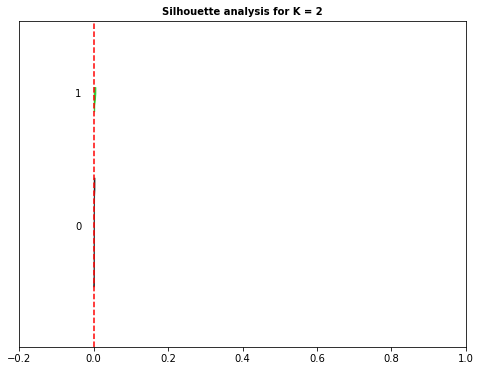

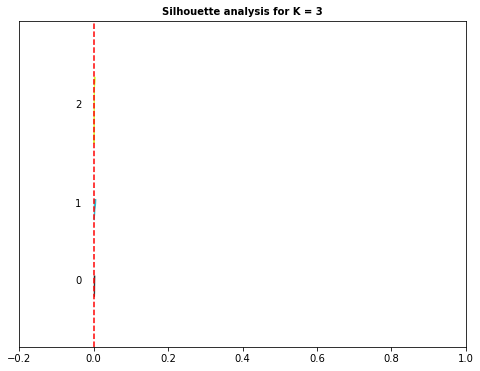

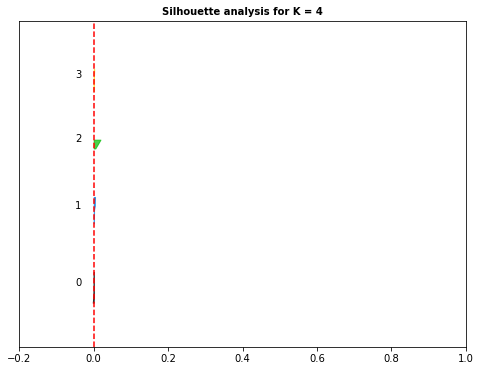

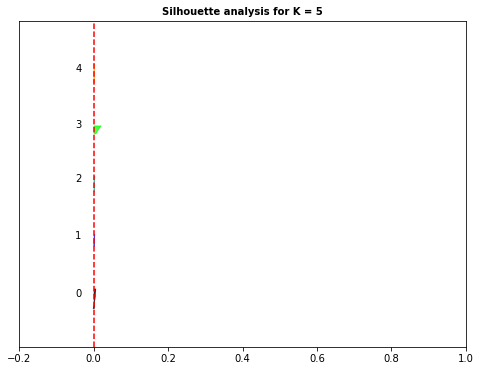

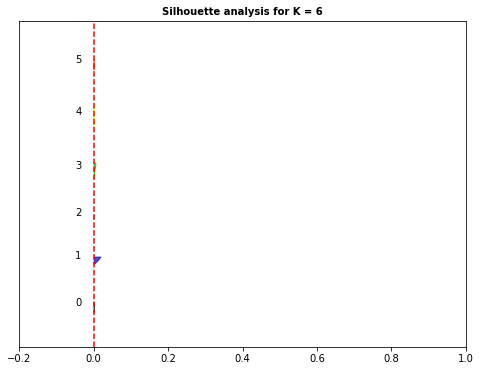

In [27]:
silhouette(kmeans_results, final_df, plot=True)

In [28]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

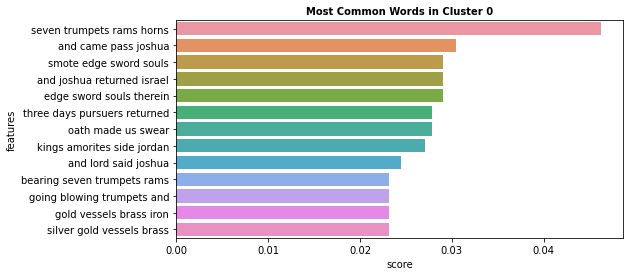

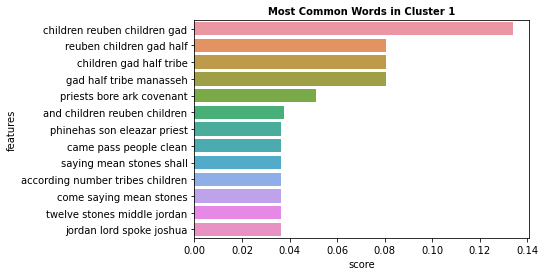

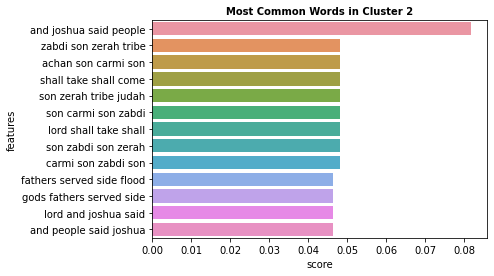

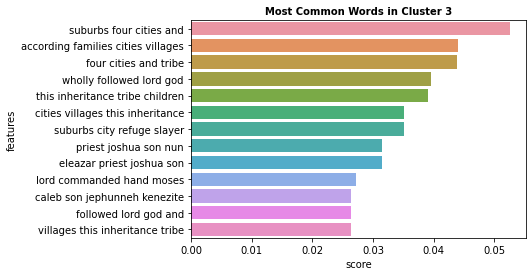

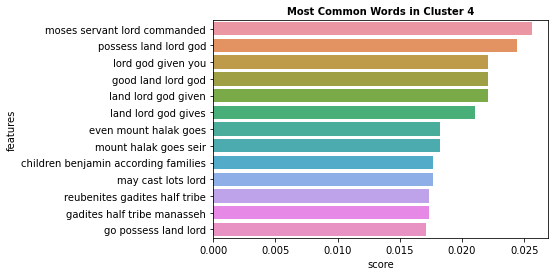

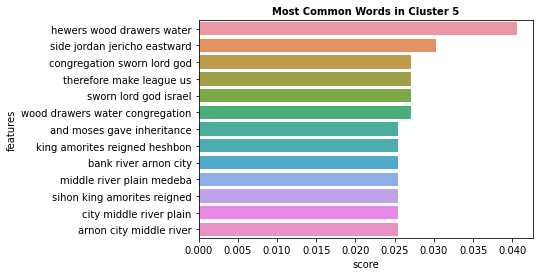

In [29]:
best_result = 6
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [30]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

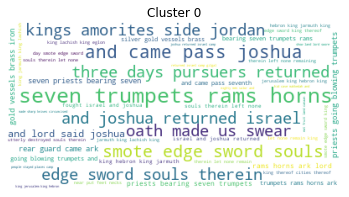

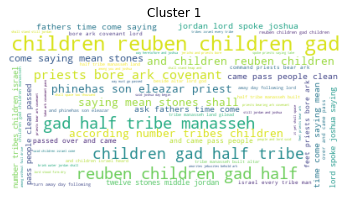

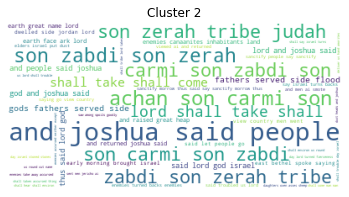

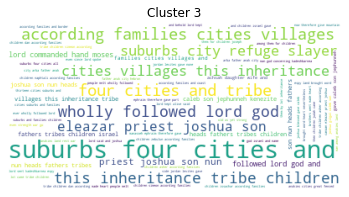

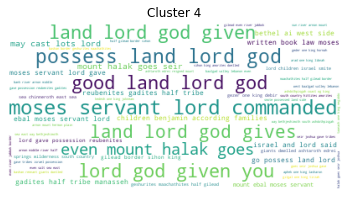

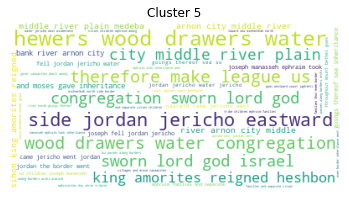

In [31]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [32]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Josue_1,"'death', 'moses', 'servant', 'lord', 'came', '...",4
101,Josue_2,"'joshua', 'son', 'nun', 'sent', 'shittim', 'tw...",0
102,Josue_3,"'joshua', 'rose', 'early', 'morning', ';', 're...",1
103,Josue_4,"'came', 'pass', ',', 'people', 'clean', 'passe...",1
104,Josue_5,"'came', 'pass', ',', 'kings', 'amorites', ',',...",0


In [33]:
print(df)

        Autor                                              Livro  label
100   Josue_1  'death', 'moses', 'servant', 'lord', 'came', '...      4
101   Josue_2  'joshua', 'son', 'nun', 'sent', 'shittim', 'tw...      0
102   Josue_3  'joshua', 'rose', 'early', 'morning', ';', 're...      1
103   Josue_4  'came', 'pass', ',', 'people', 'clean', 'passe...      1
104   Josue_5  'came', 'pass', ',', 'kings', 'amorites', ',',...      0
105   Josue_6  'jericho', 'straightly', 'shut', 'children', '...      0
106   Josue_7  'children', 'israel', 'committed', 'trespass',...      2
107   Josue_8  'lord', 'said', 'joshua', ',', 'fear', ',', 'n...      4
108   Josue_9  'came', 'pass', ',', 'kings', 'side', 'jordan'...      5
109  Josue_10  'came', 'pass', ',', 'adonizedec', 'king', 'je...      0
110  Josue_11  'came', 'pass', ',', 'jabin', 'king', 'hazor',...      4
111  Josue_12  'kings', 'land', ',', 'children', 'israel', 's...      4
112  Josue_13  'joshua', 'old', 'stricken', 'years', ';', 'lo...

# Análise dos resultados 

Classe 0 agrupa os capitulos que tratam dos espias em jerico, do enagnao dos gibeonitas e do discurso de despedida de Josue. 

Classe 1 agrupa os capitulos que tratam das conquistas das terras e a despedida das duas e meia tribos. 

Classe 2 agrupa os capitulos que tratam da chamada de Josue e a entrega das heranças e a exortação a obedecer ao Senhor.

Classe 3 agrupa os capitulos que tratam as vitorias de Josue e a entrega de heranças 

Classe 4 agrupa os capitulos que tratam entrega de heranças e o levantar do tabernaculo 

Classe 5 agrupa os capitulos que tratam repartição das terras e entrega de heranças.

Classe 0 (Josue 2, 7, 9, 10, 24)

Classe 1 (Josue 3, 4, 5, 6, 8, 20, 22) 

Classe 2 (Josue 1, 12, 23)

Classe 3 (Josue 11, 14, 17, 21)

Classe 4 (Josue 15, 18)

Classe 5 (Josue 13, 16, 19)

Agrupamento feito com 6 grupos e trigrams. 

#######################################################################################################################

Classe 0 agrupa os capitulos que tratam do envio dos espias e da destruição de jerico e do rei dos gibeonitas que foi vencido por Josue.

Classe 1 agrupa os capitulos que tratam a passagem pelo jordão e a despedida das duas e meia tribos. 

Classe 2 agrupa os capitulos que tratam do pecado de Acã e o discurso de despedida de Josue. 

Classe 3 agrupa os capitulos que tratam da entrega das heranças e das cidades dos levitas. 

Classe 4 agrupa os capitulos que tratam as vitorias de Josue, a entrega das heranças das duas e meia tribo, o levantar do tabernaculo e exortação a obediencia a Deus.

Classe 5 agrupa os capitulos que tratam do engano promovido pelos gibeonitas e a entrega das heranças. 

Classe 0 (Josue 0, 5, 6, 10) 

Classe 1 (Josue 3, 4, 22)

Classe 2 (Josue 7, 24)

Classe 3 (Josue 14, 15, 17, 19, 21)

Classe 4 (Josue 1, 8, 11, 12, 18, 23)

Classe 5 (Josue 9, 13, 20)

Agrupamento feito com 6 grupos e quadrigrams. 

